# Predictive Modeling project
## Gems & Holiday Package Prediction

## Packages Used:

In [1]:
# General
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
# Linear Regression
# Preprocessing
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Models
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

# Splitting and Tuning
from sklearn.model_selection import train_test_split


In [3]:
# Logistic Regression and LDA

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Tuning
from sklearn.model_selection import GridSearchCV

# Evaulation Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [4]:
# For Bold printing
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [5]:
import warnings
warnings.filterwarnings("ignore")

# PROBLEM 1
You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

## Dataset Background:
- The company is earning different profits on different prize slots. A model is to be developed to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share.
- Here the price prediction is done by Linear Regression Model.

## Data Dictionary of the Dataset:
The description of the attributes present in the dataset are given below:
1. **carat:** Carat weight of the cubic zirconia.
2. **cut:** Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
3. **color:** Colour of the cubic zirconia.With D being the best and J the worst.
4. **clarity:** cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. 
    - (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
5. **depth:** The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
6. **table:** The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
7. **price:** the Price of the cubic zirconia.
8. **x:** Length of the cubic zirconia in mm.
9. **y:** Width of the cubic zirconia in mm.
10. **z:** Height of the cubic zirconia in mm.

## Inferences from the Data Dictionary:
- **'Cut' , 'Color' and 'Clarity' are ordinal categorical variables.**
- **Rest of the attributes are expected to be continuous variables.**
- **The 'price' attribute is the dependent variable and rest of the attributes are the independent variables.**

## Data Ingestion:

## Loading the Dataset as a DataFrame:

In [6]:
zirconia = pd.read_csv('cubic_zirconia.csv') 

In [7]:
printmd('**Viewing the top 5 rows of dataset :**')
zirconia.head()

**Viewing the top 5 rows of dataset :**

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [8]:
printmd('**Viewing the bottom 5 rows of dataset :**')
zirconia.tail()

**Viewing the bottom 5 rows of dataset :**

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


## Inferences:
- All values are properly loaded.
- The serial number column is also loaded with 'Unnamed: 0' as the variable name. It needs to dropped.

## Dropping the Serial Number column:

In [9]:
zirconia.drop('Unnamed: 0', axis = 1, inplace =True)
printmd('**The column names after dropping the column with serial numbers:**')
zirconia.columns

**The column names after dropping the column with serial numbers:**

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [10]:
printmd('**Viewing the top 5 rows of dataset after dropping the column with serial numbers:**')
zirconia.head()

**Viewing the top 5 rows of dataset after dropping the column with serial numbers:**

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


## Inferences:
- The serial number column with column name 'Unnamed: 0' is dropped.

In [11]:
printmd('**Shape of the Dataset:**')
zirconia.shape

**Shape of the Dataset:**

(26967, 10)

In [12]:
printmd('**Data types of the Dataset:**')
zirconia.dtypes

**Data types of the Dataset:**

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [13]:
printmd('**Number of Null values for each variable:**')
zirconia.isna().sum()

**Number of Null values for each variable:**

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [14]:
printmd('**Information of the Dataset:**')
zirconia.info()

**Information of the Dataset:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
carat      26967 non-null float64
cut        26967 non-null object
color      26967 non-null object
clarity    26967 non-null object
depth      26270 non-null float64
table      26967 non-null float64
x          26967 non-null float64
y          26967 non-null float64
z          26967 non-null float64
price      26967 non-null int64
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


## Inferences:
- The Dataset has 26,967 rows and 10 columns of data.
- **There are Null values present only in 'Depth' column. It has 697 Null values.**
- Out of the 10 columns: 6 are 'float64', 1 is 'int64' and 3 are 'object' data type.

## Checking for Duplicates:

In [15]:
printmd('**Total Number of Duplicate instances present in the dataset:**')
zirconia.duplicated().sum()

**Total Number of Duplicate instances present in the dataset:**

34

In [16]:
printmd('**The Duplicate instances are:**')
zirconia[zirconia.duplicated() == True ]

**The Duplicate instances are:**

,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


## Inferences:
- There are 34 Duplicated instances.
- **Note the index with index number '6215' is having 0 values for x,y and z; i.e. 0 value for length, width and height of the cubic zirconia diamond, which looks odd as it should have at least certain non zero positive value.**

## Deleting the duplicate instances from the dataset:
- The duplicates are deleted first so that it does not affect the description of the dataset.

In [17]:
zirconia.drop_duplicates(inplace = True)
printmd('**Total Number of Duplicate instances in the dataset after dropping them:**')
zirconia.duplicated().sum()

**Total Number of Duplicate instances in the dataset after dropping them:**

0

In [18]:
printmd('**Shape of the Dataset after dropping the duplicate instances:**')
zirconia.shape

**Shape of the Dataset after dropping the duplicate instances:**

(26933, 10)

## Inference:
- The duplicate instances are deleted. Now we have 26933 instances present in the dataset.

## Data Description:

## Meaning of 'depth' and 'table' and its range:
- 'depth' which gives the height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter is best in a range. **This is because if a Diamond's Depth is too large or small the Diamond will become 'Dark' in appearance because it will no longer return an Attractive amount of light.**
- 'table' which gives the width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter is also best within a range.
    - **If the Table (Upper Flat Facet) is too Large then light will not play off of any of the Crown's angles or facets and will not create the Sparkly Rainbow Colors.**
    - **If it is too Small then the light will get Trapped and that Attention grabbing shaft of light will never come out but will “leak” from other places in the Diamond.**

## Numerical:
- **Note: The Null values in 'depth' column are not treated yet.**

In [19]:
printmd('**Describing the Variables:**')
cont_vars = list(zirconia.describe().columns)
zirconia.describe().T

**Describing the Variables:**

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.798010,0.477237,0.2,0.40,0.70,1.05,4.50
depth,26236.0,61.745285,1.412243,50.8,61.00,61.80,62.50,73.60
table,26933.0,57.455950,2.232156,49.0,56.00,57.00,59.00,79.00
x,26933.0,5.729346,1.127367,0.0,4.71,5.69,6.55,10.23
y,26933.0,5.733102,1.165037,0.0,4.71,5.70,6.54,58.90
z,26933.0,3.537769,0.719964,0.0,2.90,3.52,4.04,31.80
price,26933.0,3937.526120,4022.551862,326.0,945.00,2375.00,5356.00,18818.00


## Inferences:
- All the continuous variables except 'price' are expected to have no or less skewness as the mean and median values are nearly same. **Also the 'carat' variable may be a little right skewed.**
- 'price' variable has larger mean than median and is expected to be right skewed. 
- **There are instances that have 0 value for attributes 'x', 'y' and 'z'; i.e. 0 value for length, width and height of the cubic zirconia diamond, which looks odd as it should have at least certain non zero positive value. We need to check how many such instances are present and treat them accordingly.**
- **The range of depth in the given dataset is 50.8 to 73.6 and the range of table is from 49 to 79.**

## Categorical:

In [20]:
printmd('**Describing the Categorical variables :**')
cat_vars = list(zirconia.describe(include = 'object').columns)
zirconia.describe(include = 'object').T

**Describing the Categorical variables :**

,count,unique,top,freq
cut,26933,5,Ideal,10805
color,26933,7,G,5653
clarity,26933,8,SI1,6565


## Inferences:
- There are 5, 7 and 8 unique categories in 'cut', 'color' and 'clarity' respectively. The category with highest frequency in 'cut' is 'Ideal', in 'color' is 'G' and in clarity is 'SI1'.

## Univariate Analysis

## Numerical Variables:
- Univariate analysis on 'carat', 'depth', 'table',	'x', 'y', 'z' and 'price' variables are done here.
- Note : Since for 'depth' variable there NaN values present, hence the 'depth' variable is plotted separately wherever required.

**Histogram Plots of the Variables:**

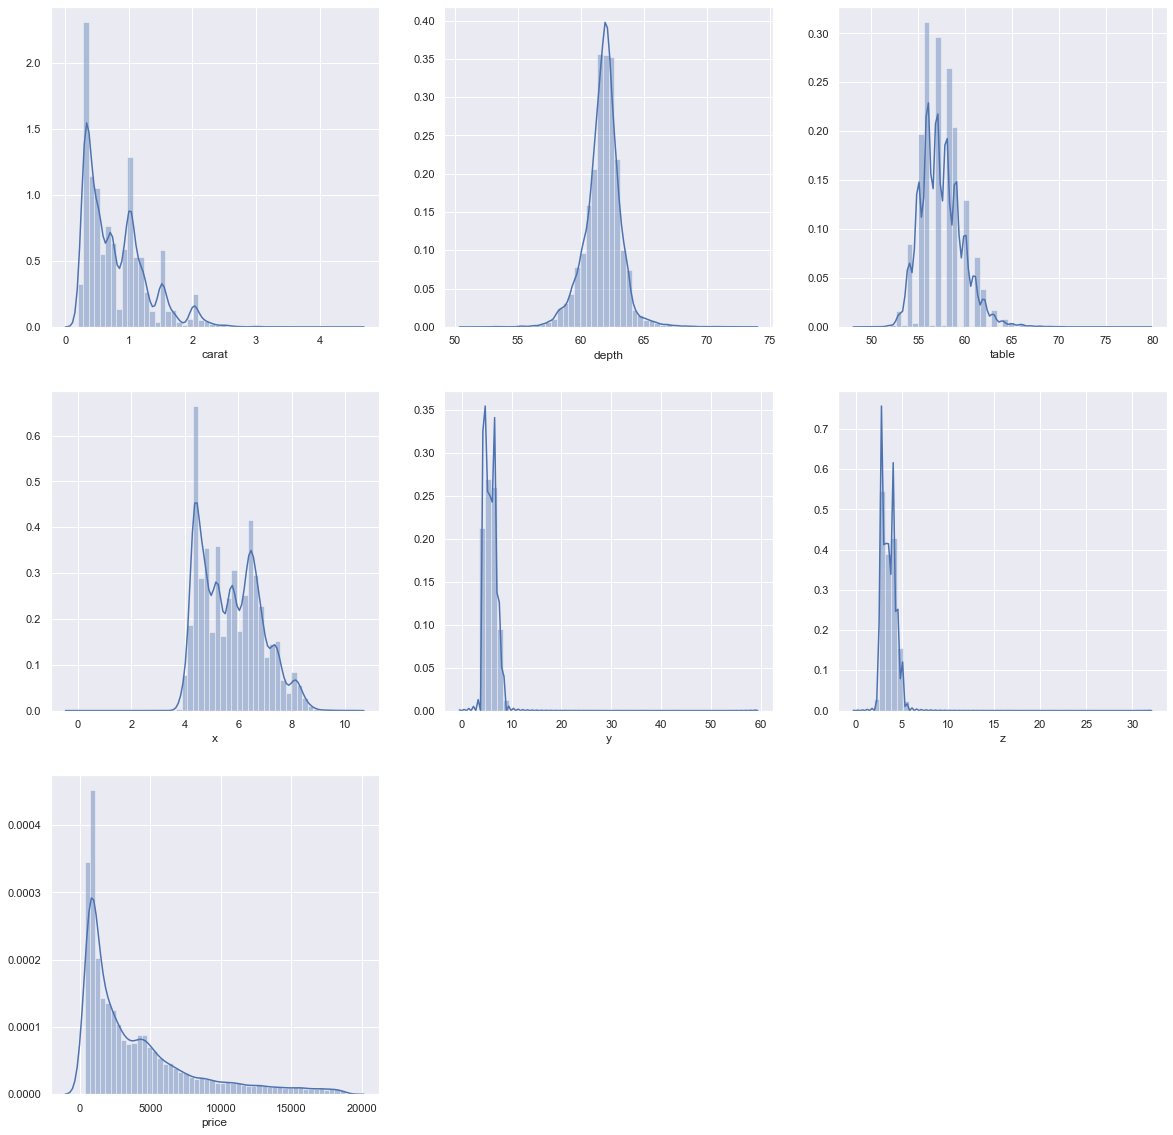

In [21]:
plt.figure(figsize=(20,20))
for i in range(0,7):
    plt.subplot(3,3,i+1)
    if  cont_vars[i] != 'depth':
        sns.distplot(zirconia[cont_vars[i]])
    else:
        sns.distplot(zirconia.dropna()[cont_vars[i]])
printmd('**Histogram Plots of the Variables:**')

## Inferences:
- 'carat' seems to have multiple clusters, with normal type distribution in each cluster.
- 'depth' seems to be normally distributed.
- 'table' seems to be multi modal and does not look to be much skewed.
- For 'x' variable there are multiple high frequencies present at equal intervals, thus indicating a uniform type distribution.
- 'y' and 'z' seems to have a very long thin right tail, indicating the probable presence of few very high values.
- 'price' seems to be right skewed with a long right tail.

In [22]:
printmd('**Skewness of the different variables in descending order of positive skewness:**')
zirconia[cont_vars].skew().sort_values(ascending = False)

**Skewness of the different variables in descending order of positive skewness:**

y        3.867764
z        2.580665
price    1.619116
carat    1.114789
table    0.765805
x        0.392290
depth   -0.026086
dtype: float64

## Inferences:
- The variables 'y', 'z', 'price' and 'carat' have skewness value greater than 1. 'y' has the highest skewness of 3.87.
- 'table' and 'x' have skewness value between 0 and 1.
- 'depth' seems to have nearly 0 skewness.

**Boxplot to observe Outliers :**

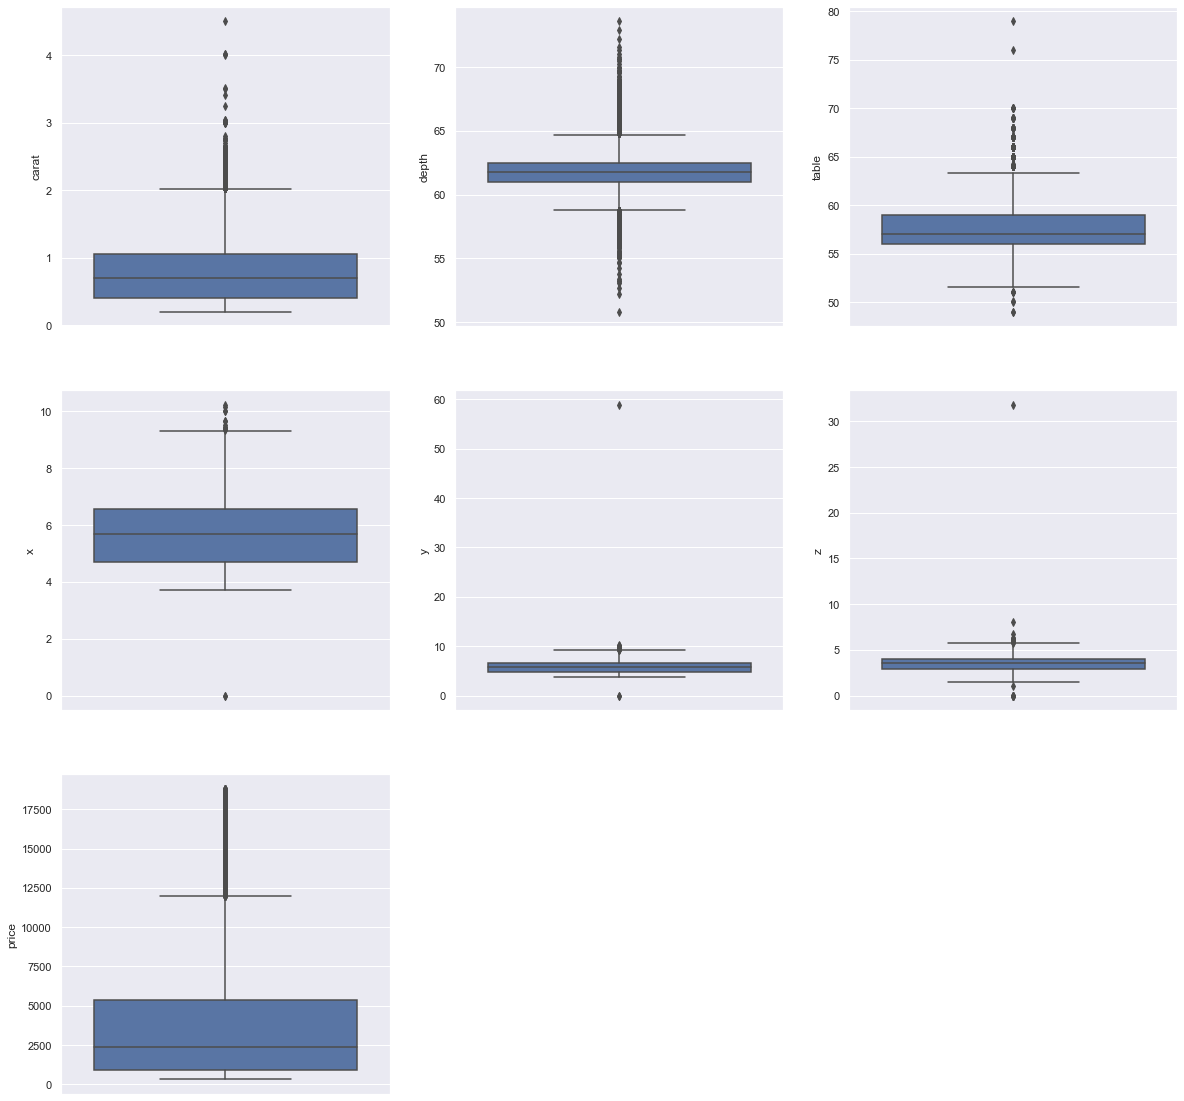

In [23]:
count = 1
plt.figure(figsize=(20,20))
for i in cont_vars :
    plt.subplot(3,3,count)
    sns.boxplot(y= i, data = zirconia[cont_vars])
    count = count + 1
printmd('**Boxplot to observe Outliers :**')

## Inferences:
**Data points are considered outlier here according to the IQR rule.**
- 'carat' has outliers on the upper side only.
- 'depth' seems to have a symmetrical distribution but with lots of outliers on both upper and lower side.
- 'table' seems to have a few outliers on the upper side, and few on the lower side as well.
-  'x' seems to have few outliers on the upper side and very few on the lower side (probably the 0 values as observed in data description).
- 'y' and 'z' seem to have a few outliers near the upper whisker but a few data points far away from the upper whisker is also noticed. Very few data points on the lower side are also observed (probably the 0 values as observed in data description).
- 'price' has outliers on the upper side only.

## Categorical Variables:

In [24]:
printmd('**Value counts of the categorical type variables :**')
for i in cat_vars:
    print(i)
    print(zirconia[i].value_counts())
    print()

**Value counts of the categorical type variables :**

cut
Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64

color
G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64

clarity
SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64



**Percentage counts in each category of the categorical variables:**

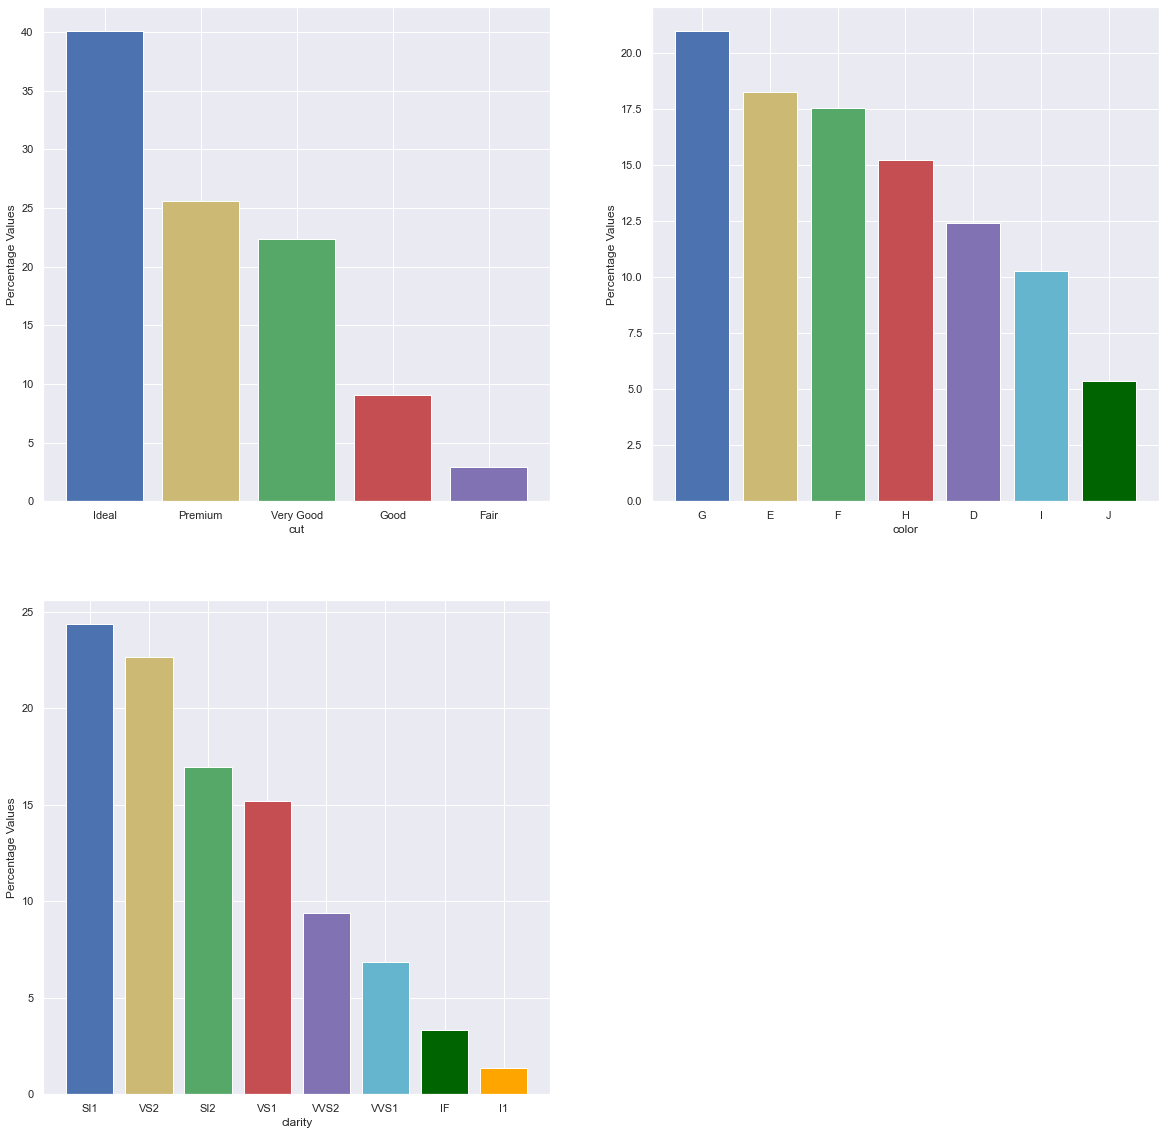

In [25]:
count = 1
plt.figure(figsize = (20,20))
for i in cat_vars:
    plt.subplot(2,2,count)
    temp = zirconia[i].value_counts('Normalize')*100
    plt.bar(x = temp.index, height = temp, color = ['b','y','g','r','m','c','darkgreen','orange'])
    plt.ylabel('Percentage Values')
    plt.xlabel(str(i))
    count = count + 1
printmd('**Percentage counts in each category of the categorical variables:**')

In [26]:
printmd('**Percentage counts of the categorical type variables :**')
for i in cat_vars:
    print(i)
    print( round( ((zirconia[i].value_counts()/len(zirconia[i]))*100), 2) )
    print()

**Percentage counts of the categorical type variables :**

cut
Ideal        40.12
Premium      25.57
Very Good    22.38
Good          9.04
Fair          2.90
Name: cut, dtype: float64

color
G    20.99
E    18.25
F    17.54
H    15.20
D    12.40
I    10.27
J     5.35
Name: color, dtype: float64

clarity
SI1     24.38
VS2     22.62
SI2     16.95
VS1     15.17
VVS2     9.39
VVS1     6.83
IF       3.31
I1       1.35
Name: clarity, dtype: float64



## Inferences:
- There are 5 unique categories in 'cut' variable; they are: **'Ideal', 'Premium', 'Very Good', 'Good' and 'Fair'.** 
    - For 'cut' variable most of the instances (around 40%) are 'ideal' category. The 'Fair' category has minimum number of instances (around 3%).
- There are 7 unique categories in 'color' variable; they are: **'D', 'E', 'F', 'G', 'H', 'I' and 'J'.** 
    - For 'color' variable all categories have instances between (10-21)% except for 'J' category which has around 5.35% of the instances.
- There are only 8 unique categories in 'clarity' variable; they are: **'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'.** 
    - **Although in Data Dictionary 'FL', 'I2' and 'I3' categories are mentioned but there are no instances in the dataset from these three categories.**
    - For 'clarity' variable 'I1', 'IF', 'VVS1' and 'VVS2' have less than 10% instances and rest of the categories between (15-25)% instances.

## Bivariate/Multivariate Analysis between the Independent Variables:

## Numerical - Numerical Independent Variables:

**Pairplot of the independent variables: **

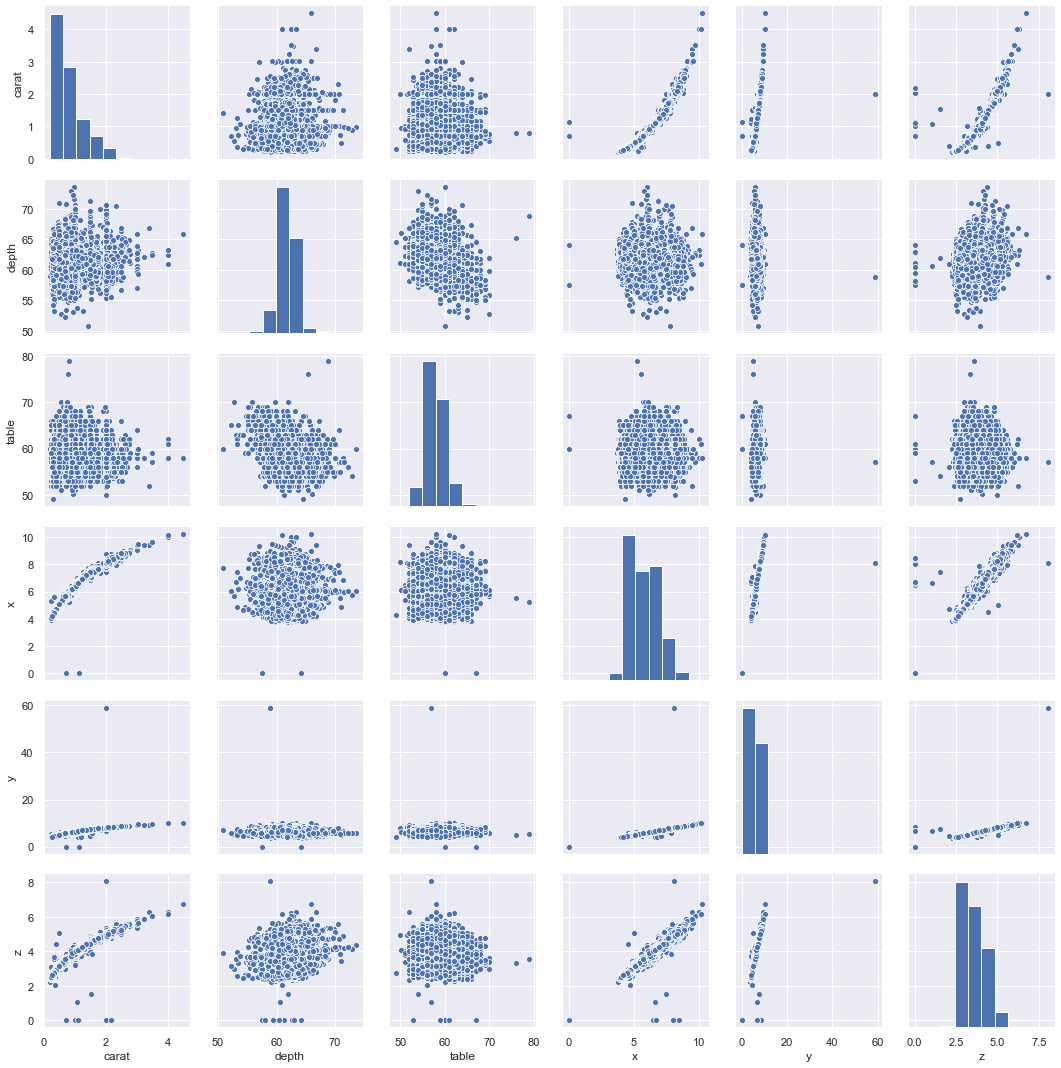

In [27]:
cont_vars_no_target = cont_vars.copy()
cont_vars_no_target.remove('price')
sns.pairplot(zirconia.dropna()[cont_vars_no_target])
printmd('**Pairplot of the independent variables: **')

In [28]:
printmd('**Correlation Matrix of the Independent variables showing correlation with each other :**')
zirconia[cont_vars_no_target].corr()

**Correlation Matrix of the Independent variables showing correlation with each other :**

,carat,depth,table,x,y,z
carat,1.000000,0.035240,0.181539,0.976858,0.941442,0.940982
depth,0.035240,1.000000,-0.297768,-0.018401,-0.024453,0.101973
table,0.181539,-0.297768,1.000000,0.196254,0.182352,0.148994
x,0.976858,-0.018401,0.196254,1.000000,0.962601,0.956490
y,0.941442,-0.024453,0.182352,0.962601,1.000000,0.928725
z,0.940982,0.101973,0.148994,0.956490,0.928725,1.000000


**Heatmap showing the correlation values between the variables :**

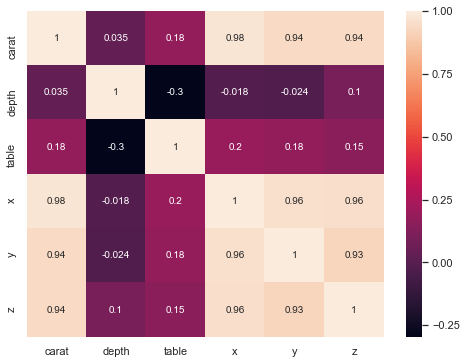

In [29]:
plt.figure(figsize = (8,6))
sns.heatmap(zirconia[cont_vars_no_target].corr(), annot = True)
printmd('**Heatmap showing the correlation values between the variables :**')

## Inferences:
- High multicollinearity is present. 
- 'carat', 'x', 'y' and 'z' have very high positive correlation among themselves. 
- 'table' and 'depth' has low correaltion with the other variables and amon amon themselves.

## Note: 
- **High multicollinearity is observed in the dataset. This will not affect the accuracy of the model but the explainability of the model is lost, i.e. if we want the dependent variables to be explained in terms of indepedendent variables and these variables are highly correlated, then the change in dependent variable cannot be properly explained by change in a particular independent variable.** 
- **Multicollinearity problem may be solved by using methods like feature/variable selection, PCA etc. If we use PCA we will loose the identity of the individual independent variables and understanding the dependent variable variation with respect to particular dependent variables may become difficult to interpret. Feature selection could be an option.**

## Numerical - Categorical Independent Variables:

**Mean values of numerical variables for each category of the different categorical variables :**

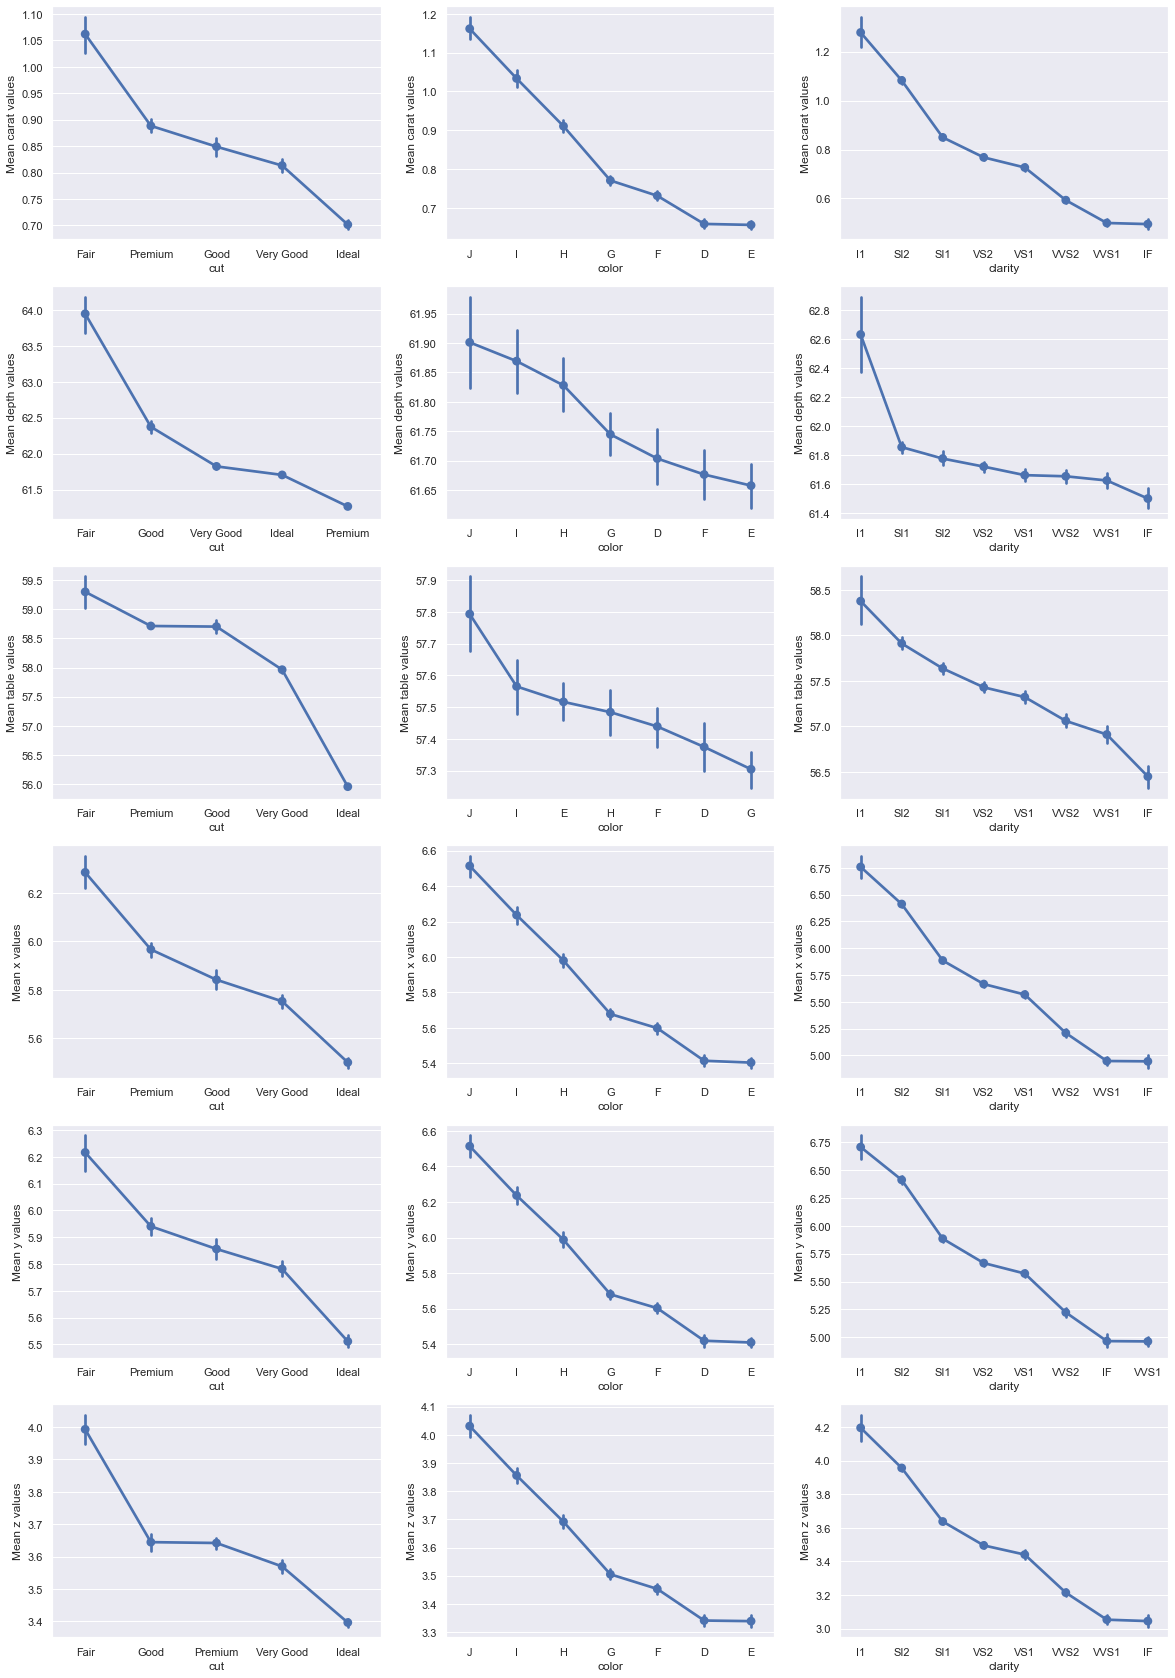

In [30]:
count = 1
plt.figure(figsize = (20,30))
for i in cont_vars_no_target:
    for j in cat_vars:
        plt.subplot(6,3,count)
        sns.pointplot(x = j, y = i, data = zirconia,
                 order = zirconia.groupby(j)[i].mean().sort_values(ascending = False).index)
        plt.ylabel('Mean ' + str(i) + ' values')
        plt.xlabel(str(j))
        count = count + 1
printmd('**Mean values of numerical variables for each category of the different categorical variables :**')

## Inference:
- For 'cut' variable it may be observed that the category 'Fair' has the highest mean values for all the continuous independent variables. Also 'Ideal' category has the lowest mean values for all the continuous independent variables except for 'depth' where it is the second lowest. 
- For 'color' variable it may be observed that the categories 'J' and 'I' have the highest and second highest mean values for all the continuous independent variables. Also 'E' and 'D' category has the lowest and second lowest mean values for all the continuous independent variables except for 'depth' and 'table' where they are still low compared to other categories.
- For 'clarity' variable it may be observed that the three categories 'I1', 'SI2' and 'SI1' have much higher mean values for all the continuous independent variables. Also 'WS1' and 'IF' have the lowest mean values for all the continuous independent variables.
- **Thus the point plot of the ordered categorical variables in general seem to have lower mean values of the numerical variables for the higher order categories and higher mean values for the lower ordered catgeories.** 

## Bivariate Analysis with the Target Variable: 
- The traget variable is 'price' for the dataset.

## Numerical Variables with 'price':

**Scatterplot between continuous Independent variables and price variable :**

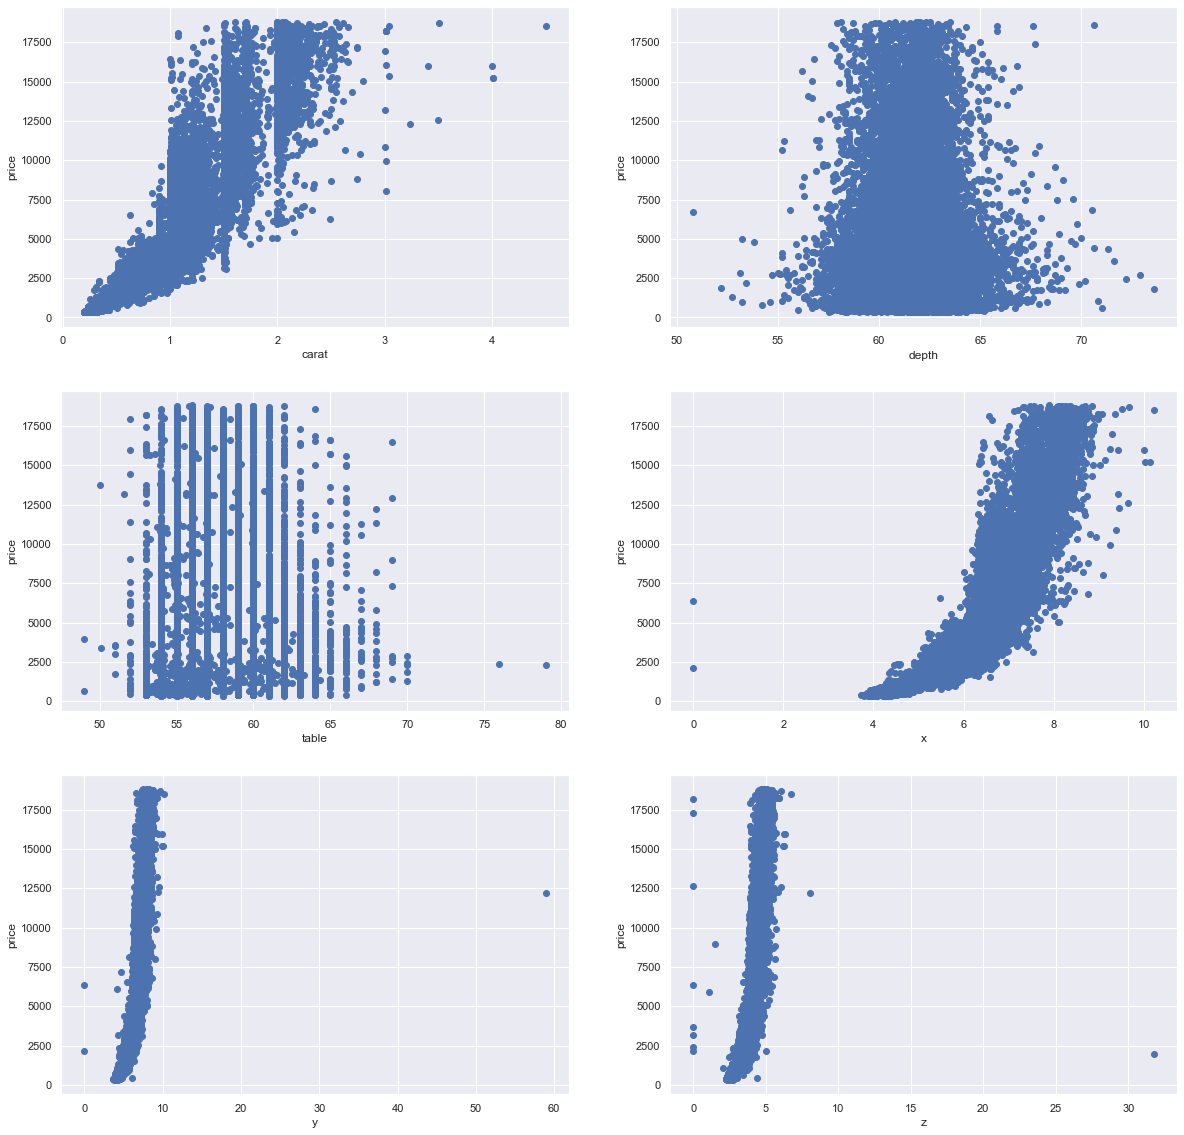

In [31]:
count = 1
plt.figure(figsize=(20,20))
for i in cont_vars_no_target :
    plt.subplot(3,2,count)
    plt.scatter(y = 'price', x = i ,data = zirconia)
    plt.xlabel(i)
    plt.ylabel('price')
    count = count + 1
printmd('**Scatterplot between continuous Independent variables and price variable :**')

## Inferences:
- 'price' does not seem to follow any particular trend with increase in 'table' and 'depth'. And it is observed that in the given range of depth and table there are both high and low prices present.
- 'price' seems to increase with increase in 'carat' and 'x'. 
- 'x' seems to have a non linear (exponential type) relationship with price.
- The variation in 'price' is not very clearly observed with 'y' and 'z' because of the presence of an outlier data point in both 'y' and 'z' which extends the x- axis scale. We can separately plot these two by removing the outlier to observe the scatter plot better.

**Scatterplot between y, z and price variable :**

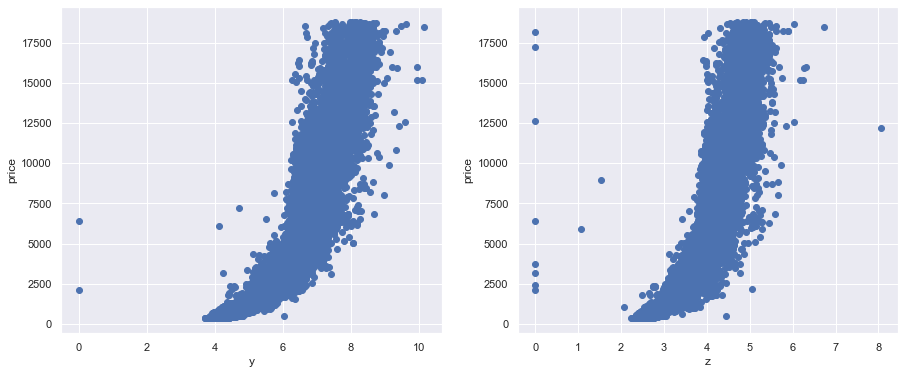

In [32]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(y = 'price', x = 'y' ,data = zirconia[zirconia['y'] < 20])
plt.xlabel('y')
plt.ylabel('price')
plt.subplot(1,2,2)
plt.scatter(y = 'price', x = 'z' ,data = zirconia[zirconia['z'] < 20])
plt.xlabel('z')
plt.ylabel('price')
printmd('**Scatterplot between y, z and price variable :**')

## Inferences:
- Now it may be clearly observed that 'price' seems to increase with increase in 'y' and 'z'. Although it may be noted the relationship looks non linear (exponential type). **We are not doing any transformations on the Target variable to make the relationship more linear.**

In [33]:
printmd('**Pearson Correlation values of the variables with the price variable:**')
zirconia.corr()['price'].sort_values(ascending = False)

**Pearson Correlation values of the variables with the price variable:**

price    1.000000
carat    0.922409
x        0.886554
y        0.856441
z        0.850682
table    0.126844
depth   -0.002895
Name: price, dtype: float64

## Inferences:
- 'carat' seems to have the highest positive correlation with 'price'.
- 'x', 'y' and 'z' variables have very high positive correlation with  'price'.
- 'table' and 'depth' seem to have very low correlation with 'price'.

## Categorical Variables with 'price':

**Barplot of the categorical variables with the price variable:**

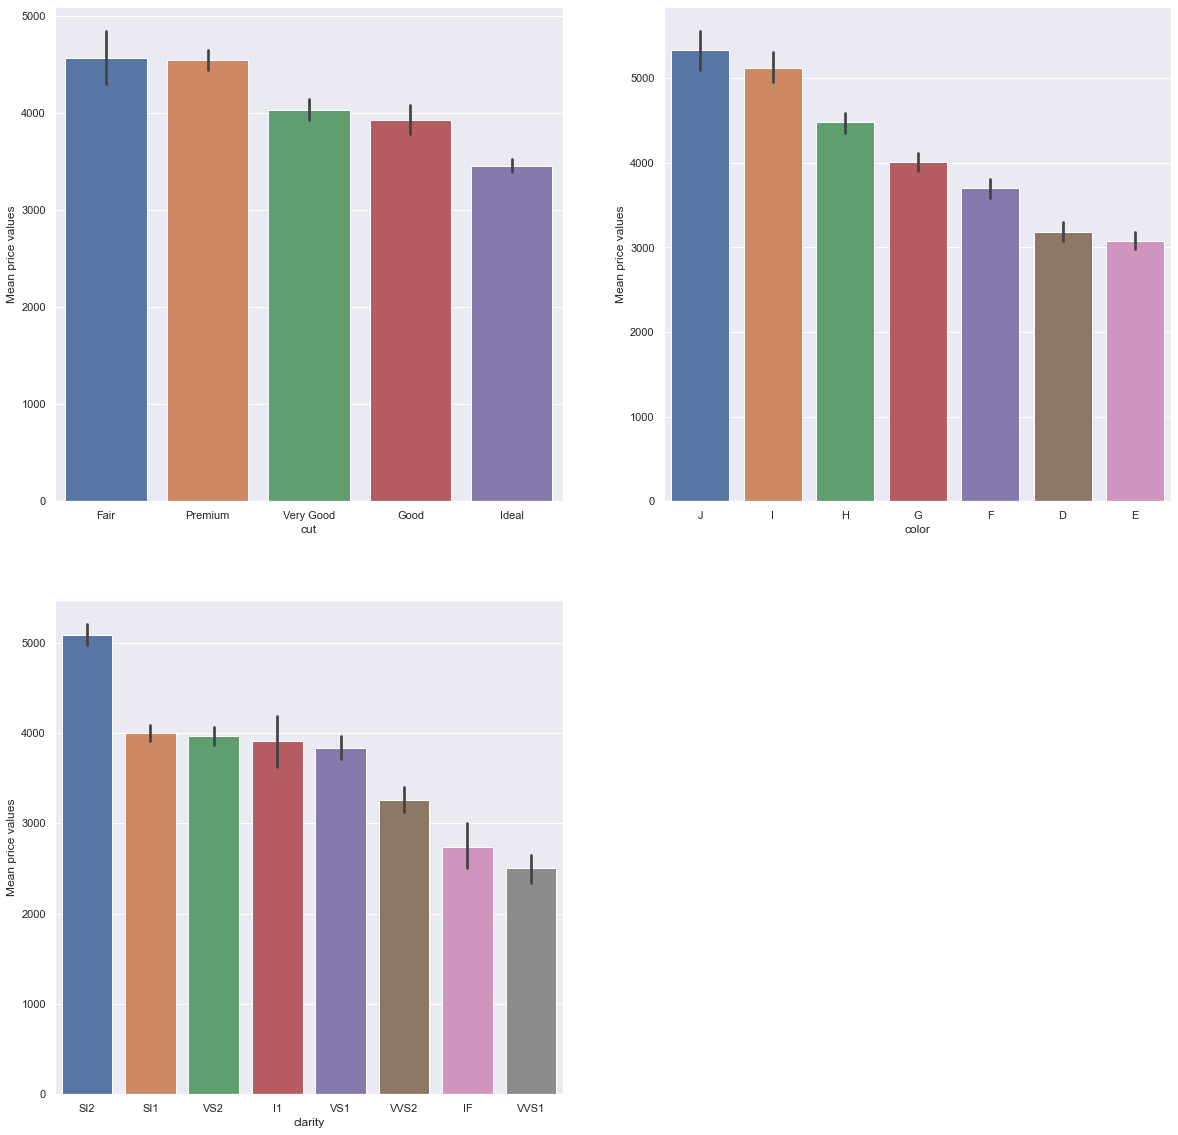

In [34]:
count = 1
plt.figure(figsize = (20,20))
for i in cat_vars:
    plt.subplot(2,2,count)
    sns.barplot(x = i, y = 'price', data = zirconia, 
                order = zirconia.groupby(i)['price'].mean().sort_values(ascending = False).index)
    plt.ylabel('Mean price values')
    plt.xlabel(str(i))
    count = count + 1
printmd('**Barplot of the categorical variables with the price variable:**')

**Point plot of the categorical variables with the price variable:**

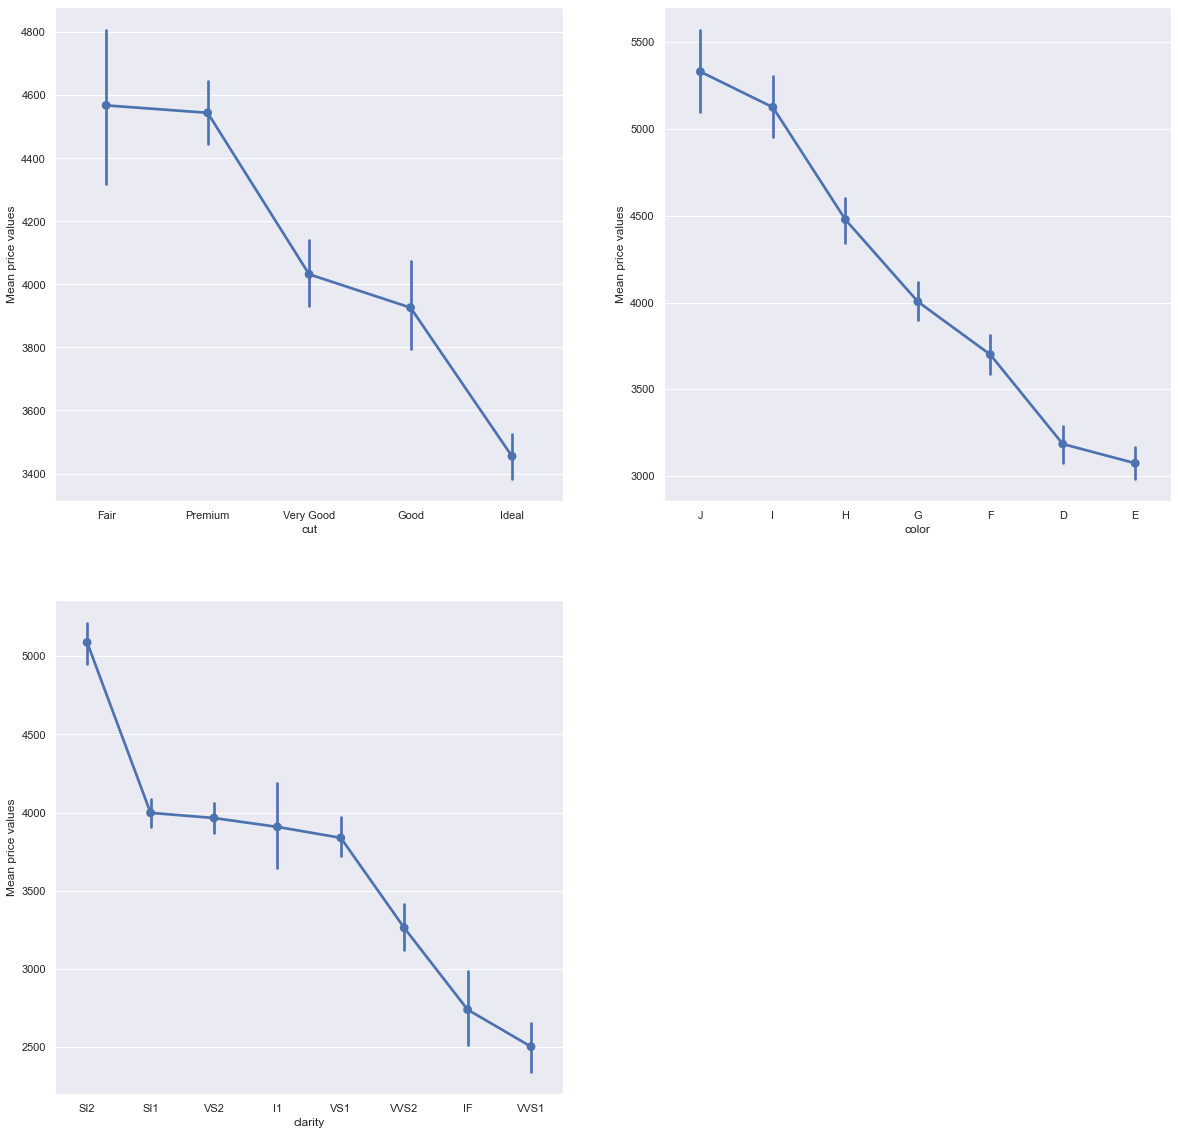

In [35]:
count = 1
plt.figure(figsize = (20,20))
for i in cat_vars:
    plt.subplot(2,2,count)
    sns.pointplot(x = i, y = 'price', data = zirconia,
                 order = zirconia.groupby(i)['price'].mean().sort_values(ascending = False).index)
    plt.ylabel('Mean price values')
    plt.xlabel(str(i))
    count = count + 1
printmd('**Point plot of the categorical variables with the price variable:**')

In [36]:
for i in cat_vars:
    print('Category wise description of price variable for ' + str(i) + ' :')
    print(round(zirconia.groupby(i)['price'].describe().sort_values('mean',ascending = False)))
    print('')

Category wise description of price variable for cut :
             count    mean     std    min     25%     50%     75%      max
cut                                                                       
Fair         780.0  4568.0  3746.0  369.0  2117.0  3342.0  5430.0  18574.0
Premium     6886.0  4545.0  4321.0  326.0  1038.0  3116.0  6268.0  18795.0
Very Good   6027.0  4032.0  4017.0  336.0   910.0  2633.0  5438.0  18818.0
Good        2435.0  3926.0  3621.0  335.0  1157.0  3087.0  5112.0  18707.0
Ideal      10805.0  3455.0  3869.0  326.0   872.0  1762.0  4668.0  18804.0

Category wise description of price variable for color :
        count    mean     std    min     25%     50%     75%      max
color                                                                
J      1440.0  5330.0  4488.0  335.0  1843.0  4234.0  7592.0  18701.0
I      2765.0  5125.0  4728.0  336.0  1145.0  3733.0  7292.0  18795.0
H      4095.0  4478.0  4250.0  337.0   990.0  3398.0  5950.0  18795.0
G      5653.0 

## Inferences:
**Observations made about the prices of different categories in the categorical variables are as follows:**
- For 'cut' variable although the best 'cut' is 'Ideal' category, it is observed the highest mean price is observed for the least cut quality category 'Ideal'. 
- For 'color' variable similar observation may be made, with 'J' mentioned as the worst 'color' for cubic zirconia, it still has the highest mean price among all the other categories of 'color' variable. Although 'D' and 'E' category are mentioned to be the best in color category, they are the lowest two categories when mean price is considered.
- For 'clarity' variable similar observation is made, although SI2 and SI1 are the second and third worst categories among the clarity categories present in the dataset, still they have the highest and second highest mean price respectively. And although IF and VVS1 are the best and second best category among the clarity categories present in the dataset, still they have the second lowest and lowest mean price respectively. 

**It is observed that in general the mean prices of higher quality cut, color or clarity are having less mean prices, this contradiction arises because the mean values of 'carat', 'x', 'y' and 'z' are higher for the diamonds with lower quality cut, color or clarity. The effect of 'carat', 'x', 'y' and 'z' more than compensates the effect of quality of diamond based on cut, color or clarity.**

**Boxplot of the categorical variables with the price variable:**

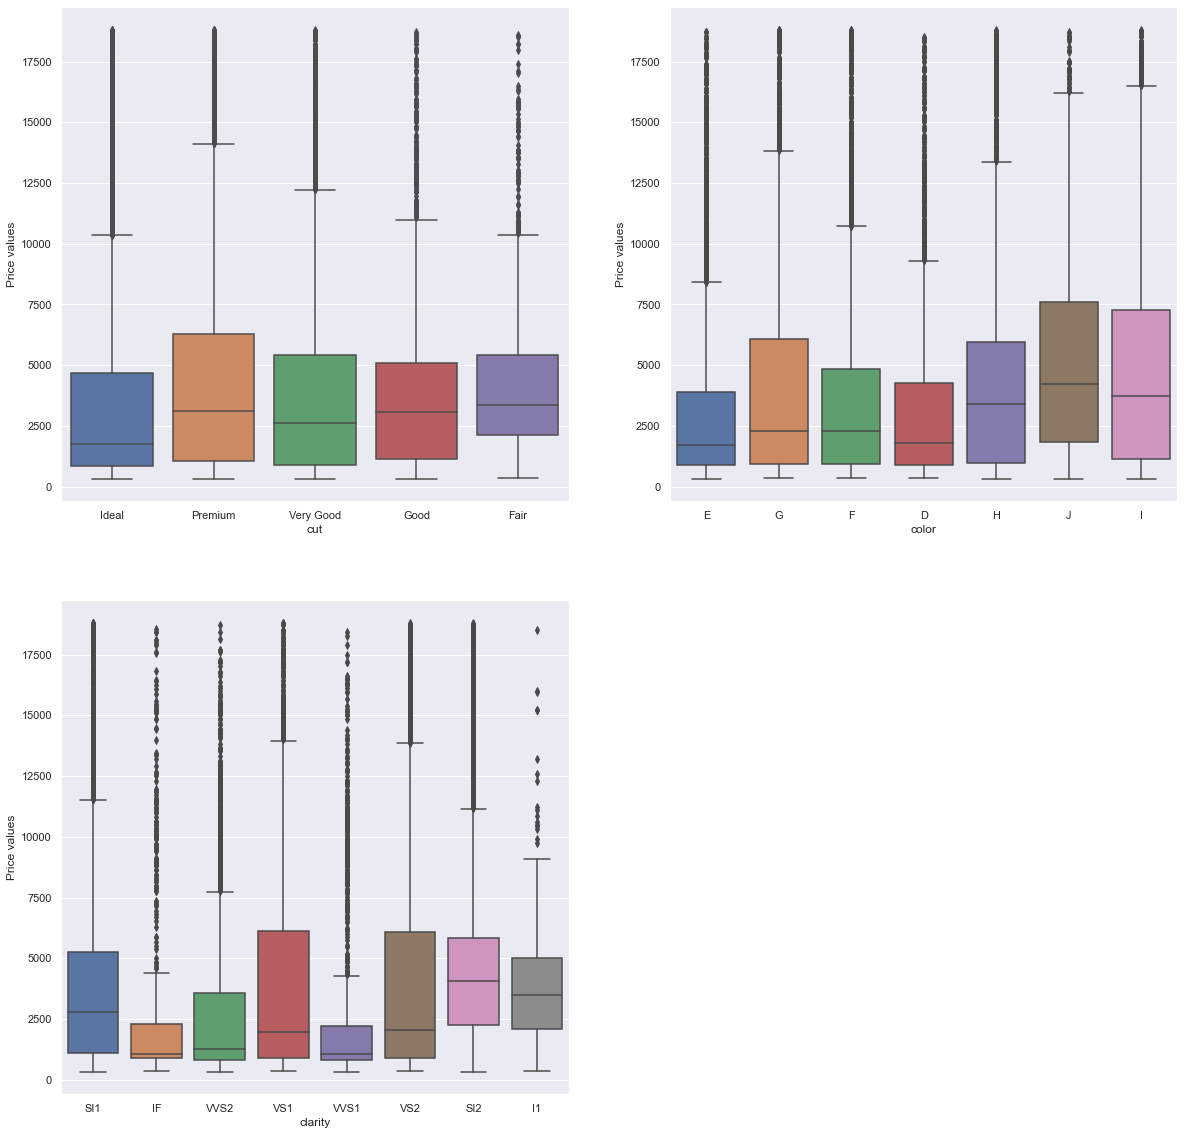

In [37]:
count = 1
plt.figure(figsize = (20,20))
for i in cat_vars:
    plt.subplot(2,2,count)
    sns.boxplot(x = i, y = 'price', data = zirconia)
                 
    plt.ylabel('Price values')
    plt.xlabel(str(i))
    count = count + 1
printmd('**Boxplot of the categorical variables with the price variable:**')

## Inferences:
- Mostly the median prices are very low as compared to the the highest price values for all the categorical variables in colors, cut and clarity. Although the upper quartile is bigger for most of them. **It shows that whichever category it may be there's a variety of diamonds that are still very expensive.**
    - For example in the cut category, be it ideal, fair or any other type, there are diamonds in those categories with high prices.

## Final Inferences from EDA:
- The dataset is read, and the dataset is observed to be loaded properly. 
    - Although it is observed that the serial number column is also loaded with 'Unnamed: 0' as the variable name. It is dropped.
- The Dataset has 26967 rows and 10 columns of data. 
- There are Null values present only in 'Depth' column. It has 697 Null values.
- Out of the 10 columns: 6 are 'float64', 1 is 'int64' and 3 are 'object' data type.
- There are 34 Duplicated instances. The duplicate instances are deleted. Now we have 26933 instances present in the dataset.
- From data description of the numerical variables the following observations are made:
    - All the continuous variables except 'price' and 'carat' are expected to have no or less skewness as the mean and median values are nearly same. 
    - There are instances that have 0 value for attributes 'x', 'y' and 'z'; i.e. 0 value for length, width and height of the cubic zirconia diamond, which looks odd as it should have at least certain non zero positive value. We need to check how many such instances are present and treat them accordingly.
    - **Since 'depth' and 'table' describes the quality of light reflected by diamond in different senses, these values are best within a range. Here range of depth in the given dataset is 50.8 to 73.6 and the range of table is from 49 to 79.**

- There are 5, 7 and 8 unique categories in 'cut', 'color' and 'clarity' respectively. The category with highest frequency in 'cut' is 'Ideal', in 'color' is 'G' and in clarity is 'SI1'.
    
- **Univariate Analysis :** Some important insights are mentioned below:
    - **'carat' :** It seems to have multiple clusters, with normal type distribution in each cluster. Skewness is approximately 1.11. In the Boxplot, there are outliers observed on the upper side only.
    - **'depth' :** It seems to be normally distributed. Skewness is nearly 0. But as measured by IQR method there are lot outliers observed in the Boxplot. Since the outliers are symmetrically present on both upper and lower side of whiskers the distribution looked normal and skewness calculated is near to 0.
    - **'table' :** It seems to be multi modal and does not look to be much skewed. Skewness value is approximately 0.77. There are few outliers observed in the Boxplot.
    - **'x' :** There are multiple high frequencies present at equal intervals, thus indicating a uniform type distribution. Skewness is approximately 0.4. There are few outliers observed in the Boxplot.
    - **'y' :** It seems to have a very long thin right tail, indicating probable presence of feww very high values. Skewness is approximately 3.86. There are few outliers observed in the Boxplot.
    - **'z' :** It seems to have a very long thin right tail, indicating probable presence of feww very high values. Skewness is approximately 2.58. There are few outliers observed in the Boxplot.
    - **'price' :** The target variable seems to be right skewed with a long right tail. Skewness is approximately 1.62. In the Boxplot, there are outliers observed on the upper side only.
    - **'cut' :** There are 5 unique categories present: 'Ideal', 'Premium', 'Very Good', 'Good' and 'Fair'. Most of the instances (around 40%) are 'ideal' category. The 'Fair' category has minimum number of instances (around 3%).
    - **'color' :** There are 7 unique categories present: 'D', 'E', 'F', 'G', 'H', 'I' and 'J'. All categories have instances between (10-21)% except for 'J' category which has around 5.35% of the instances.
    - **'clarity' :** There are only 8 unique categories present: 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'. For 'clarity' variable 'I1', 'IF', 'VVS1' and 'VVS2' have less than 10% instances and rest of the categories between (15-25)% instances.
- **Bivariate/Multivariate Analysis between the Independent Variables:**
    - From scatterplot and pearson correlation coefficient values it is observed that very high correlation exists between variables 'carat', 'x', 'y' and 'z' (greater 0.9). **This suggests High multicollinearity, although this will not affect the accuracy of the model but the explainability of the model is lost, i.e. if we want the dependent variables to be explained in terms of indepedendent variables and these variables are highly correlated, then the change in dependent variable cannot be properly explained by change in a particular independent variable.** There is no high correlation between the rest of the continuous independent variables.
    - **The point plot of the ordered categorical variables in general seem to have lower mean values of the numerical variables for the higher order categories and higher mean values for the lower ordered catgeories.** For e.g. in 'cut' variable it may be observed that the category 'Fair' has the highest mean values for all the continuous independent variables. Also 'Ideal' category has the lowest mean values for all the continuous independent variables except for 'depth' where it is the second lowest.
    - Although it may be clearly observed that 'price' seem have a nonlinear relationship (exponential type) with 'price', 'x', 'y' and 'z'. **We are not doing any transformations on the Target variable to make the relationship more linear.** 


In [38]:
zirconia_copy1 = zirconia.copy()

## Imputing the Null values:
- There are 697 NaN values present. All of them in variable 'depth'.
- Also it has been observed that 'depth' variable has very low correlation with all other variables.
- **It has been noticed that 'depth' variable has very less skewness and approximately Normally distributed. Thus we can use the mean or median values to impute the Null values present in the variable.**
    - Even though there are outliers present in 'depth' variable, they are present on either side nearly equally distributed and hence the mean and median value is nearly same. **The median values will be used for imputation of Null values in 'depth' variable.**

In [39]:
printmd('**Number of Null values for each variable:**')
zirconia.isnull().sum()

**Number of Null values for each variable:**

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [40]:
printmd('**Correlation of depth variable with other variables:**')
zirconia.corr()['depth'].sort_values(ascending = False)

**Correlation of depth variable with other variables:**

depth    1.000000
z        0.101973
carat    0.035240
price   -0.002895
x       -0.018401
y       -0.024453
table   -0.297768
Name: depth, dtype: float64

**Histogram of depth variable:**

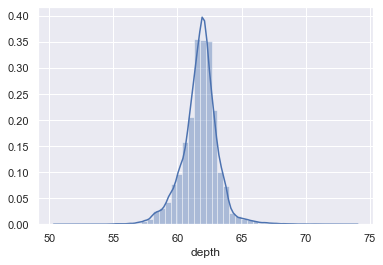

In [41]:
sns.distplot(zirconia.dropna().depth)
printmd('**Histogram of depth variable:**')

In [42]:
print('Skewness of \'depth\' variable:', round(zirconia.depth.skew(),2))

Skewness of 'depth' variable: -0.03


In [43]:
printmd('**Description of depth variable:**')
zirconia.depth.describe()

**Description of depth variable:**

count    26236.000000
mean        61.745285
std          1.412243
min         50.800000
25%         61.000000
50%         61.800000
75%         62.500000
max         73.600000
Name: depth, dtype: float64

## Imputing the Null values in 'depth' variable with median of 'depth' variable:

In [44]:
zirconia.fillna(value = zirconia.depth.median(), inplace = True)
printmd('**Number of Null values after imputing:**')
zirconia.isnull().sum()

**Number of Null values after imputing:**

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

## Inferences:
- **Thus the null values are imputed and hence there are no Null values present in the Dataset anymore.**

## Significance of '0' values and its presence in the dataset:
- Since the independent Numerical variables are physical measurements hence a '0' value does not make any sense. Moreover a '0' value for 'price' variable also does not make any sense. Also '0' values for the categorical variables should not be present. **Although '0' value due to larger units used and rounding off may be present. Hence we need to understand the nature of the '0' values present in the dataset.**
- In the description of the numerical data we have noticed that a minimum value of '0' is present only for variables 'x', 'y' and 'z'. Also among the categories present in categorical variables it has been noticed that there are no '0' values present. **Hence we need to analyse only the variables: 'x', 'y' and 'z' and find out if the '0' values are due to rounding off or actually erroneous values.**
- Moreover, it is important to mention that we have already removed a duplicate instance that had '0' values for 'x', 'y' and 'z'. 

In [45]:
printmd('**Minimum values of numerical variables showing the presence of Zero values :**')
zirconia.describe().T['min']

**Minimum values of numerical variables showing the presence of Zero values :**

carat      0.2
depth     50.8
table     49.0
x          0.0
y          0.0
z          0.0
price    326.0
Name: min, dtype: float64

In [46]:
printmd('**Different categories of Categorical variables:**')
for i in cat_vars:
    print(i + ':')
    print(zirconia[i].unique())
    print('')

**Different categories of Categorical variables:**

cut:
['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']

color:
['E' 'G' 'F' 'D' 'H' 'J' 'I']

clarity:
['SI1' 'IF' 'VVS2' 'VS1' 'VVS1' 'VS2' 'SI2' 'I1']



## Inferences:
- Thus it is observed that '0' value is present only in variables 'x', 'y' and 'z'.

In [47]:
printmd('**Instances with 0 value at least in one of the attributes:**')
zirconia[(zirconia.x == 0) | (zirconia.y == 0) | (zirconia.z ==0)]

**Instances with 0 value at least in one of the attributes:**

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [48]:
printmd('**Total number of instances with 0 value at least in one of the attributes:**')
zirconia[(zirconia.x == 0) | (zirconia.y == 0) | (zirconia.z ==0)].x.count()

**Total number of instances with 0 value at least in one of the attributes:**

8

## Inference: 
- It observed that there are two instances where 'x', 'y' and 'z' are all 0. And six other instances where only z is 0.
- **Now let us observe the scatter plot between 'carat', 'x', 'y' and 'z'. They have very high correlation and should give a better picture if the '0's are due to rounding off or erronous values.**

In [49]:
temp = zirconia[['carat', 'x', 'y', 'z']]
printmd('**Correlation between carat, x, y, z :**')
temp.corr()

**Correlation between carat, x, y, z :**

,carat,x,y,z
carat,1.000000,0.976858,0.941442,0.940982
x,0.976858,1.000000,0.962601,0.956490
y,0.941442,0.962601,1.000000,0.928725
z,0.940982,0.956490,0.928725,1.000000


**Scatter plot to observe the nature of the 0 values present:**

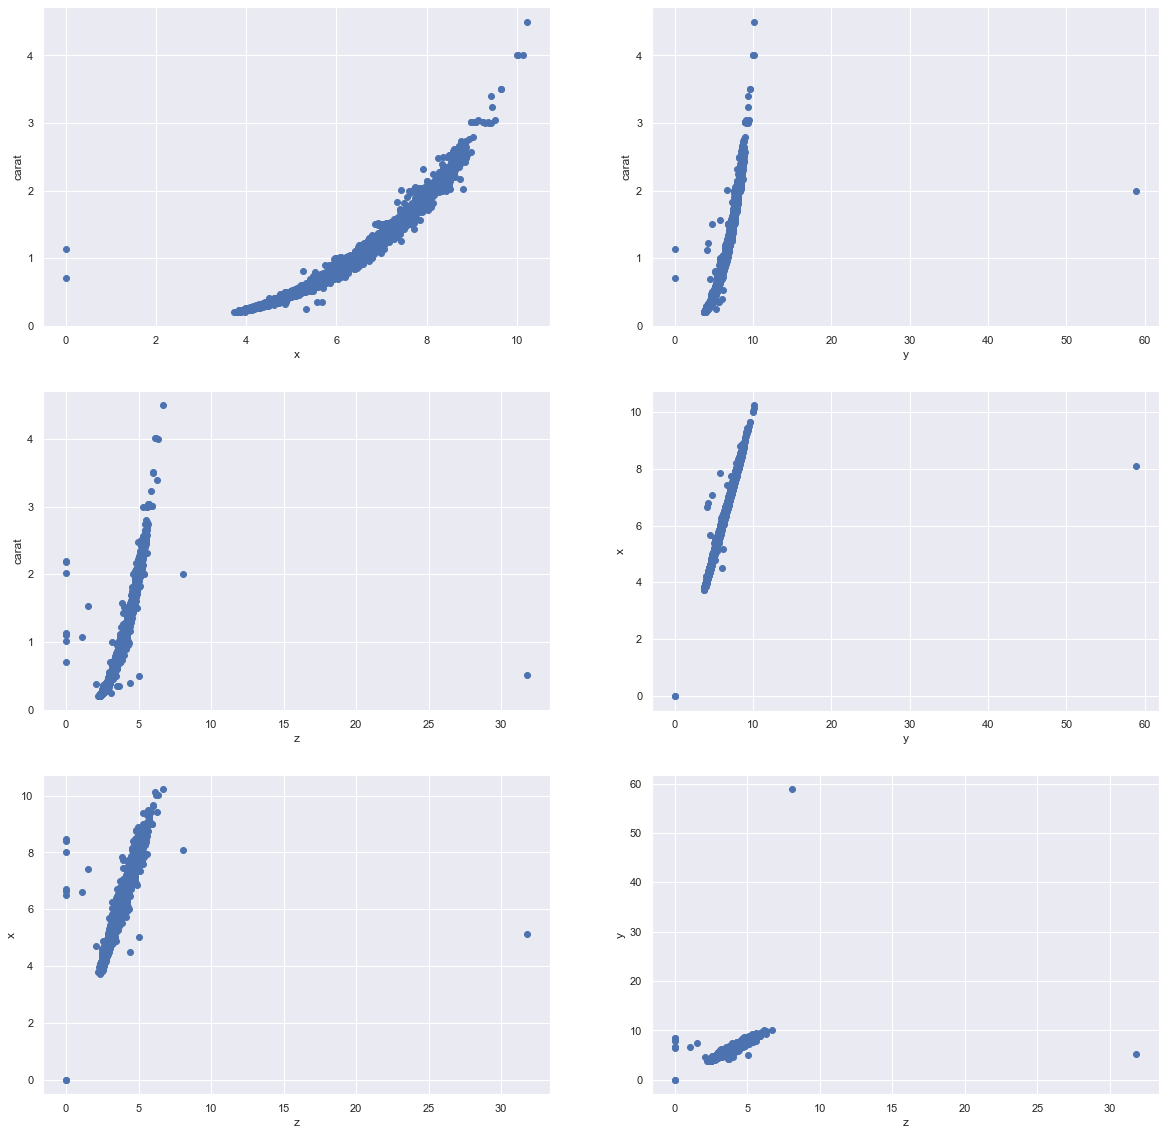

In [50]:
count = 1
plt.figure(figsize = (20,20))
for i,j in zip(['carat','carat','carat', 'x', 'x', 'y'],['x', 'y', 'z', 'y', 'z', 'z']):
    plt.subplot(3,2,count)
    plt.scatter(x=j, y =i, data = zirconia)
    plt.ylabel(i)
    plt.xlabel(j)
    count = count +1
printmd('**Scatter plot to observe the nature of the 0 values present:**')

## Inferences:
- **From the scatterplots it is evident that the '0' values present are erronous values and not due to rounding off.**

## Treating the '0' values present in 'x', 'y' and 'z' dataset:
- We can either drop the instances with '0' values present or we can impute them using linear regression method.
- Since there are only 8 such instances, i.e. just approximately 0.03% of the dataset, they are dropped here.

In [51]:
zirconia.drop(zirconia[(zirconia.x == 0) | (zirconia.y == 0) | (zirconia.z ==0)].index, inplace = True)
printmd('**Minimum values of numerical variables after dropping the Zero values :**')
zirconia.describe().T['min']

**Minimum values of numerical variables after dropping the Zero values :**

carat      0.20
depth     50.80
table     49.00
x          3.73
y          3.71
z          1.07
price    326.00
Name: min, dtype: float64

In [52]:
print('Shape of the Dataset after dropping the 0 values :', zirconia.shape)

Shape of the Dataset after dropping the 0 values : (26925, 10)


## Inferences:
- **The instances with '0' values for 'x', 'y' and 'z' are dropped and the shape for the dataframe is now (26925,10) from (26933,10).**

## Effect and Need of Scaling:
- First let us understand the effect of scaling in Linear Regression technique. Here the target variable is expressed as linear combination of the independent variables. The magnitude of coefficients of the independent variables depend on how important  they are in affecting the target variable. But the magnitude of coefficients also depend on the magnitude of the independent variables, if the magnitude of certain variable is much higher then the corresponding coefficient of that independent variable will be less and vice versa. **So in order to interpret the coefficients properly such that we can understand which independent variable affect the target variable by how much it is important to have the independent variables in the same scale.** 
- **Although it must be noted that the overall predicting power of the linear regression model is not affected by scaling.**
    -  Hence if the aim of the model is to make predictions then scaling is not necessary however if the interpretation of the effect of independednt variables on the dependent variable is also a matter of concern then scaling is necessary if the magnitude of the independent variables differ. It is important to mention here that for interpretation Multicollinearity also must be less in the dataset.
    - In our case the independent variables are not in the same scale, i.e. 'depth' and 'table' variables have higher magnitude than 'carat', 'x', 'y' and 'z'. So if we want to interpret the effect of individual independent variables on the 'price' variable properly then scaling (as well as less multicollinearity) is important. **Since our first priority is to build a model to make accurate predictions of price and as scaling has no effect on prediction accuracy it is not necessary.**

In [53]:
zirconia_copy2 = zirconia.copy()

## Preprocessing:

## Outliers:
- Outliers affect Linear Regression and hence they must be taken care before modelling.
- Here IQR method is used to detect the outliers in the indpendent variables and replaced them by the respective whiskers.
- **Note :** The dependent variable 'price' is kept as it is.

## Outlier Check with IQR method:

In [54]:
Lower_outlier = []
Upper_outlier = []
for i in range(0,6):
    Q1 = zirconia[cont_vars_no_target[i]].quantile(0.25)
    Q3 = zirconia[cont_vars_no_target[i]].quantile(0.75)
    IQR = Q3 - Q1
    Lower_outlier.append(zirconia[zirconia[cont_vars_no_target[i]] < (Q1 - 1.5*IQR)].count()[0])
    Upper_outlier.append(zirconia[zirconia[cont_vars_no_target[i]] > (Q3 + 1.5*IQR)].count()[0])

outliers = pd.DataFrame(data = Lower_outlier, columns =['Lower Outliers Count'], index = cont_vars_no_target)
outliers['Lower Outliers Percentage'] =  round(outliers['Lower Outliers Count'].apply(lambda x: x*100/len(zirconia)),2)
outliers['Upper Outliers Count'] = Upper_outlier
outliers['Upper outliers Percentage'] = round(outliers['Upper Outliers Count'].apply(lambda x: x*100/len(zirconia)),2)
outliers['Total Outliers Count'] = outliers['Lower Outliers Count'] + outliers['Upper Outliers Count']
outliers['Total Outliers Percentage'] = round(outliers['Total Outliers Count'].apply(lambda x: x*100/len(zirconia)),2)
printmd('**The outlier counts and percentage values in each variable :**')
outliers

**The outlier counts and percentage values in each variable :**

,Lower Outliers Count,Lower Outliers Percentage,Upper Outliers Count,Upper outliers Percentage,Total Outliers Count,Total Outliers Percentage
carat,0,0.00,655,2.43,655,2.43
depth,895,3.32,516,1.92,1411,5.24
table,8,0.03,309,1.15,317,1.18
x,0,0.00,12,0.04,12,0.04
y,0,0.00,12,0.04,12,0.04
z,1,0.00,13,0.05,14,0.05


## Inference:
- According to IQR method, there are outliers present in all the continuous independent variables.
    - 'carat' has all the outliers on the upper side, around 2.44% of the total data points present.
    - 'depth' has outliers on either side, a total of around 4.53% of the total data points present.
    - 'table' has outliers on either side, a total of around 1.18% of the total data points present.
    - 'x','y' and 'z' have few outliers on either side, a total of around 0.05%, 0.05% and 0.08% of the total data points present.

## Oulier Correction:

In [55]:
zirconia_no_outlier = zirconia[cont_vars_no_target].copy()
# Setting the Quantiles
Q1 = zirconia_no_outlier.quantile(0.25)
Q3 = zirconia_no_outlier.quantile(0.75)
IQR = Q3 - Q1



# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(zirconia_no_outlier[cont_vars_no_target] < Q1 - 1.5 * IQR)[0], 
                np.where(zirconia_no_outlier[cont_vars_no_target] < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    zirconia_no_outlier.iloc[i,j] = whisker[j]
    
    
# Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(zirconia_no_outlier[cont_vars_no_target] > Q3 + 1.5 * IQR)[0], 
                np.where(zirconia_no_outlier[cont_vars_no_target] > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    zirconia_no_outlier.iloc[i,j] = whisker[j]

In [56]:
Lower_outlier = []
Upper_outlier = []
for i in cont_vars_no_target:
    Q1 = zirconia_no_outlier[i].quantile(0.25)
    Q3 = zirconia_no_outlier[i].quantile(0.75)
    IQR = Q3 - Q1
    Lower_outlier.append(zirconia_no_outlier[zirconia_no_outlier[i] < (Q1 - 1.5*IQR)].count()[0])
    Upper_outlier.append(zirconia_no_outlier[zirconia_no_outlier[i] > (Q3 + 1.5*IQR)].count()[0])

outliers = pd.DataFrame(data = Lower_outlier, columns =['Lower Outliers Count'], index = cont_vars_no_target)
outliers['Upper Outliers Count'] = Upper_outlier
outliers['Total Outliers Count'] = outliers['Lower Outliers Count'] + outliers['Upper Outliers Count']
printmd('**The outlier counts in each variable after removal of outliers :**')
outliers

**The outlier counts in each variable after removal of outliers :**

,Lower Outliers Count,Upper Outliers Count,Total Outliers Count
carat,0,0,0
depth,0,0,0
table,0,0,0
x,0,0,0
y,0,0,0
z,0,0,0


In [57]:
for i in cont_vars_no_target:
    zirconia[i] = zirconia_no_outlier[i]

## Inference:
- **The outliers are capped by the appropriate whisker values of the corresponding variables. There are no more outliers as measured by IQR method.**

## Observing the Histogram after Outlier removal: 

**Histogram Plots of Independent continuous Variables after removing Outliers:**

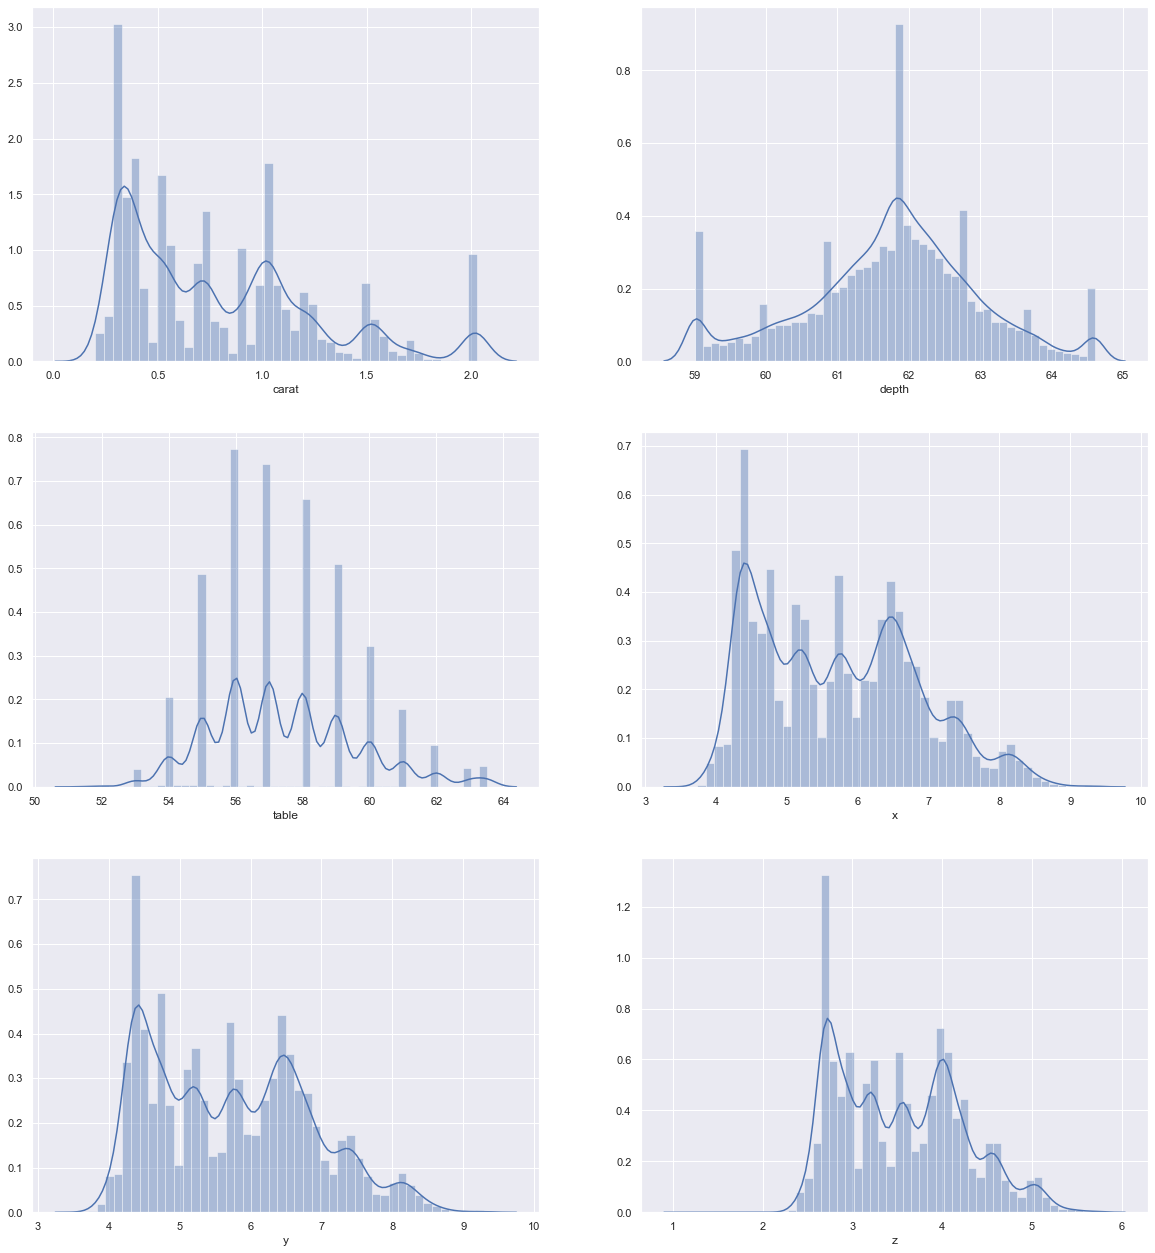

In [58]:
plt.figure(figsize=(20,30))
for i in range(0,6):
    plt.subplot(4,2,i+1)
    sns.distplot(zirconia[cont_vars[i]])
printmd('**Histogram Plots of Independent continuous Variables after removing Outliers:**')

## Inference:
- It can observed that in 'carat' variable there is peak at the right extreme because 'carat' variable had outliers on the upper side mainly which are now replaced by the upper whisker.
- In 'depth' it was observed that there were outliers on both lower and upper side and hence we can see that two peaks are now present at the lower and upper extreme of the histogram distribution.

## Conversion of 'object' data type variables:
- It is a prerequisite for Modelling that the object data type variables are converted to numerical data type.
- We will do Label Encoding here. The encoding is done manually since we have ordered categorical variables and hence the encoding is done in given order.

In [59]:
zirconia['cut']=np.where(zirconia['cut'] =='Fair', '0', zirconia['cut'])
zirconia['cut']=np.where(zirconia['cut'] =='Good', '1', zirconia['cut'])
zirconia['cut']=np.where(zirconia['cut'] =='Very Good', '2', zirconia['cut'])
zirconia['cut']=np.where(zirconia['cut'] =='Premium', '3', zirconia['cut'])
zirconia['cut']=np.where(zirconia['cut'] =='Ideal', '4', zirconia['cut'])

In [60]:
zirconia['color']=np.where(zirconia['color'] =='J', '0', zirconia['color'])
zirconia['color']=np.where(zirconia['color'] =='I', '1', zirconia['color'])
zirconia['color']=np.where(zirconia['color'] =='H', '2', zirconia['color'])
zirconia['color']=np.where(zirconia['color'] =='G', '3', zirconia['color'])
zirconia['color']=np.where(zirconia['color'] =='F', '4', zirconia['color'])
zirconia['color']=np.where(zirconia['color'] =='E', '5', zirconia['color'])
zirconia['color']=np.where(zirconia['color'] =='D', '6', zirconia['color'])

In [61]:
zirconia['clarity']=np.where(zirconia['clarity'] =='IF', '0', zirconia['clarity'])
zirconia['clarity']=np.where(zirconia['clarity'] =='VVS1', '1', zirconia['clarity'])
zirconia['clarity']=np.where(zirconia['clarity'] =='VVS2', '2', zirconia['clarity'])
zirconia['clarity']=np.where(zirconia['clarity'] =='VS1', '3', zirconia['clarity'])
zirconia['clarity']=np.where(zirconia['clarity'] =='VS2', '4', zirconia['clarity'])
zirconia['clarity']=np.where(zirconia['clarity'] =='SI1', '5', zirconia['clarity'])
zirconia['clarity']=np.where(zirconia['clarity'] =='SI2', '6', zirconia['clarity'])
zirconia['clarity']=np.where(zirconia['clarity'] =='I1', '7', zirconia['clarity'])

In [62]:
printmd('**The data types of the dataset after conversion of Object data types:**')
zirconia[cat_vars] = zirconia[cat_vars].astype('int8')
zirconia.dtypes

**The data types of the dataset after conversion of Object data types:**

carat      float64
cut           int8
color         int8
clarity       int8
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

## Inferences:
- The object data types are converted to numerical. Now the data types of all the variables are in acceptable format for Modeling.

## Importance of the Independent variables in the Prediction of price:
- **This could be evaluated by comparing the R squared metric and adjusted R squared metric. If these two values are nearly equal, it means that all the indpendent variables play a significant role in the prediction of price and should be kept for better prediction. Although if there is difference in these two metrics it means at least one of the indpenendent variables is not playing a significant role in the prediction of price and may be dropped.**

## Interpretation of coefficients:
- Since multicollinearity is observed, we cannot interpret the coefficents. For dealing with multicollinearity, we need to drop certain variables based on Variance Inflation Factor and relation with price variable as observed in EDA. **But our aim is to build a Linear Regression model that gives the most accurate prediction of price and hence we will first observe if the independent variables are significant enough in the prediction of price. This is done based on the difference between R squared and Adjusted R squared as mentioned above.**

## Train and Test split:

In [63]:
y = zirconia['price']
X = zirconia.drop('price', axis = 1)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [65]:
print('Number of instances in Training set :', len(X_train))
print('Number of instances in Testing set :', len(X_test))

Number of instances in Training set : 18847
Number of instances in Testing set : 8078


## Inferences:
- The number of instances in Training set is 18847 and in Testing set it is 8078.

In [66]:
# For Stats_model Data is required in the following format
data_train = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test, y_test], axis = 1)
printmd('**Head of the Train DataFrame:**')
data_train.head()

**Head of the Train DataFrame:**

,carat,cut,color,clarity,depth,table,x,y,z,price
5030,1.10,1,5,6,63.3,56.0,6.53,6.58,4.15,4065
12108,1.01,2,6,6,64.0,56.0,6.30,6.38,4.06,5166
20181,0.67,1,1,4,60.7,61.4,5.60,5.64,3.41,1708
4712,0.76,1,3,5,59.0,63.0,6.05,5.97,3.47,2447
2548,1.01,3,3,3,62.8,59.0,6.37,6.34,3.99,6618


In [67]:
model_Lin_Reg = smf.ols(formula= 'price ~ carat + cut + color + clarity + depth + table + x + y + z', data = data_train).fit()

In [68]:
print(model_Lin_Reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 2.301e+04
Date:                Tue, 20 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:28:11   Log-Likelihood:            -1.5969e+05
No. Observations:               18847   AIC:                         3.194e+05
Df Residuals:                   18837   BIC:                         3.195e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7169.7823   1017.947      7.043      0.0

## Inferences:
-  The R squared and Adjusted R squared is 0.917, since both are equal(upto 3 decimal places) we can say that the predictor variables used are good predictors. 
    - The p value of the model is also less than 0.05, indicating that the model is statistically significant.
- **Note that the p values keep on changing as we drop certain attributes and hence based on these p values we cannot directly decide on dropping certain attributes when multicollinearity exists in the dataset.**
- **Although 'carat' seems to be the most important variable according to the coefficients but since scaling is not done here and multicollinearity exists, it is not appropriate to comment on the separate influence of each variable on dependent variable here.**
- **Since we have not handled the multicollinearity problem, a warning is shown that multicollinearity exists.**

## R squared and RMSE on Training Data:

In [69]:
print('The R-squared value on the Training data is', model_Lin_Reg.rsquared)
print('The Adjusted R-squared value on the Training data is', model_Lin_Reg.rsquared_adj)
print('The RMSE value on the Training data is', np.sqrt(model_Lin_Reg.mse_resid))

The R-squared value on the Training data is 0.9166081674837081
The Adjusted R-squared value on the Training data is 0.9165683242765813
The RMSE value on the Training data is 1157.742150986372


## Inferences:
- The evaluation parameters on Train data approximately are:
    - **R-squared: 0.91661**
    - **Adjusted R-squared:0.91657**
    - **RMSE: 1157.74**

## Note:
- **RMSE value will come much less when done on Scaled data (i.e. if dependent variable is scaled) but this does not mean that RMSE has decreased due to scaling and hence it is a better model. It just means that since the magnitude of the dependent variable decreases due to scaling hence the RMSE value is also less.**

## R squared and RMSE on Testing Data:
- Since statsmodels package doesnot provide for direct R-squared calculations on Test data we are going to use sklearn.linear_model package to again run the model on test data and then predict R squared on Test data. Note that this package also uses OLS method, thus either methods will give same results. But we used statsmodel earlier because it gives statistical summary which is not provided by sklearn package.

In [70]:
model_Lin_Reg_new = LinearRegression()
model_Lin_Reg_new.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
print('The R-squared value on the Training data is', model_Lin_Reg_new.score(X_train, y_train))

The R-squared value on the Training data is 0.916608167483708


## Inferences:
- Thus it can observed that the R squared calculation on Training data is same here as from statsmodel. **So we will use it to calculate R squared on Testing Data.**

In [72]:
R_squared_test = model_Lin_Reg_new.score(X_test, y_test)
print('The R-squared value on the Testing data is', R_squared_test)

The R-squared value on the Testing data is 0.9185108421107453


## Calculation of Adjusted R squared and RMSE on Test Data:
- These values cannot be directly calculated and hence:
    - **For Adjusted R squared, we use the relationship between R squared and Adjusted R squared.**
    - **For RMSE calculation, we find the SSE, then calculate the MSE based on Degrees of Freedom of Residuals and finally take square root of MSE to RMSE.**

In [73]:
# Predicted values for Test Data
y_pred_test = np.exp(model_Lin_Reg.predict(X_test))

In [74]:
# Adjusted R-squared calculation for Test Data

R_squared_adj_test = 1 - (1-R_squared_test) * ( ( len(y_test)-1 ) / ( len(y_test) - len(X.columns) -1 ) )

print('The Adjusted R-squared value on the Testing data is', R_squared_adj_test)

# RMSE calculation on Test Data
SSE = ( (y_pred_test - np.array(y_test))**2 ).sum()
Df_Residuals_test = (len(y_test) - len(X.columns) -1)
MSE = SSE/ Df_Residuals_test
RMSE = np.sqrt(MSE)

print('The RMSE value on the Testing data is', RMSE)

The Adjusted R-squared value on the Testing data is 0.9184199394804772
The RMSE value on the Testing data is inf


## Inferences:
- The evaluation parameters on Test data are:
    - **R-squared: 0.9185**
    - **Adjusted R-squared: 0.9184**
    - **RMSE: 1157.03**

## Note:
- **Since the adjusted R squared and R squared are nearly same on both Train and Test data, it suggests that all the independent variables used to make the prediction of price play a significant role. Hence if our main concern is prediction we would keep all the indepndent variables.**

## Conclusions from Linear Regression Model:
1. The Linear Regression model is fitted with the train data in the formula:
    - **'price ~ carat + cut + color + clarity + depth + table + x + y + z'**
    - The summary is printed out to observe the different parameters. 


2. Observing the summary of the stats model:
    - **The p value (of F-statistic) of the model is less than 0.05, indicating that the model is statistically significant.**
    - **Since multicollinearity exists as already observed and shown in warnings in the printed summary, we cannot interpret the individual p values (of t-statistic) as these are not accurate.**
    - **Although 'carat' seems to be the most important variable according to the coefficients but since scaling is not done here and multicollinearity exists, it is not appropriate to comment on the separate influence of each variable on dependent variable from the summary.**
    
    
3. Train and Test R squared, Adjusted R squared and RMSE metrics:
    - **Train:**
        - **R-squared: 0.91661**
        - **Adjusted R-squared:0.91657**
        - **RMSE: 1157.74**
    - **Test:**
        - **R-squared: 0.9185**
        - **Adjusted R-squared: 0.9184**
        - **RMSE: 1157.03**
        
        
4. **Inferences from Metrics :** 
    - The R squared and adjusted R squared for both Train and Test Data is good enough.
    - **Since the adjusted R squared and R squared are nearly same on both Train and Test data, it suggests that all the independent variables used to make the prediction of price play a significant enough role. Hence if our main concern is prediction we would keep all the variables.**
    - Also note RMSE value will come much less when done on Scaled data (i.e. if dependent variable is scaled) but this does not mean that RMSE has decreased due to scaling and hence it is a better model. It just means that since the magnitude of the dependent variable decreases due to scaling hence the RMSE value is also less.

## Business Insights and Recommendations:

## Interpretation of Independent Variables from Model:
- **We have observed from the performance metrics on Train and Test data that R squared and Adjusted R squared are equal (upto 2 decimal places), hence the variables involved in prediction model are significant to prediction of price. Hence dropping any of these variables will lead to less prediction accuracy of price which is not preferred.**
- Now we want all the variables for better prediction. So interpretation of the coefficients and thus indpendent variables from this model is not done here. 
- **Although insights on the effect of independent variables from EDA is done and shown below.**

## Some Important Plots from Bivariate Analysis with 'price' Variable:
- Already some Bivariate analysis has been done and important inferences drawn, the plots of which are shown below. 

**Scatterplot between carat and price variable :**

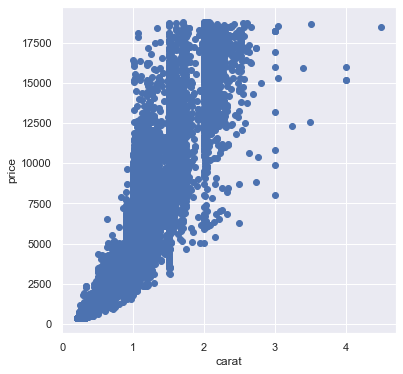

In [75]:
plt.figure(figsize = (6,6))
plt.scatter(y = 'price', x = 'carat' ,data = zirconia_copy1)
plt.xlabel('carat')
plt.ylabel('price')
count = count + 1
printmd('**Scatterplot between carat and price variable :**')

**Scatterplot between x and price variable :**

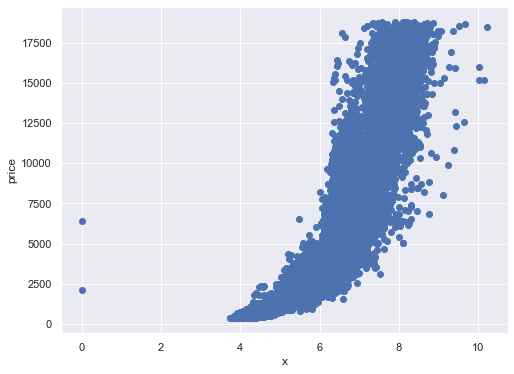

In [76]:
plt.figure(figsize = (8,6))
plt.scatter(y = 'price', x = 'x' ,data = zirconia_copy1)
plt.xlabel('x')
plt.ylabel('price')
count = count + 1
printmd('**Scatterplot between x and price variable :**')

## Note: 
- for better visualization of nature of plot between 'y' and 'price', 'z' and 'price';  1 higher magnitude value in 'y' and 1 in 'z' are removed.

In [77]:
print('For better visualization of scatter plot between y and price, the number of high magnitude values removed from y are:',
     zirconia_copy1[zirconia_copy1['y'] > 20]['y'].count())

For better visualization of scatter plot between y and price, the number of high magnitude values removed from y are: 1


In [78]:
print('For better visualization of scatter plot between y and price, the number of high magnitude values removed from z are:',
     zirconia_copy1[zirconia_copy1['z'] > 20]['z'].count())

For better visualization of scatter plot between y and price, the number of high magnitude values removed from z are: 1


**Scatterplot between y and price variable :**

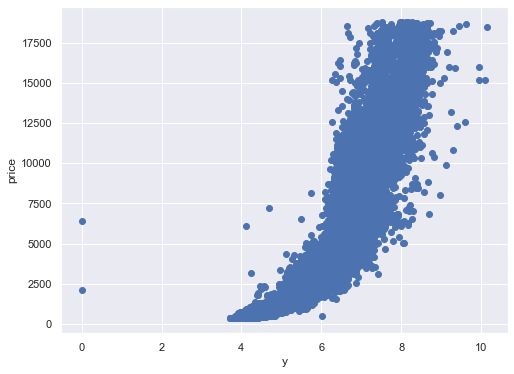

In [79]:
plt.figure(figsize = (8,6))
plt.scatter(y = 'price', x = 'y' ,data = zirconia_copy1[zirconia_copy1['y'] < 20])
plt.xlabel('y')
plt.ylabel('price')
count = count + 1
printmd('**Scatterplot between y and price variable :**')

**Scatterplot between z and price variable :**

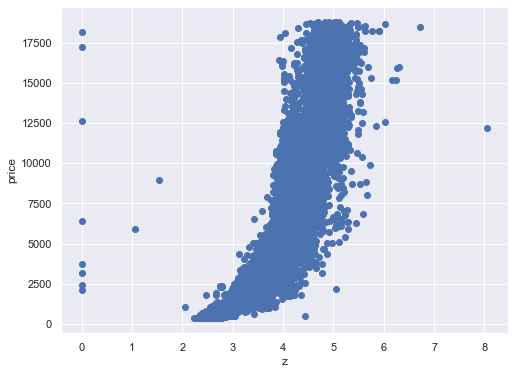

In [80]:
plt.figure(figsize = (8,6))
plt.scatter(y = 'price', x = 'z' ,data = zirconia_copy1[zirconia_copy1['z'] < 20])
plt.xlabel('z')
plt.ylabel('price')
count = count + 1
printmd('**Scatterplot between z and price variable :**')

**Scatterplot between depth and price variable :**

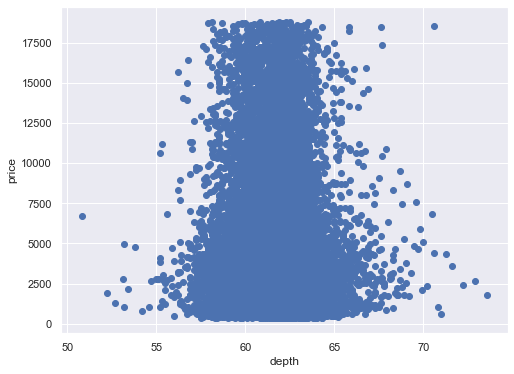

In [81]:
plt.figure(figsize = (8,6))
plt.scatter(y = 'price', x = 'depth' ,data = zirconia_copy1)
plt.xlabel('depth')
plt.ylabel('price')
count = count + 1
printmd('**Scatterplot between depth and price variable :**')

**Scatterplot between table and price variable :**

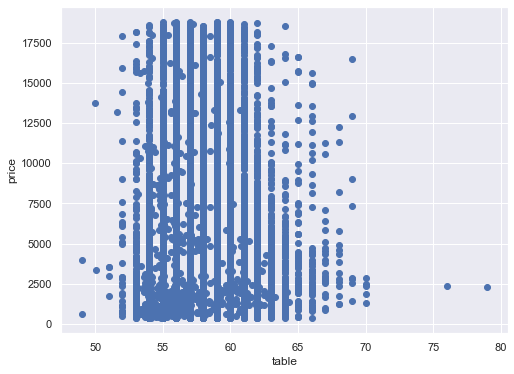

In [82]:
plt.figure(figsize = (8,6))
plt.scatter(y = 'price', x = 'table' ,data = zirconia_copy1)
plt.xlabel('table')
plt.ylabel('price')
count = count + 1
printmd('**Scatterplot between table and price variable :**')

In [83]:
printmd('**Pearson Correlation values of the variables with the price variable:**')
zirconia_copy1.corr()['price'].sort_values(ascending = False)

**Pearson Correlation values of the variables with the price variable:**

price    1.000000
carat    0.922409
x        0.886554
y        0.856441
z        0.850682
table    0.126844
depth   -0.002895
Name: price, dtype: float64

Pointplot of the categorical variables with the independent variables 'carat', 'x', 'y', 'z':


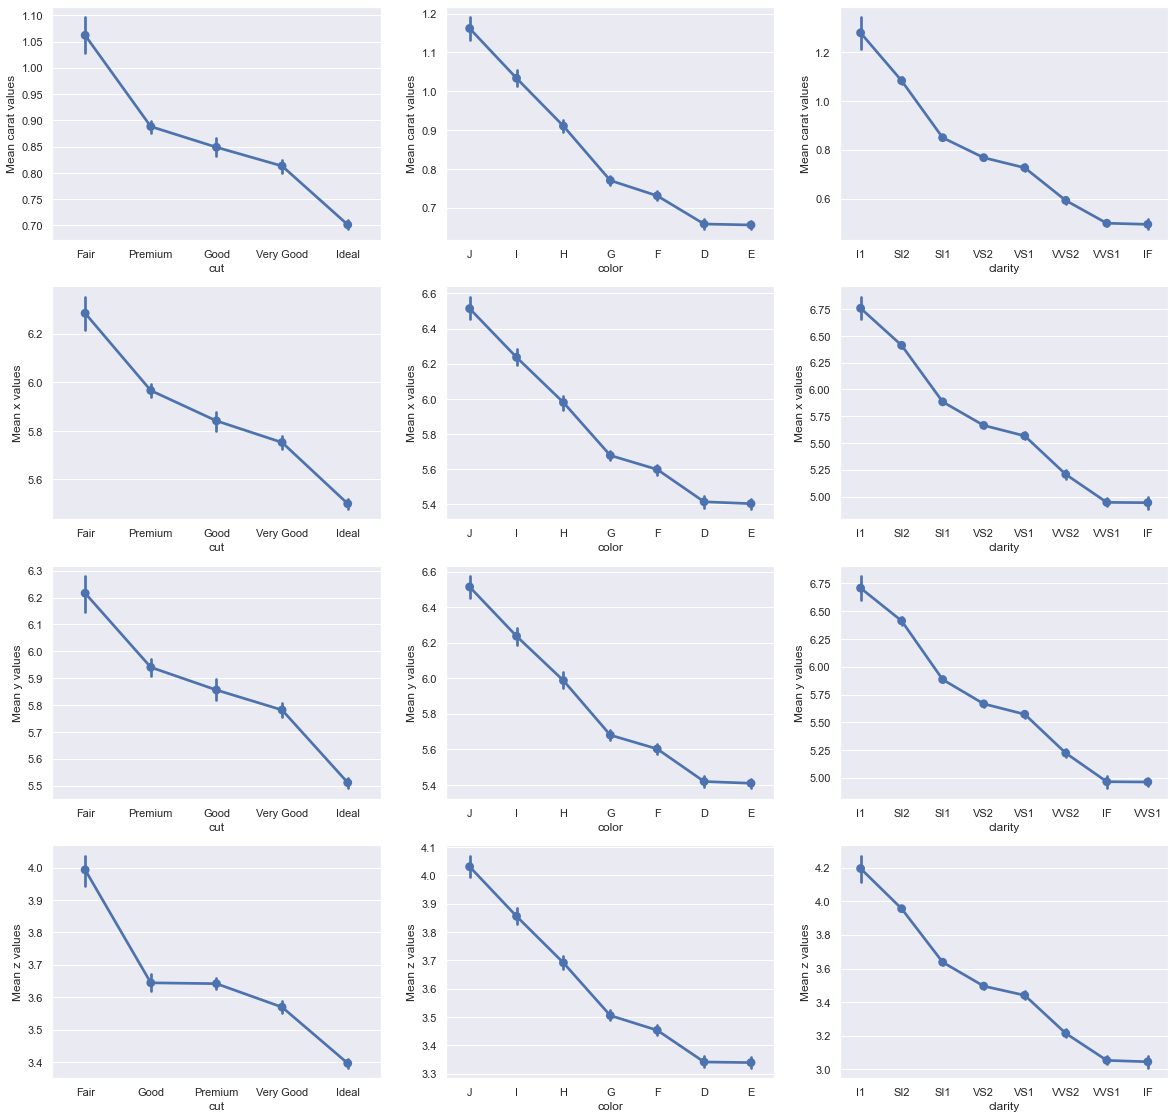

In [84]:
count = 1
plt.figure(figsize = (20,30))
for i in ['carat','x','y','z']:
    for j in cat_vars:
        plt.subplot(6,3,count)
        sns.pointplot(x = j, y = i, data = zirconia_copy1,
                 order = zirconia_copy1.groupby(j)[i].mean().sort_values(ascending = False).index)
        plt.ylabel('Mean ' + str(i) + ' values')
        plt.xlabel(str(j))
        count = count + 1
print('Pointplot of the categorical variables with the independent variables \'carat\', \'x\', \'y\', \'z\':')

**Pointplot of the categorical variables with the price variable:**

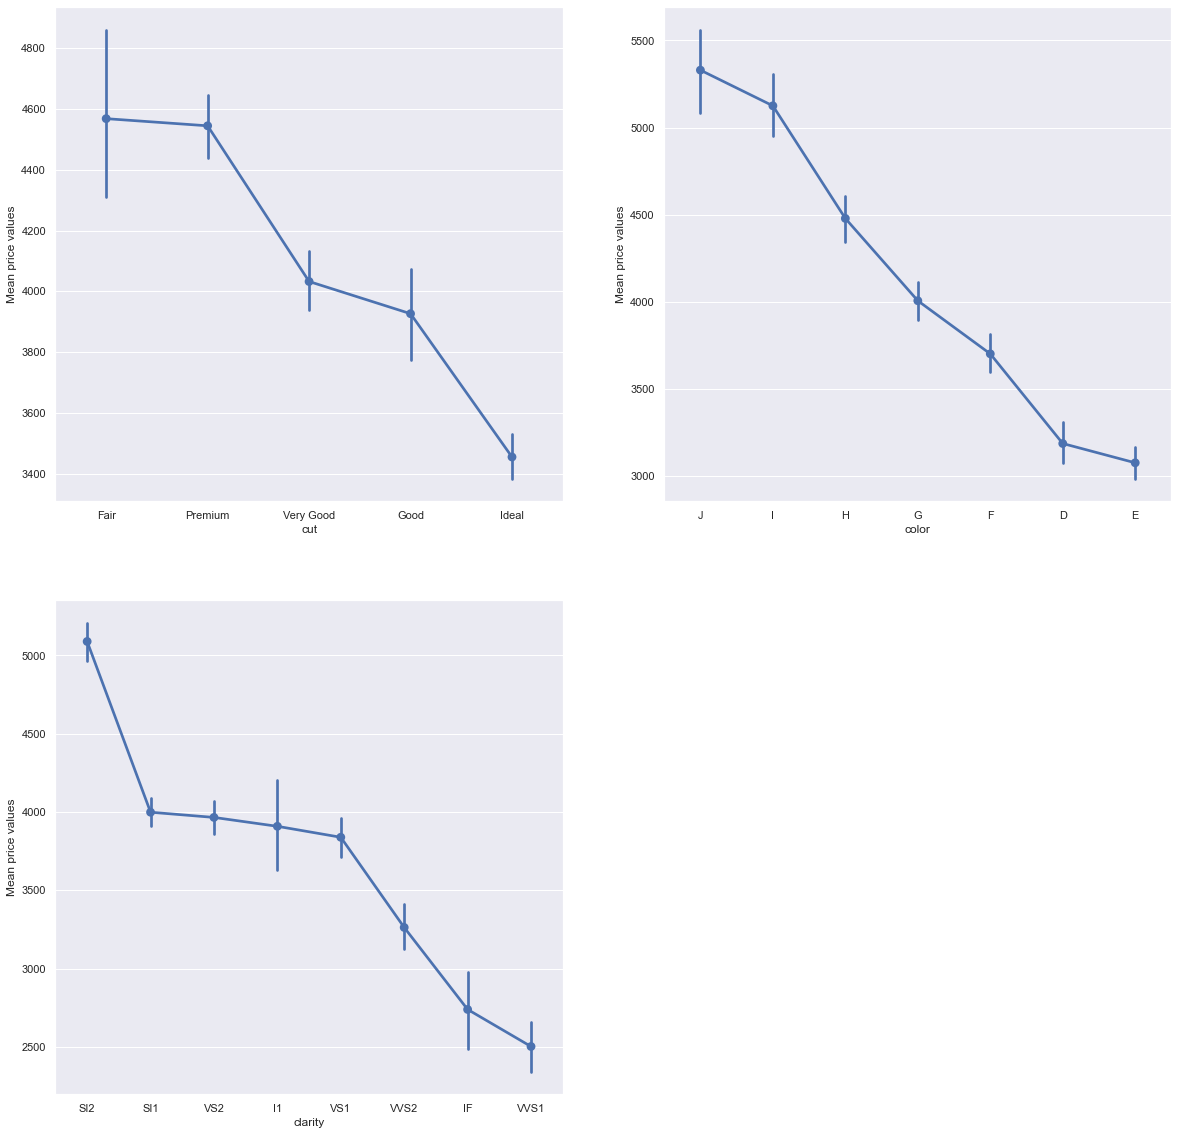

In [85]:
count = 1
plt.figure(figsize = (20,20))
for i in cat_vars:
    plt.subplot(2,2,count)
    sns.pointplot(x = i, y = 'price', data = zirconia_copy1, 
                order = zirconia_copy1.groupby(i)['price'].mean().sort_values(ascending = False).index)
    plt.ylabel('Mean price values')
    plt.xlabel(str(i))
    count = count + 1
printmd('**Pointplot of the categorical variables with the price variable:**')

## Important Insights from EDA:
1. **'carat' :** From the scatter plot with price, it is observed that overall price seems to increase with 'carat'. This is also confirmed by the high positive correlation value, which is approximately 0.92. **This means that the price of the cubic zirconia diamond seems to increase with carat weight of the cubic zirconia.**
2. **'x' :** From the scatter plot with price, it is observed that price has non linearly increasing relationship with 'x'. This also supported by the high positive correlation value of approximately 0.88. **This means that the price of the cubic zirconia diamond seems to increase with length of the cubic zirconia diamond.**
3. **'y' :** From the scatter plot with price, it is observed that price has non linearly increasing relationship with 'y'. This also supported by the high positive correlation value of approximately 0.86. **This means that the price of the cubic zirconia diamond seems to increase with width of the cubic zirconia diamond.**
4. **'z' :** From the scatter plot with price, it is observed that price has non linearly increasing relationship with 'z'. This also supported by the high positive correlation value of approximately 0.85. **This means that the price of the cubic zirconia diamond seems to increase with height of the cubic zirconia diamond.**
5. **'depth' & 'table' :** From the scatter plots with price it is observed that neither 'depth' nor 'table' seem to have any particular increasing or decreasing trend with 'price'. This also supported by low correlation values of  -0.003 and 0.13 respectively with 'price'. **This means that for the given range of 'depth' and 'table' there are both low and high prices present.**
6. **'cut', 'color' & 'clarity' :** It is observed that in general the mean prices of higher quality cut, color or clarity are having less mean prices, this contradiction arises because the mean values of 'carat', 'x', 'y' and 'z' are higher  for the diamonds with lower quality cut, color or clarity. **The effect of 'carat', 'x', 'y' and 'z' more than compensates the effect of quality of diamond based on cut, color or clarity.**

## Recommendations:
1.	It is observed that carat and dimensions are important factors in pricing of the diamonds irrespective of cut, color or quality. If carat weight is more, then the prices are higher on average. Thus the diamond manufactures may focus on increasing the carat weight such that the diamonds could be priced higher.
2.	Since the quality of color, cut and clarity are not affecting the price as much as dimensions and carat weight, i.e. prices more than compensates the effect of quality of diamond based on cut, color or clarity. The manufacturers may less attention in acquiring higher quality of color, cut and clarity which are cost and time intensive.
3.	There is manufacturing cost associated with making depth and table within the ideal range such that light reflection of the diamond is perfect. But since it is observed that certain diamonds not within the ideal range of table and depth are still priced higher owing to the dimensions and carat weight of the diamond, thus the manufacturer may not pay extra attention to the precision of these parameters and thereby leading to reduction in costs.
<p>
    
**Thus as observed by the data analysis, the manufacturer can lean more on carat weight (i.e. size) than on the appearance of the diamond.** 


# PROBLEM 2:
You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

## Dataset Background:
- A tour and travel agency which deals in selling holiday packages has provided details of 872 employees of a company; among these employees, some opted for the package and some didn't. The model should help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set.
- Here the classification model is build using Logistic Regression and LDA.

## Data Dictionary of the Dataset:
The description of the attributes present in the dataset are given below:
1. **Holliday_Package:** Opted for Holiday Package yes/no?
2. **Salary:** Employee salary
3. **age:** Age in years
4. **educ:** Years of formal education
5. **no_young_children:** The number of young children (younger than 7 years)
6. **no_older_children:** Number of older children
7. **foreign:** foreigner Yes/No

## Inferences from the Data Dictionary:
- **'Holliday_Package' is the dependent variable.**
- **There are 6 independent variables. 'foreign' variable is expected to be object type and all other independent variables are expected to be numerical type.**

## Data Ingestion: 

In [86]:
holiday = pd.read_csv('Holiday_Package.csv') 

In [87]:
printmd('**Viewing the top 5 rows of dataset :**')
holiday.head()

**Viewing the top 5 rows of dataset :**

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [88]:
printmd('**Viewing the bottom 5 rows of dataset :**')
holiday.tail()

**Viewing the bottom 5 rows of dataset :**

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes
871,872,no,74659,51,10,0,0,yes


## Inferences:
- All values are properly loaded.
- The serial number column is also loaded with 'Unnamed: 0' as the variable name. It needs to dropped.
- The holiday package column name is 'Holliday_Package', it will be changed to 'Holiday_Package'.

## Dropping the Serial Number column:

In [89]:
holiday.drop('Unnamed: 0', axis = 1, inplace =True)
printmd('**The column names after dropping the column with serial numbers:**')
holiday.columns

**The column names after dropping the column with serial numbers:**

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

## Inferences:
- The serial number column with column name 'Unnamed: 0' is dropped.

In [90]:
printmd('**Viewing the top 5 rows of dataset :**')
holiday.head()

**Viewing the top 5 rows of dataset :**

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


## Changing column name 'Holliday_Package' to 'Holiday_Package':

In [91]:
holiday.rename(columns={'Holliday_Package': 'Holiday_Package'}, inplace = True)
print('The column names after changing the column name from \'Holliday_Package\' to \'Holiday_Package\' ')
holiday.columns

The column names after changing the column name from 'Holliday_Package' to 'Holiday_Package' 


Index(['Holiday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

In [92]:
printmd('**Shape of the Dataset:**')
holiday.shape

**Shape of the Dataset:**

(872, 7)

In [93]:
printmd('**Data types of the Dataset:**')
holiday.dtypes

**Data types of the Dataset:**

Holiday_Package      object
Salary                int64
age                   int64
educ                  int64
no_young_children     int64
no_older_children     int64
foreign              object
dtype: object

In [94]:
printmd('**Total Number of Null values for each variable:**')
holiday.isna().sum()

**Total Number of Null values for each variable:**

Holiday_Package      0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [95]:
printmd('**Information of the Dataset:**')
holiday.info()

**Information of the Dataset:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
Holiday_Package      872 non-null object
Salary               872 non-null int64
age                  872 non-null int64
educ                 872 non-null int64
no_young_children    872 non-null int64
no_older_children    872 non-null int64
foreign              872 non-null object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


## Inferences:
- The Dataset has 872 rows and 7 columns of data.
- **There are no Null values present in the dataset.**
- Out of the 7 columns: 5 are 'int64' and 2 are 'object' data type.

## Checking for Duplicates:

In [96]:
printmd('**Total Number of Duplicate instances present in the dataset:**')
holiday.duplicated().sum()

**Total Number of Duplicate instances present in the dataset:**

0

## Inferences:
- There are no duplicate instances in the dataset.

## Data Description :

## Numerical:

In [97]:
printmd('**Describing the Variables:**')
cont_vars = list(holiday.describe().columns)
holiday.describe().T

**Describing the Variables:**

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


## Inferences:
- **No out of context values are observed in any of the variables.**
- 'Salary' has mean greater than median and is expected to be right skewed.
-  'age', 'educ'and 'no_older_children' have nearly equal mean and median values and are not expected to be skewed.
- 'no_young_children' has at least 75% of the instances 0 value, i.e. at least 75% of the instances are people with no children below 7 years.

In [98]:
printmd('**Number of unique values in the Numerical Variables:**')
for i in cont_vars :
    print(i + ':')
    print(holiday[i].nunique())
    print()

**Number of unique values in the Numerical Variables:**

Salary:
864

age:
43

educ:
20

no_young_children:
4

no_older_children:
7



## Note:
- **Since the number of unique values are only 4 and 7 in 'no_young_children' and 'no_older_children'. Hence analysing them with the categorical variables can give good insights.**

## Categorical:

In [99]:
printmd('**Describing the Categorical variables :**')
holiday.describe(include = 'object').T

**Describing the Categorical variables :**

,count,unique,top,freq
Holiday_Package,872,2,no,471
foreign,872,2,no,656


In [100]:
cat_vars = ['Holiday_Package', 'foreign', 'no_older_children', 'no_young_children' ]
printmd('**Value counts of variables :**')
for i in cat_vars:
    print(i)
    print(holiday[i].value_counts())
    print()

**Value counts of variables :**

Holiday_Package
no     471
yes    401
Name: Holiday_Package, dtype: int64

foreign
no     656
yes    216
Name: foreign, dtype: int64

no_older_children
0    393
2    208
1    198
3     55
4     14
6      2
5      2
Name: no_older_children, dtype: int64

no_young_children
0    665
1    147
2     55
3      5
Name: no_young_children, dtype: int64



## Inferences:
- **No out of context categories are observed in 'Holiday_Package' and 'foreign'.**
- **'Holiday_Package' :** The dependent variable has approximately 54% as people who didn't opted for holiday package and 46% of the people opted for the holiday package. **Thus the dataset is nearly balanced, imbalance effect in classification model is not expected.**
- The number of foreigner employees is much less than non foreign employees.
- The number of employees with 4 or more number of children above 7 years is very less.
- Most of the employees have no children below 7 years. The number of employees with 3 number of children below 7 years is very less. 

# EDA
## Univariate Analysis:

## Numerical Variables:
- Univariate analysis on'Salary', 'age', 'educ', 'no_young_children' and 'no_older_children' variables are done here.

**Histogram Plots of the Variables:**

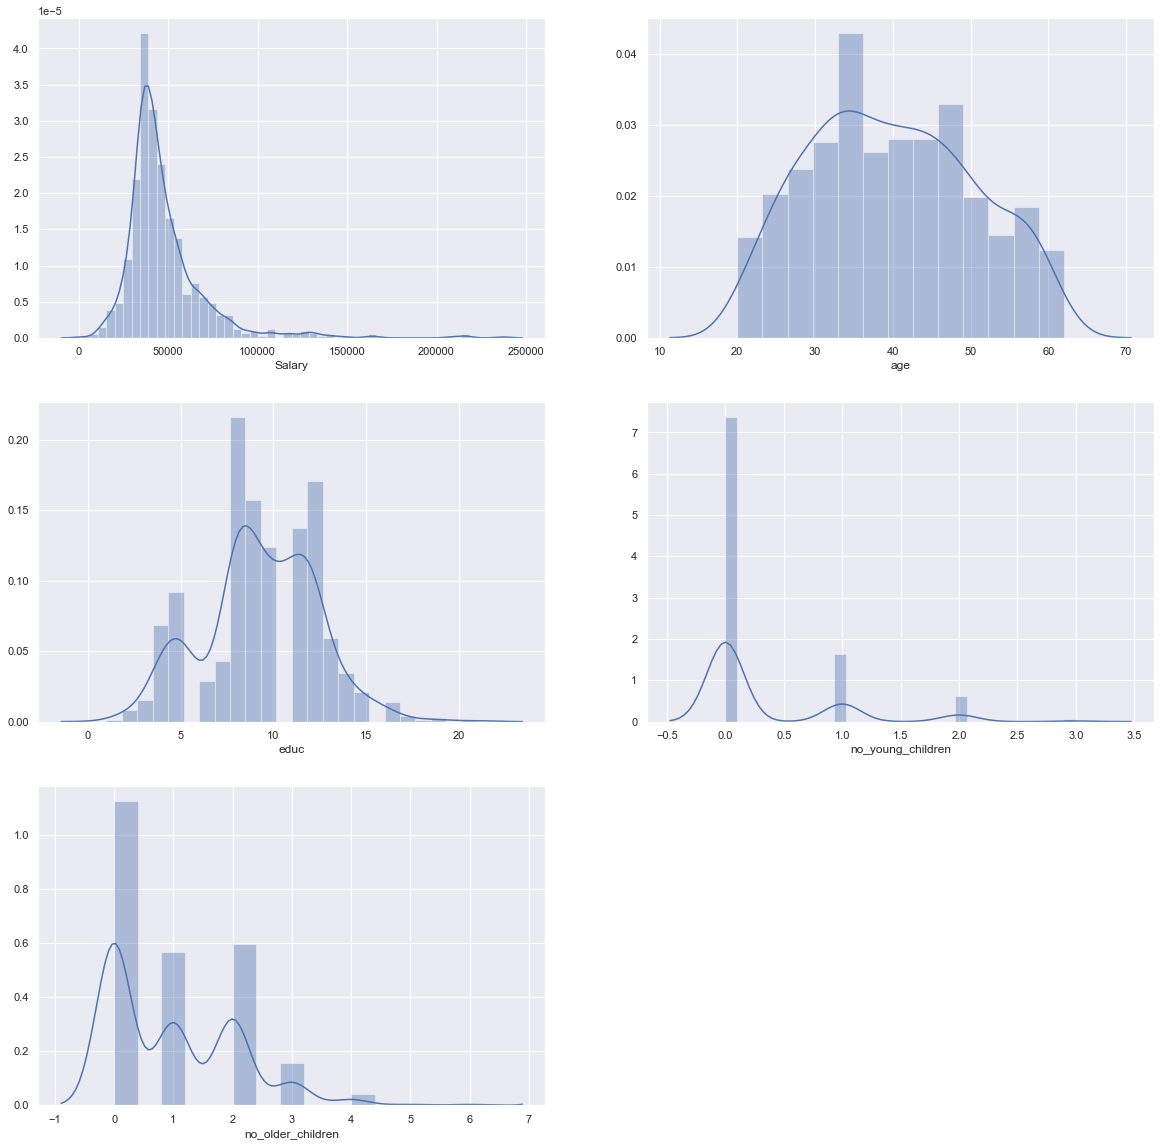

In [101]:
plt.figure(figsize=(20,20))
for i in range(0,5):
    plt.subplot(3,2,i+1)
    if cont_vars[i] == 'no_young_children':
        sns.distributions._has_statsmodels = False 
        sns.distplot(holiday[cont_vars[i]])
        sns.distributions._has_statsmodels = True
    else:
        sns.distplot(holiday[cont_vars[i]])
printmd('**Histogram Plots of the Variables:**')

## Note:
- Since 'no_young_children' has a lot of zeros, a runtime error is thrown as 'Selected KDE bandwidth is 0. Cannot estimate density.' 
- The bandwidth calculation and the error itself are coming out of statsmodels. So if *'sns.distributions._has_statsmodels'* is set to False then 'scipy' package will be used to compute the KDE, and scipy actually doesn't raise any error here, and generates a reasonable density estimate.

## Inferences:
- 'Salary' is right skewed with a thin long right tail.
- 'age' variable looks symmetrical with most of the people between 30 to 50 years.
- 'educ' looks bi modal.
- 'no_young_children' and 'no_older_children' look like clusters formed for each unique value and will be better analysed with categorical variables.

In [102]:
printmd('**Skewness of the different variables in descending order of positive skewness:**')
holiday[cont_vars].skew().sort_values(ascending = False)

**Skewness of the different variables in descending order of positive skewness:**

Salary               3.103216
no_young_children    1.946515
no_older_children    0.953951
age                  0.146412
educ                -0.045501
dtype: float64

## Inferences:
- 'Salary' is right skewed with a skewness value of 3.1.
- 'no_young_children' has skewness above 1 and 'no_older_children' has skewness nearly equal to 1.
- 'age' and 'educ' have very low skewness.

**Boxplot to observe Outliers :**

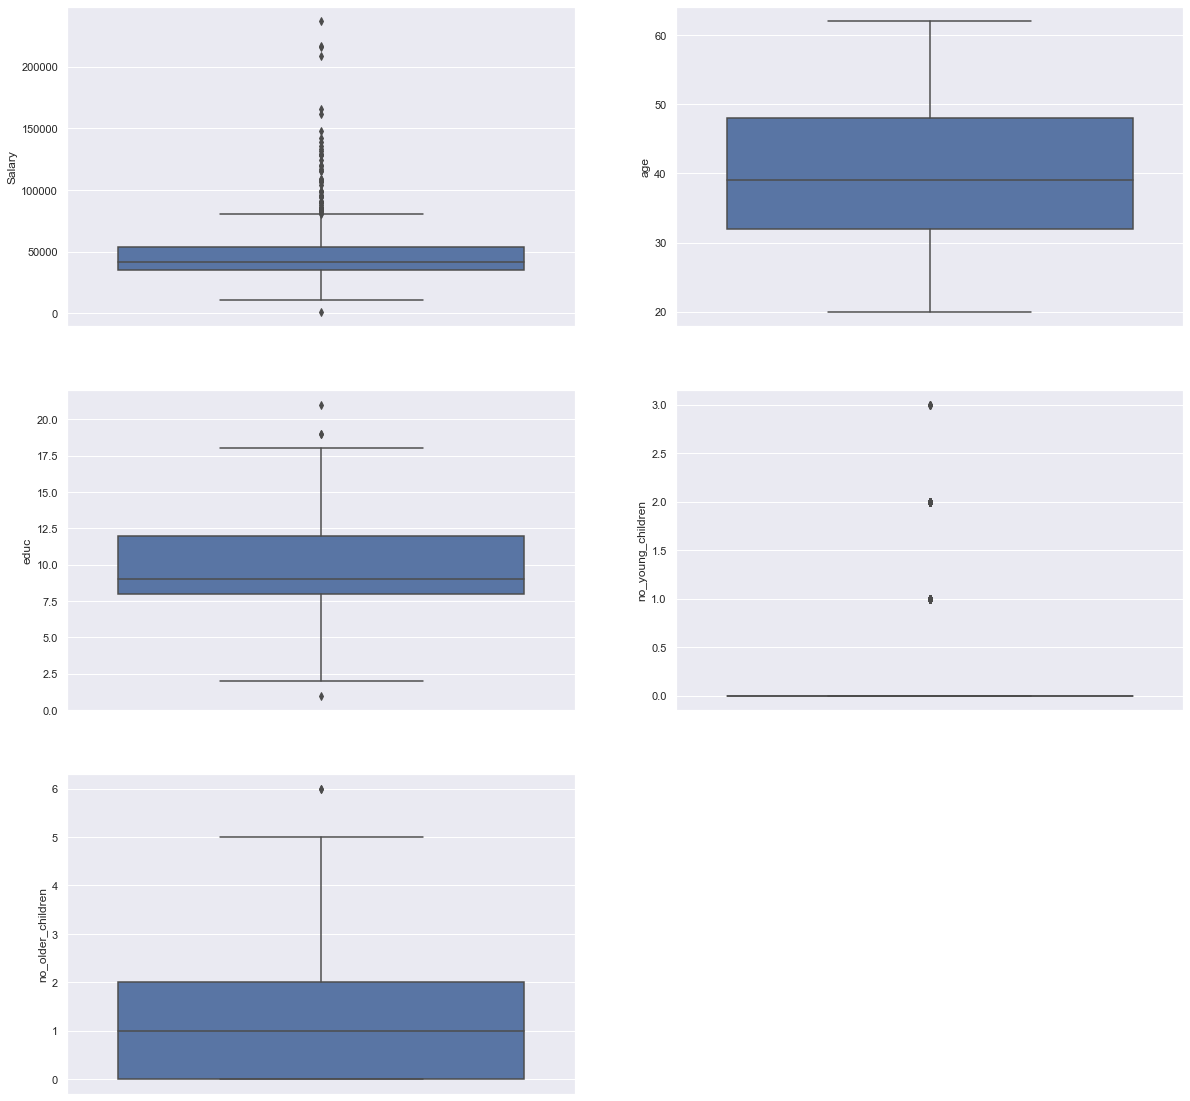

In [103]:
count = 1
plt.figure(figsize=(20,20))
for i in cont_vars :
    plt.subplot(3,2,count)
    sns.boxplot(y= i, data = holiday)
    count = count + 1
printmd('**Boxplot to observe Outliers :**')

## Inferences:
- The outliers present in 'Salary' variable are expected because the distribution of the 'Salary' is expected to be Normal with a right tail as most people are expected to earn within a range of income and few people are expected to comparitively much higher income than most of the people. 
- 'age' variable for the employees of a particular company is expected to have a Normal distribution with less higher or lower range values and it is found to be the same.
- 'educ' variable has few outliers according to IQR because a few employees in the company may have very less and very high education. 
- Since most of the employees have no children below 7 years hence 'no_young_children' except for 0 value is showing all other values as outliers.
- In 'no_older_children' variable, the employees with 6 children are considered to be outlier in the Boxplot.

## Categorical Variables:
- 'no_young_children' and 'no_older_children' will also be observed here.

In [104]:
printmd('**Percentage counts of variables :**')
for i in cat_vars:
    print(i)
    print( round( ((holiday[i].value_counts()/len(holiday[i]))*100), 2) )
    print()

**Percentage counts of variables :**

Holiday_Package
no     54.01
yes    45.99
Name: Holiday_Package, dtype: float64

foreign
no     75.23
yes    24.77
Name: foreign, dtype: float64

no_older_children
0    45.07
2    23.85
1    22.71
3     6.31
4     1.61
6     0.23
5     0.23
Name: no_older_children, dtype: float64

no_young_children
0    76.26
1    16.86
2     6.31
3     0.57
Name: no_young_children, dtype: float64



**Barplot to show percentage counts of variables :**

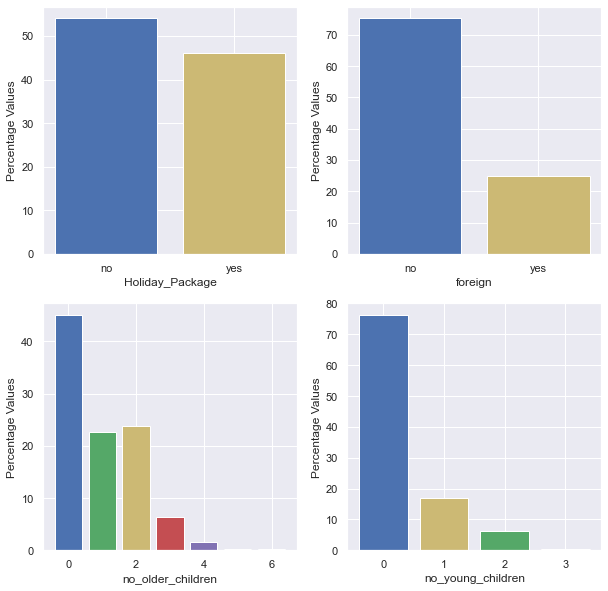

In [105]:
count = 1
plt.figure(figsize = (10,10))
for i in cat_vars:
    plt.subplot(2,2,count)
    temp = holiday[i].value_counts('Normalize')*100
    plt.bar(x = temp.index, height = temp, color = ['b','y','g','r','m','c','darkgreen'])
    plt.ylabel('Percentage Values')
    plt.xlabel(str(i))
    count = count + 1
printmd('**Barplot to show percentage counts of variables :**')

## Inferences:
- As observed in description, we can visualize the percentage distribution of the categories here.
- **'Holiday_Package' variable is nearly balanced with nearly equal percentage of employess present in 'yes' and 'no' category.**
- In 'foreign' variable it is observed that approximately 75.23% of the employees are not foreigners and 24.77% are foreigners.
- In 'no_older_children' variable it is observed that around 45% of the people don't have children older than 7 years old. Only around 8% of the people have more than two children of age older than 7 years.
- In 'no_young_children' variable it is observed that most of the people (around 76%) have no children younger than 7 years old. Around 17% have one child below 7 years and around 7% people have more than 1 child  less than 7 years age.

## Bivariate/Multivariate Analysis between the Independent Variables:

## Numerical - Numerical Independent Variables:

**Pairplot of the independent variables:**

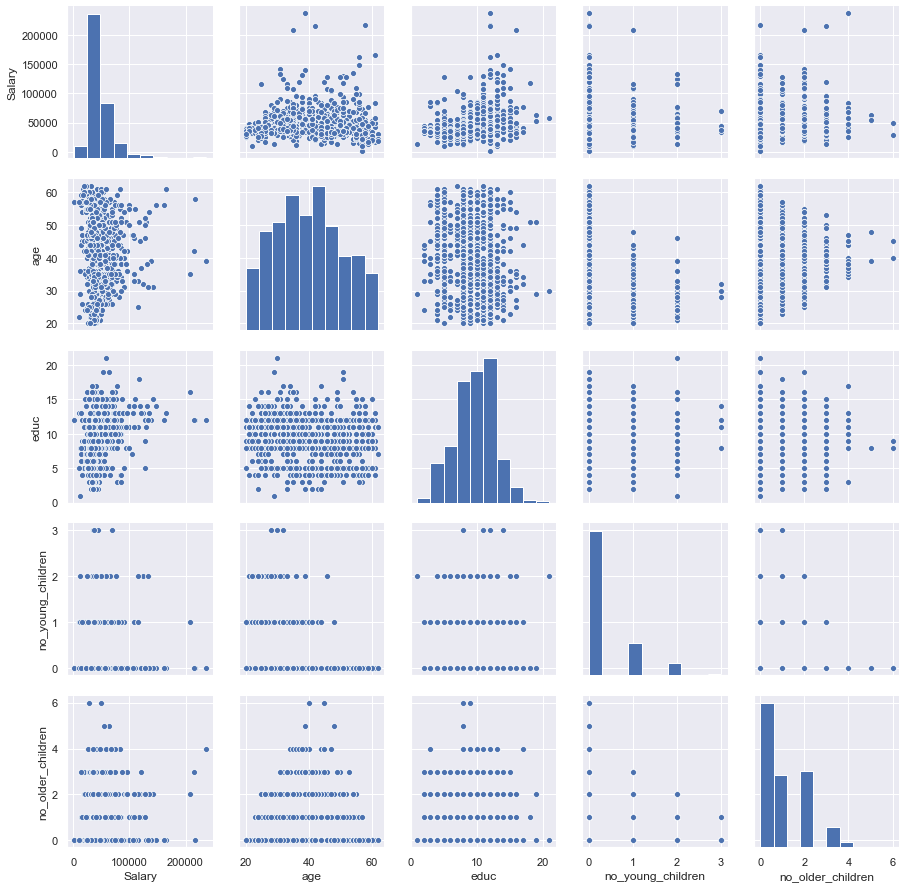

In [106]:
sns.pairplot(holiday[cont_vars])
printmd('**Pairplot of the independent variables:**')

In [107]:
printmd('**Correlation Matrix of the Independent variables showing correlation with each other :**')
holiday[cont_vars].corr()

**Correlation Matrix of the Independent variables showing correlation with each other :**

,Salary,age,educ,no_young_children,no_older_children
Salary,1.000000,0.071709,0.326540,-0.029664,0.113772
age,0.071709,1.000000,-0.149294,-0.519093,-0.116205
educ,0.326540,-0.149294,1.000000,0.098350,-0.036321
no_young_children,-0.029664,-0.519093,0.098350,1.000000,-0.238428
no_older_children,0.113772,-0.116205,-0.036321,-0.238428,1.000000


**Heatmap showing the correlation values between the variables :**

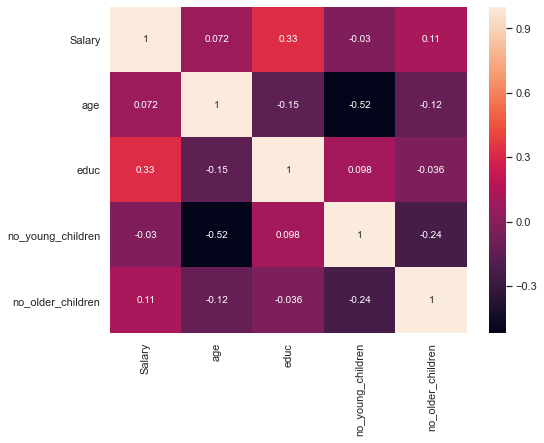

In [108]:
plt.figure(figsize = (8,6))
sns.heatmap(holiday[cont_vars].corr(), annot = True)
printmd('**Heatmap showing the correlation values between the variables :**')

## Inferences:
- There is no high correlation between the variables.
- The maximum correlation is observed between 'age' and 'no_young_children'. It is a negative correlation of -0.52.
- It can also be observed that 'Salary' does not have high positive correlation with 'educ' or 'age'.

In [109]:
for i in ['no_young_children', 'no_older_children']:
    print('Average salary, age and education for number of children in \'' + str(i) + '\':')
    print(round(holiday.groupby(i)['Salary', 'age', 'educ'].mean(),2))

Average salary, age and education for number of children in 'no_young_children':
                     Salary    age   educ
no_young_children                        
0                  48210.35  43.30   9.14
1                  45810.18  29.27   9.76
2                  47275.85  29.07   9.89
3                  45137.60  29.60  11.20
Average salary, age and education for number of children in 'no_older_children':
                     Salary    age   educ
no_older_children                        
0                  45520.89  41.62   9.54
1                  46920.36  39.16   8.79
2                  50788.35  37.80   9.46
3                  50339.58  38.80   8.71
4                  65118.71  40.29  10.29
5                  59185.50  43.50   8.00
6                  38605.00  42.50   8.50


**Average salary, age and education for number of children above and below 7 years:**

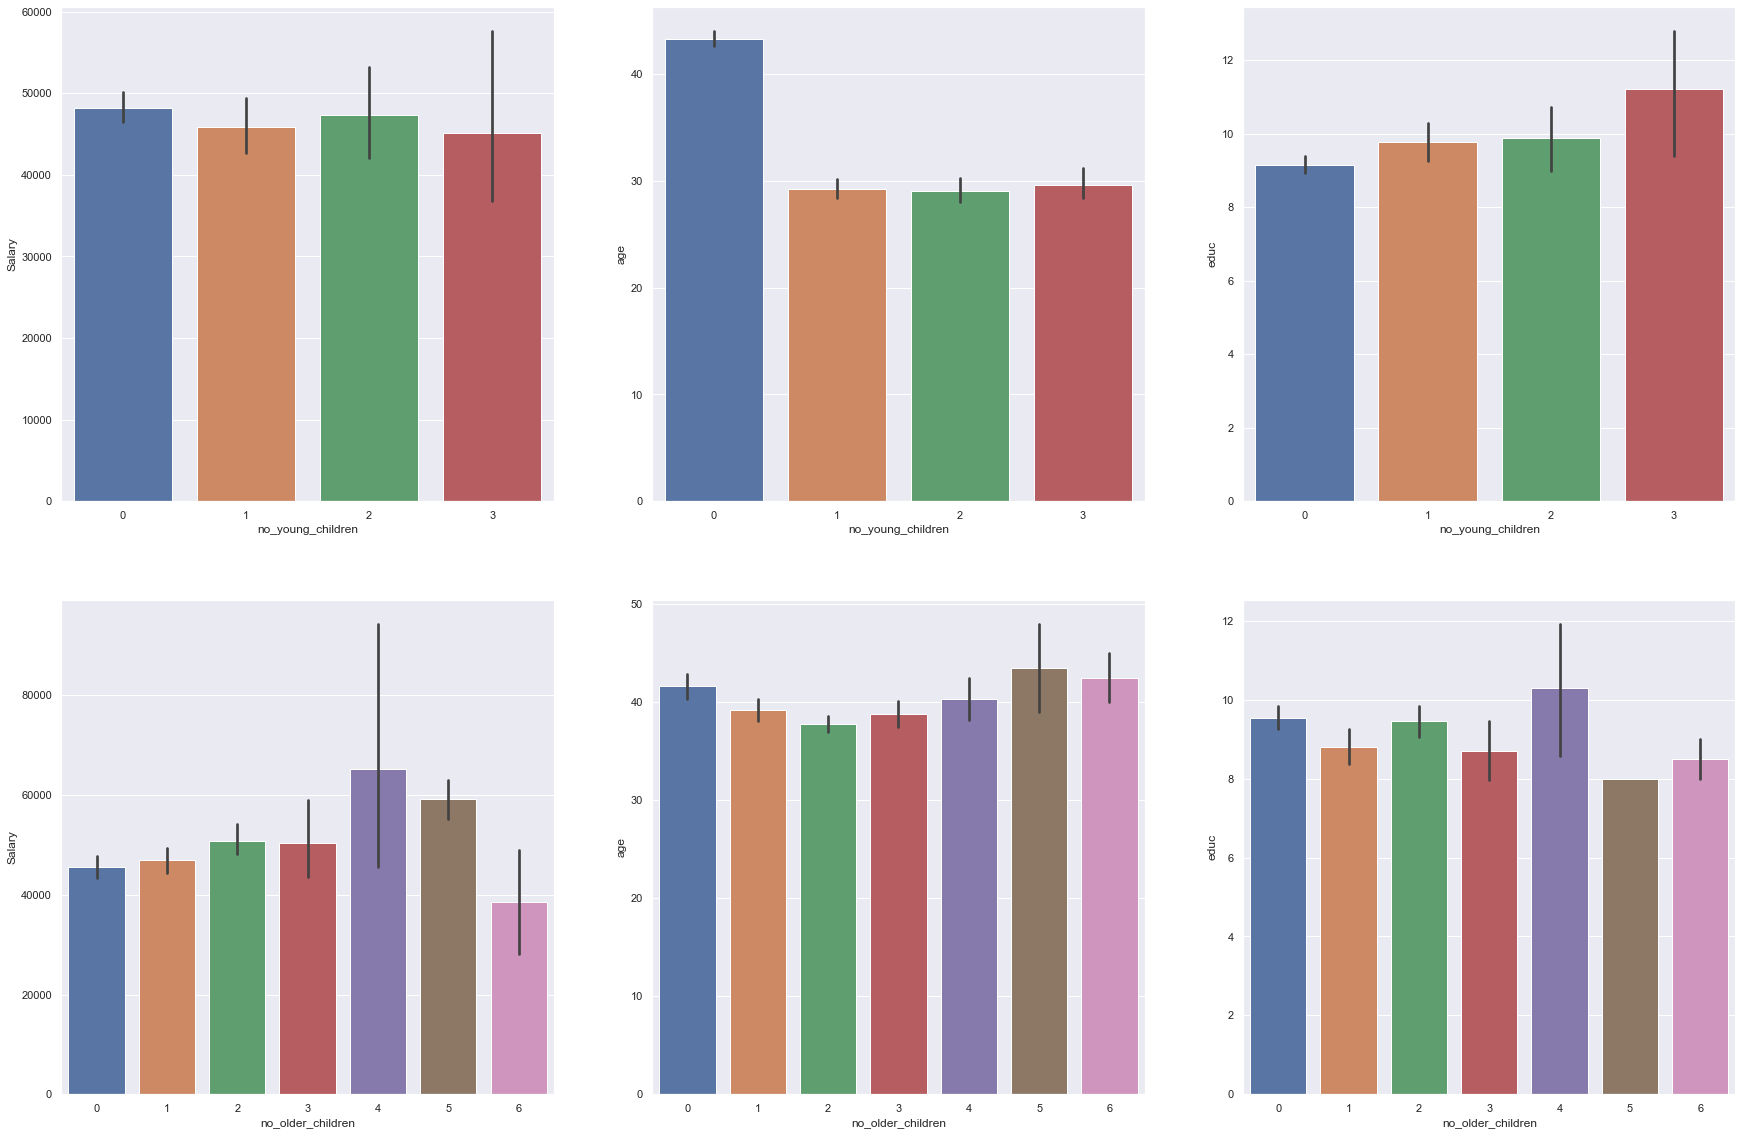

In [110]:
count = 1
plt.figure(figsize = (30,20))
for i in ['no_young_children', 'no_older_children']:
    for j in ['Salary', 'age', 'educ']:
        plt.subplot(2,3,count)
        sns.barplot(x = i, y = j, data = holiday)
        count = count +1
printmd('**Average salary, age and education for number of children above and below 7 years:**')

## Inferences:
- The average salary for employees is nearly same for any number of children below 7 years of age.
- **The average age for employees who have no children below 7 years of age is considerably higher than employees who have children below 7 years.**
- The average number of years of education of employees is nearly same for any number of children below 7 years of age.
- The average salary, age and years of education for employees is nearly same for any number of children above 7 years of age. Although for employees with 4 children above 7 years the average salary is higher but there is too much variation in salary among these employees.


## Numerical - Categorical Independent Variables:

In [111]:
printmd('**Average Salary, age, years of education and number of children below and above 7 years on an average for foreign and nono foreign employees:**')
round(holiday.groupby('foreign')[cont_vars].mean(),2)

**Average Salary, age, years of education and number of children below and above 7 years on an average for foreign and nono foreign employees:**

,Salary,age,educ,no_young_children,no_older_children
foreign,,,,,
no,50429.25,40.60,10.04,0.28,0.97
yes,39528.94,37.99,7.09,0.40,1.02


**Average Salary, age, years of education and number of children below and above 7 years on an average for foreign and nono foreign employees:**

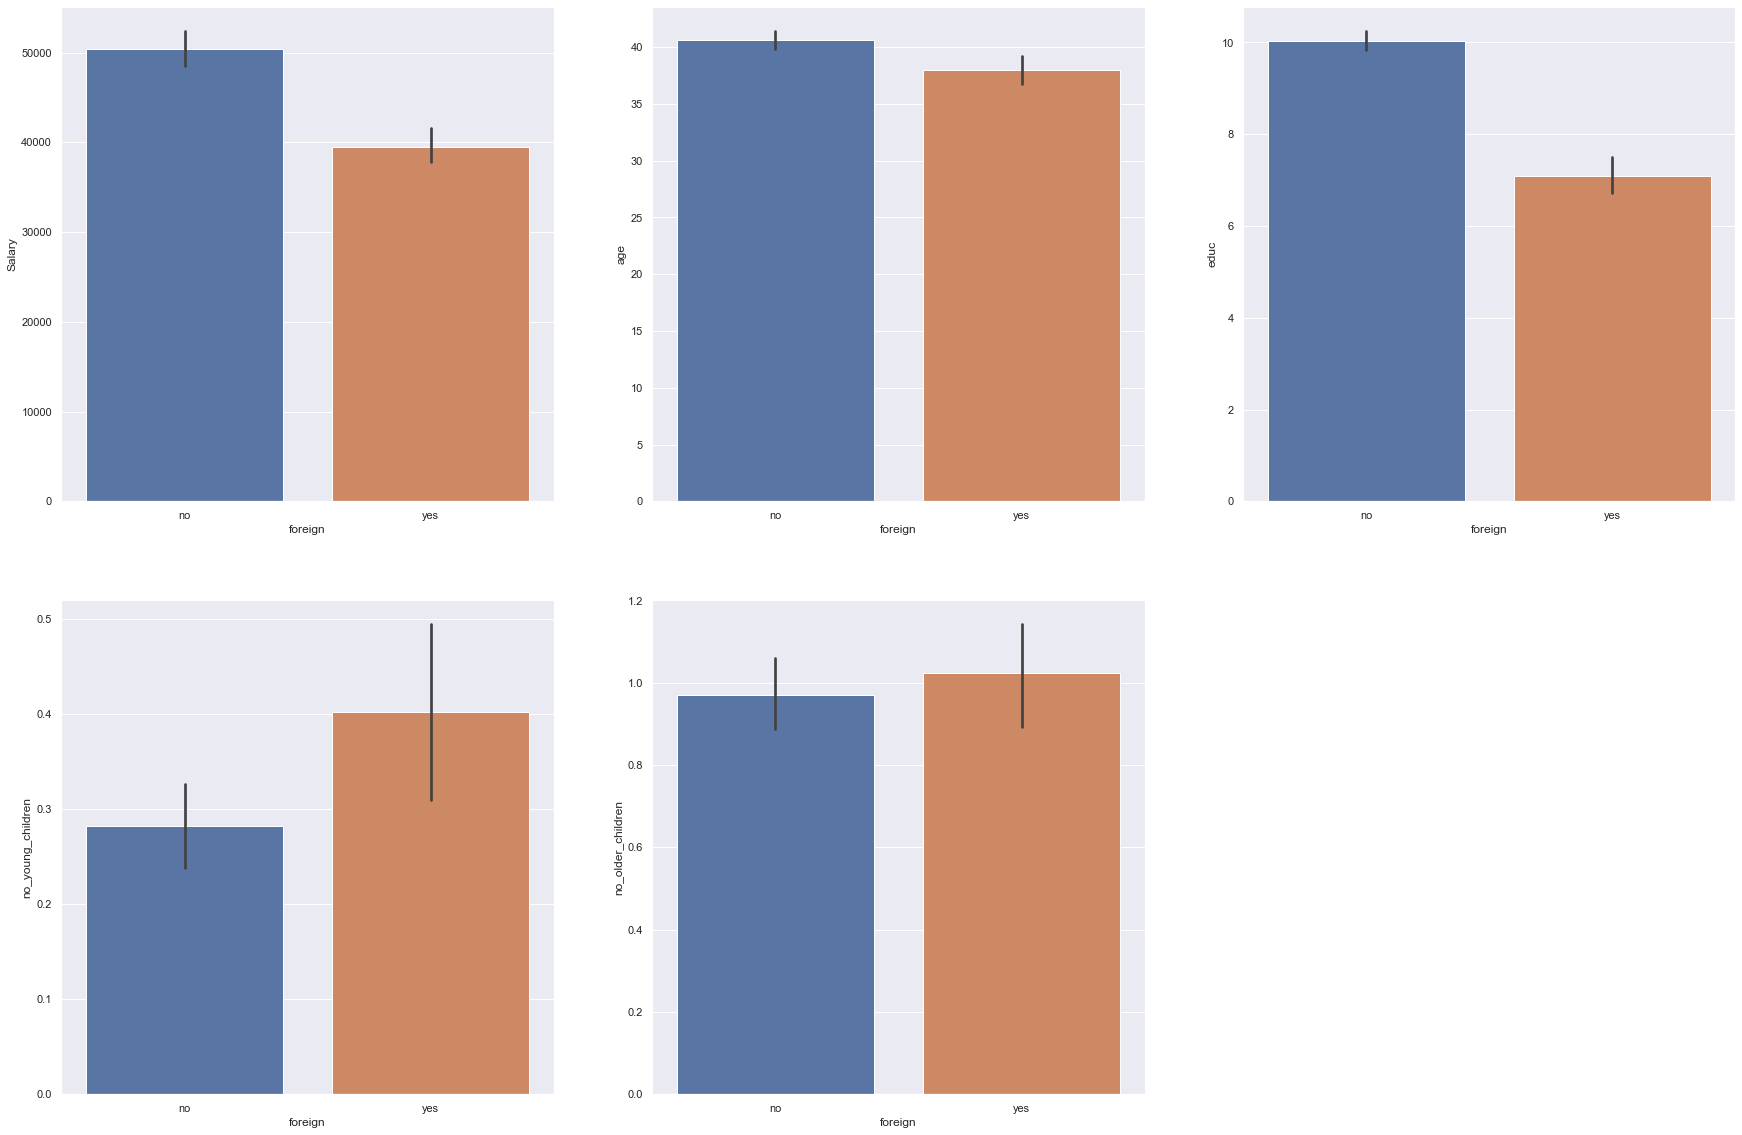

In [112]:
count = 1
plt.figure(figsize = (30,20))
for i in cont_vars:
    for j in ['foreign']:
        plt.subplot(2,3,count)
        sns.barplot(x = j, y = i, data = holiday)
        count = count +1
printmd('**Average Salary, age, years of education and number of children below and above 7 years on an average for foreign and nono foreign employees:**')


## Inferences:
- **Average 'Salary' is much higher for employees who are not foreigners than employees who are foreigners.**
- Average 'age' and number of years of education is higher for employees who are not foreigners than employees who are foreigners.
- The employees who are not foreigners have less number of young children on an average. For number of older children although the mean is high for foreign employees but there is a lot of variation in the data.

**Boxplot of Salary, age, years of education and number of children below and above 7 years on an average for foreign and nono foreign employees:**

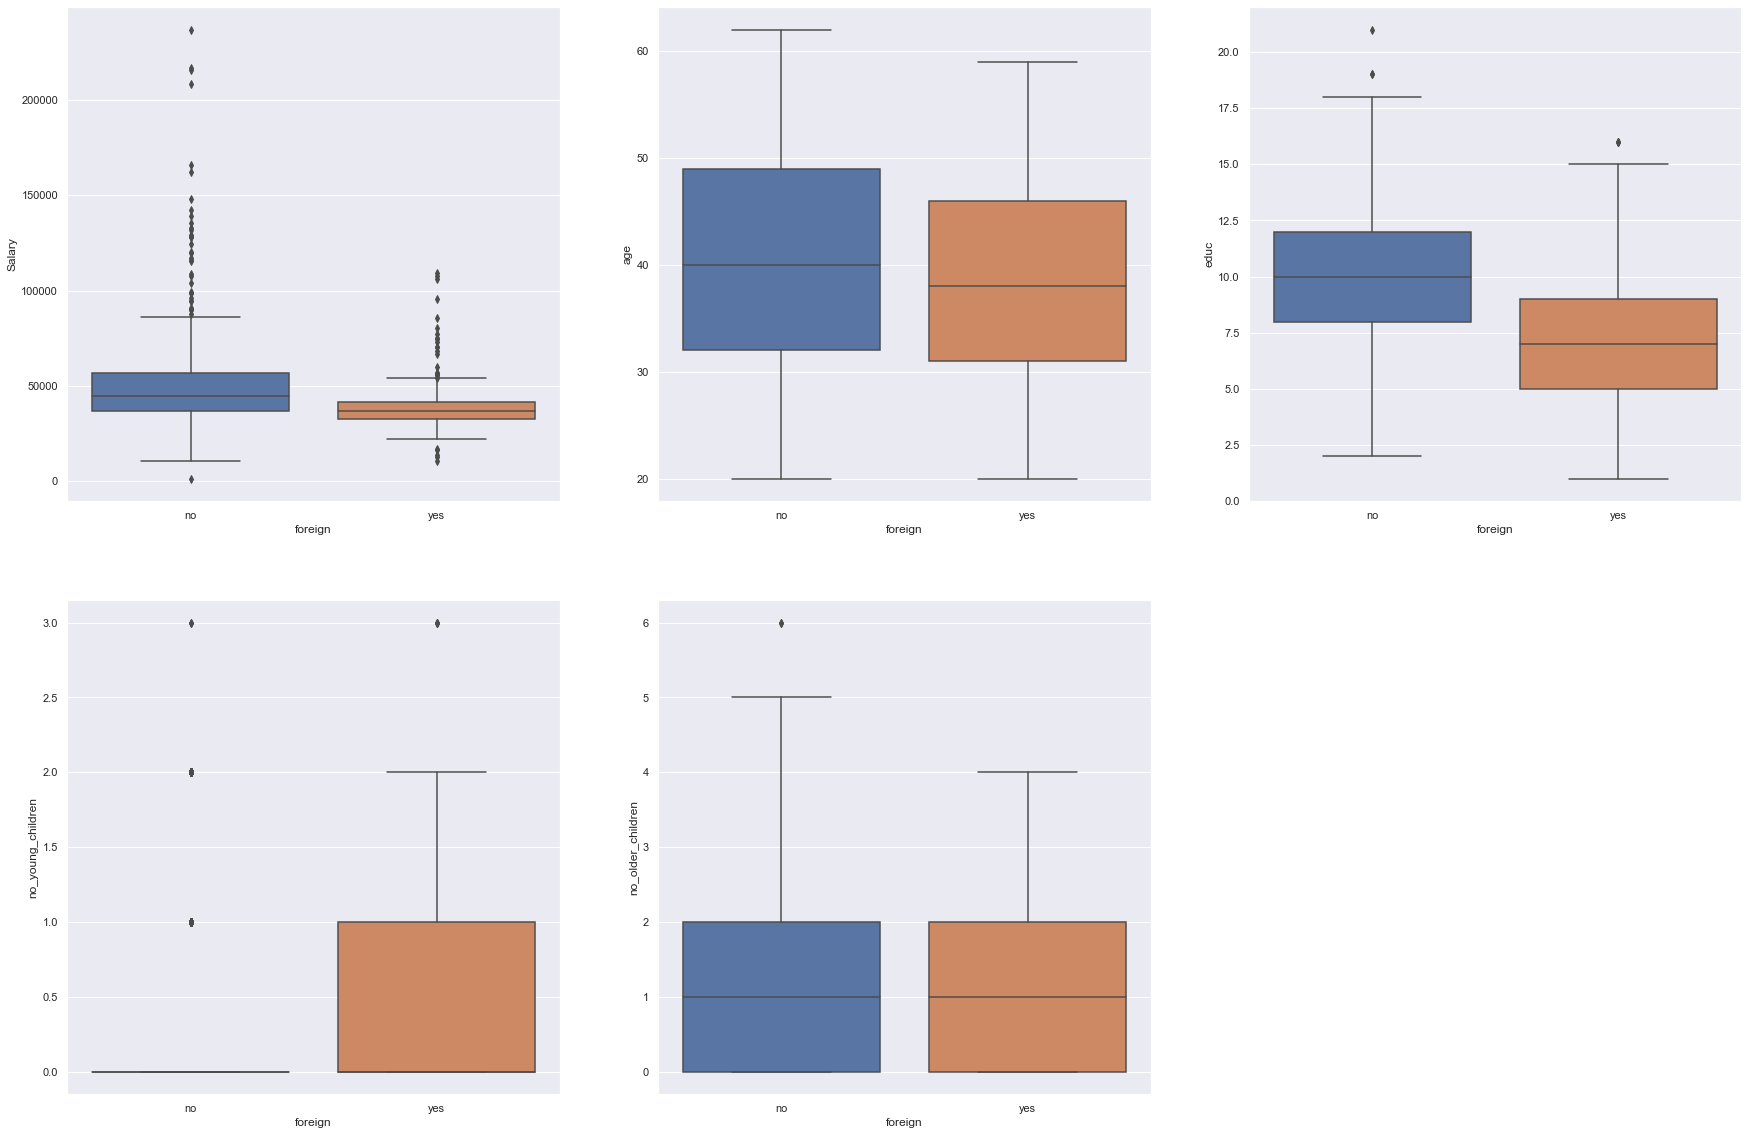

In [113]:
count = 1
plt.figure(figsize = (30,20))
for i in cont_vars:
    for j in ['foreign']:
        plt.subplot(2,3,count)
        sns.boxplot(x = j, y = i, data = holiday)
        count = count +1
printmd('**Boxplot of Salary, age, years of education and number of children below and above 7 years on an average for foreign and nono foreign employees:**')


**Stripplot of Salary, age, years of education and number of children below and above 7 years on an average for foreign and nono foreign employees:**

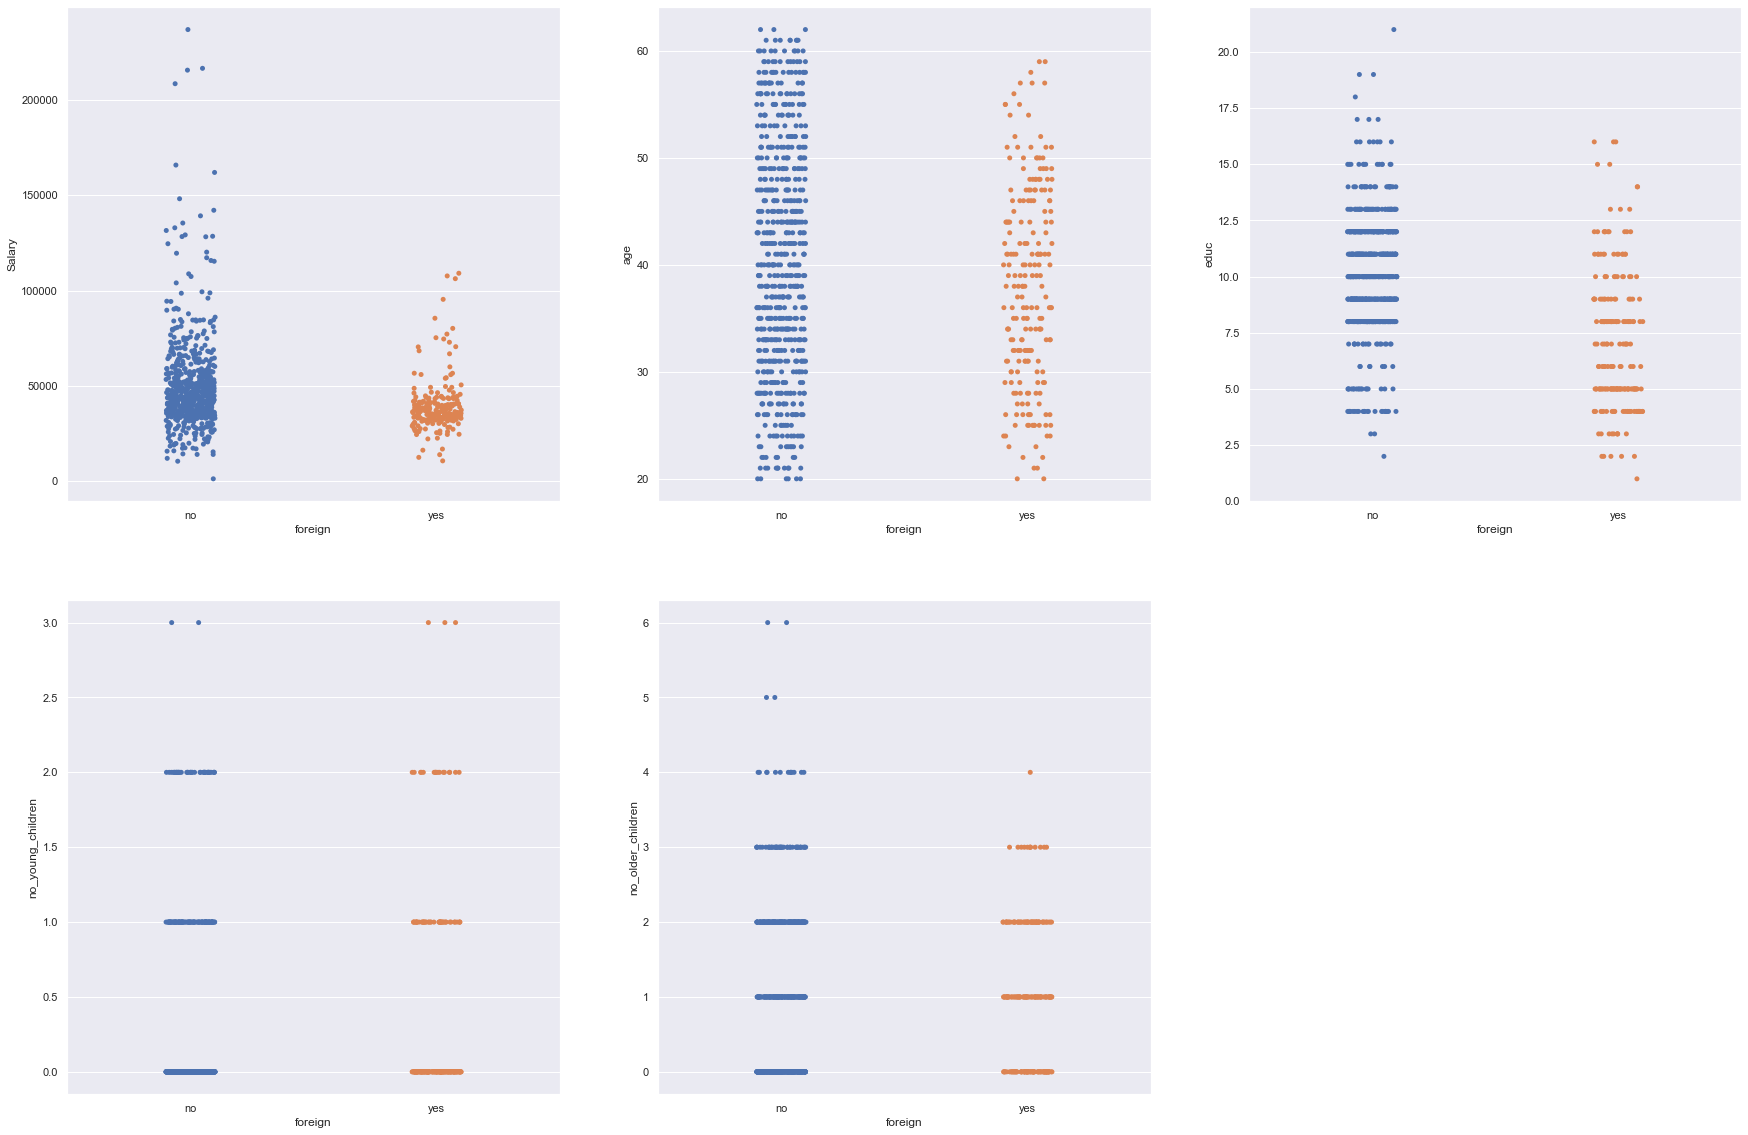

In [114]:
count = 1
plt.figure(figsize = (30,20))
for i in cont_vars:
    for j in ['foreign']:
        plt.subplot(2,3,count)
        sns.stripplot(x = j, y = i, data = holiday)
        count = count +1
printmd('**Stripplot of Salary, age, years of education and number of children below and above 7 years on an average for foreign and nono foreign employees:**')


## Inferences:
- The salaries of certain non foreign employees are much higher than foreigner employees. This may be because the top posts in the company are held by non foreign employees.
- The median value of non foreign employees is observed to be higher than foreign employees. 

**Perecntage wise tabulation of employees with number of children below 7 years as per foreign or non foreign employee :**

no_young_children      0      1      2     3
foreign                                     
no                 77.14  70.07  69.09  40.0
yes                22.86  29.93  30.91  60.0


**Countplot of no_young_children Variable according to foreign variable :**

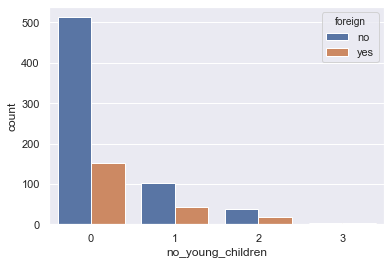

In [115]:
sns.countplot(holiday['no_young_children'], hue  = holiday['foreign'])
printmd('**Perecntage wise tabulation of employees with number of children below 7 years as per foreign or non foreign employee :**')
print(round(pd.crosstab(columns = holiday['no_young_children'], index  = holiday['foreign']).apply(lambda x: x*100/x.sum()),2))
printmd('**Countplot of no_young_children Variable according to foreign variable :**')

## Inferences:
- Since the percentage of non foreign and forein employees is already 76% and 24%, similar percentages is observed for employees with any number of children below 7 years of age, i.e. no special trend is observed. Although employees with 3 children below 7 years of age show a reversal of trend but there are only 5 such employees and hence not enough data points to predict trend.

**Perecntage wise tabulation of employees with number of children above 7 years as per foreign or non foreign employee :**

no_older_children      0      1      2      3      4      5      6
foreign                                                           
no                 80.41  64.14  73.56  78.18  92.86  100.0  100.0
yes                19.59  35.86  26.44  21.82   7.14    0.0    0.0


**Countplot of no_older_children Variable according to foreign variable :**

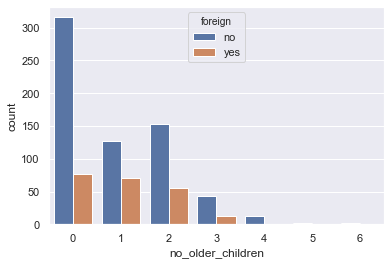

In [116]:
sns.countplot(holiday['no_older_children'], hue  = holiday['foreign'])
printmd('**Perecntage wise tabulation of employees with number of children above 7 years as per foreign or non foreign employee :**')
print(round(pd.crosstab(columns = holiday['no_older_children'], index  = holiday['foreign']).apply(lambda x: x*100/x.sum()),2))
printmd('**Countplot of no_older_children Variable according to foreign variable :**')

## Inferences:
- Since the percentage of non foreign and forein employees is already 76% and 24%, similar percentages is observed for employees with any number of children above 7 years of age, i.e. no special trend is observed. There are not enough number of data points with employees greater than or equal to 4 children above 7 years to predict any trend.

## Bivariate Analysis with the Target Variable: 
- The target variable is 'Holiday_Package'.

**Distribution of the numerical variables with respect to Holiday packages:**

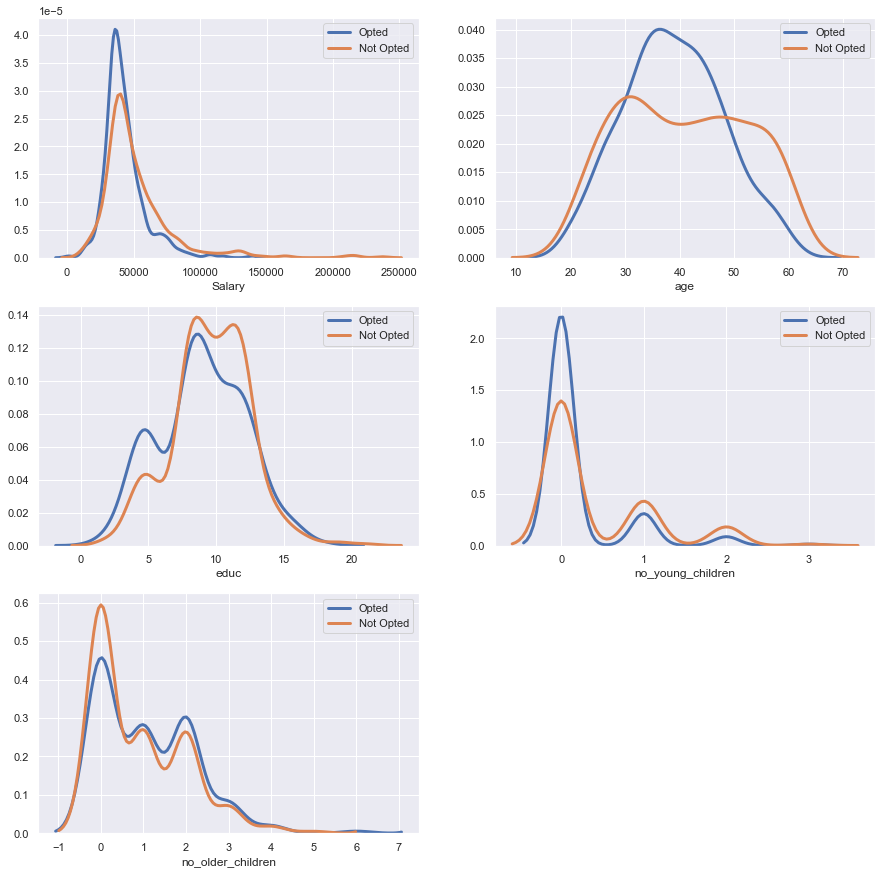

In [117]:
count = 1
plt.figure(figsize = (15,15))
for i in cont_vars:
    plt.subplot(3,2,count)
    if i == 'no_young_children':
        sns.distributions._has_statsmodels = False
        sns.distplot(holiday[holiday['Holiday_Package']== 'yes'][i], hist = False, kde = True,
                 kde_kws = {'linewidth': 3}, label = 'Opted')
        sns.distplot(holiday[holiday['Holiday_Package']== 'no'][i], hist = False, kde = True,
                 kde_kws = {'linewidth': 3}, label = 'Not Opted')
        sns.distributions._has_statsmodels = True
    else:
        sns.distplot(holiday[holiday['Holiday_Package']== 'yes'][i], hist = False, kde = True,
                 kde_kws = {'linewidth': 3}, label = 'Opted')
        sns.distplot(holiday[holiday['Holiday_Package']== 'no'][i], hist = False, kde = True,
                 kde_kws = {'linewidth': 3}, label = 'Not Opted')
    count = count +1
printmd('**Distribution of the numerical variables with respect to Holiday packages:**')

## Inferences:
- All the variables 'Salary', 'age', 'educ', 'no_young_children' and 'no_older_children' distributon patterns seem to overlap over target variable categories. Although the density differences in the distributions could be observed, thus indicating a different mean value for the employees who opt and didn't opt for the Holiday Package.

**Mean values of the different numerical variables for each category in target variable:**

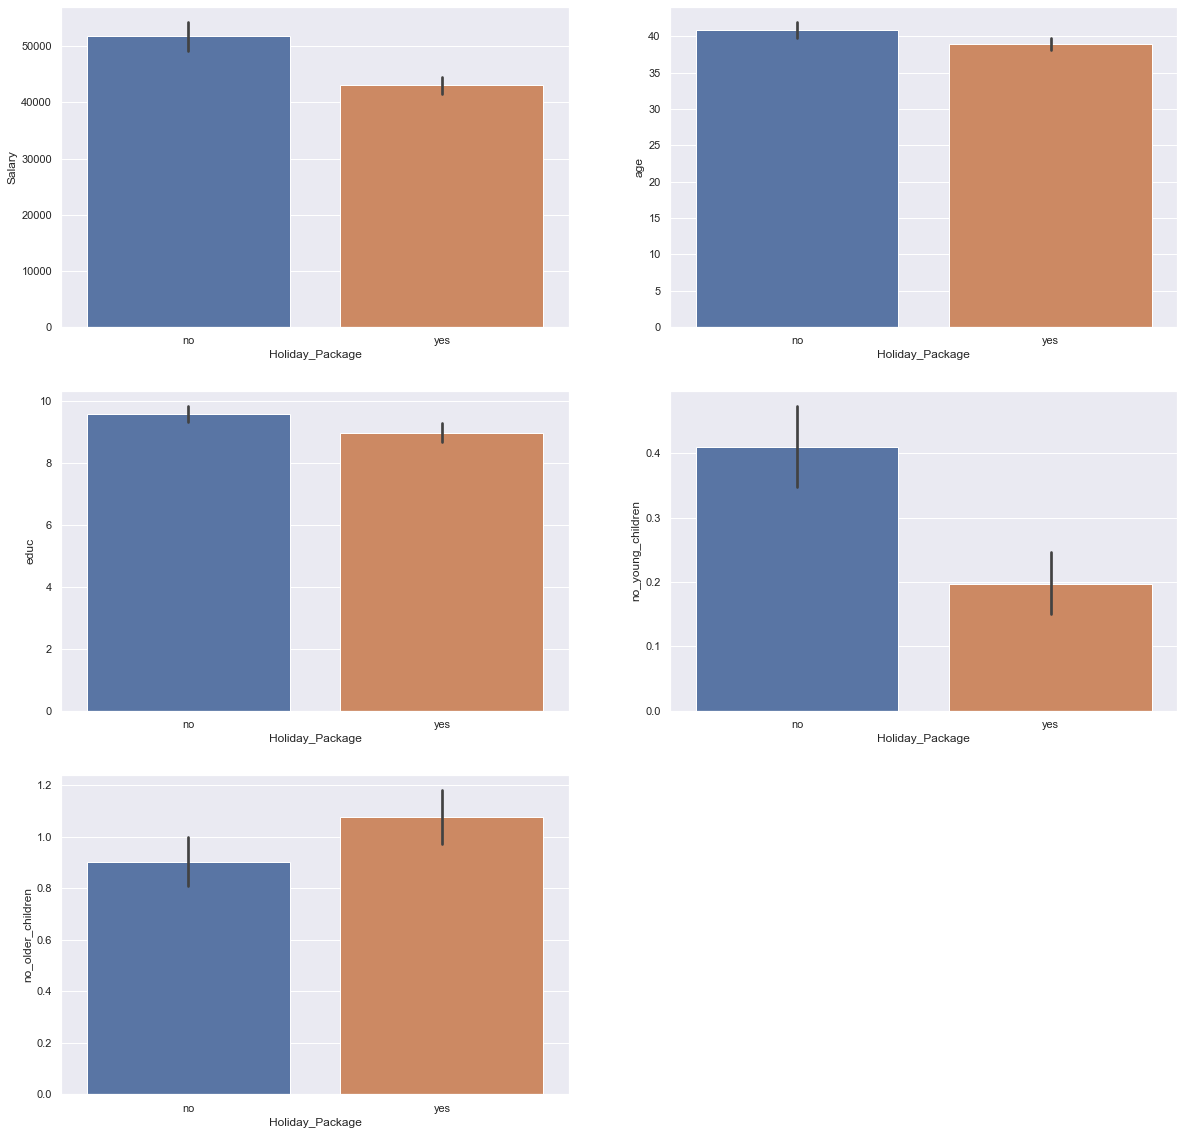

In [118]:
count = 1
plt.figure(figsize = (20,20))
for i in cont_vars:
    plt.subplot(3,2,count)
    sns.barplot(x = 'Holiday_Package', y = i, data = holiday)
    count = count +1
printmd('**Mean values of the different numerical variables for each category in target variable:**')

## Inferences:
- **The average salary of employees who opted for holiday package is less.**
- The average age and number of years of education of employees who opted for holiday package and who did't is nearly same.
- The employees who opted for the Holiday package on an average have more number of children above 7 years of age than employees who didn't opt.
- **The employees who opted for the Holiday package on an average have less number of children below 7 years of age than employees who didn't opt.**

**Perecentage wise tabulation of foreign employees as per status of holiday package :**

foreign             no    yes
Holiday_Package              
no               61.28  31.94
yes              38.72  68.06


**Countplot of foreign Variable according to Holiday Package status :**

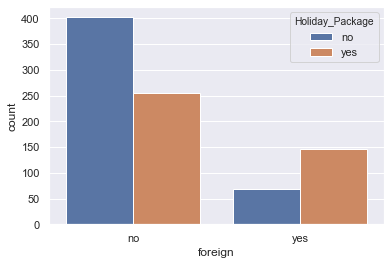

In [119]:
sns.countplot(holiday['foreign'], hue  = holiday['Holiday_Package'])
printmd('**Perecentage wise tabulation of foreign employees as per status of holiday package :**')
print(round(pd.crosstab(index = holiday['Holiday_Package'], columns = holiday['foreign']).apply(lambda x: x*100/x.sum()),2))
printmd('**Countplot of foreign Variable according to Holiday Package status :**')

## Inferences:
- **Among the employees who are not foreigners approximately only 38.7% opted for Holiday package whereas among the employees who are foreigners approximately 68.06% of the employees opted for Holiday package. Thus 'foreign' may be a good variable in predicting status of Holiday Package.**

**Perecentage wise tabulation of employees with number of children below 7 years as per status of holiday package :**

no_young_children      0      1      2     3
Holiday_Package                             
no                 49.02  68.03  76.36  60.0
yes                50.98  31.97  23.64  40.0


**Countplot of no_young_children Variable according to Holiday Package status :**

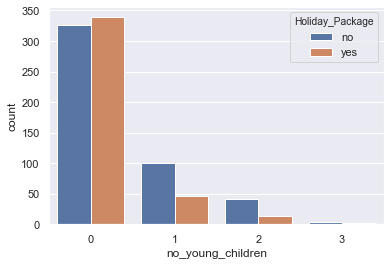

In [120]:
sns.countplot(holiday['no_young_children'], hue  = holiday['Holiday_Package'])
printmd('**Perecentage wise tabulation of employees with number of children below 7 years as per status of holiday package :**')
print(round(pd.crosstab(index = holiday['Holiday_Package'], columns = holiday['no_young_children']).apply(lambda x: x*100/x.sum()),2))
printmd('**Countplot of no_young_children Variable according to Holiday Package status :**')

## Inferences:
- Among employees who have no children below 7 years have nearly equal number of people opting for the Holiday package as the people who didn't opt for the Holiday package.
- **Employees who have 1 or 2 children below 7 years of age have much lesser percentage opting for holiday package.**

**Perecentage wise tabulation of employees with number of children above 7 years as per status of holiday package :**

no_older_children      0      1      2      3     4      5      6
Holiday_Package                                                  
no                 58.78  51.52  49.04  49.09  50.0  100.0    0.0
yes                41.22  48.48  50.96  50.91  50.0    0.0  100.0


**Countplot of no_older_children Variable according to Holiday Package status :**

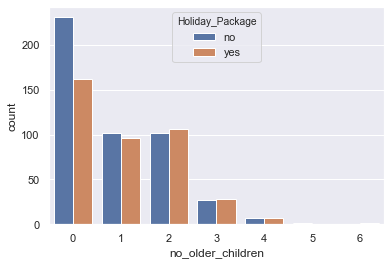

In [121]:
sns.countplot(holiday['no_older_children'], hue  = holiday['Holiday_Package'])
printmd('**Perecentage wise tabulation of employees with number of children above 7 years as per status of holiday package :**')
print(round(pd.crosstab(index = holiday['Holiday_Package'], columns = holiday['no_older_children']).apply(lambda x: x*100/x.sum()),2))
printmd('**Countplot of no_older_children Variable according to Holiday Package status :**')

## Inferences:
- Among employees who have 1, 2, or 3 children above 7 years have nearly equal number of people opting for the Holiday package as the people who didn't opt for the Holiday package.
- **Employees who have no children above 7 years of age have lesser percentage opting for holiday package.**
- The number of employees with 4, 5 or 6 children above 7 years is very less and hence no inferences are made from them.

## Multivariate Analysis with the Target Variable: 

**Average values among foreign and non foreign employees as per holiday package status:**

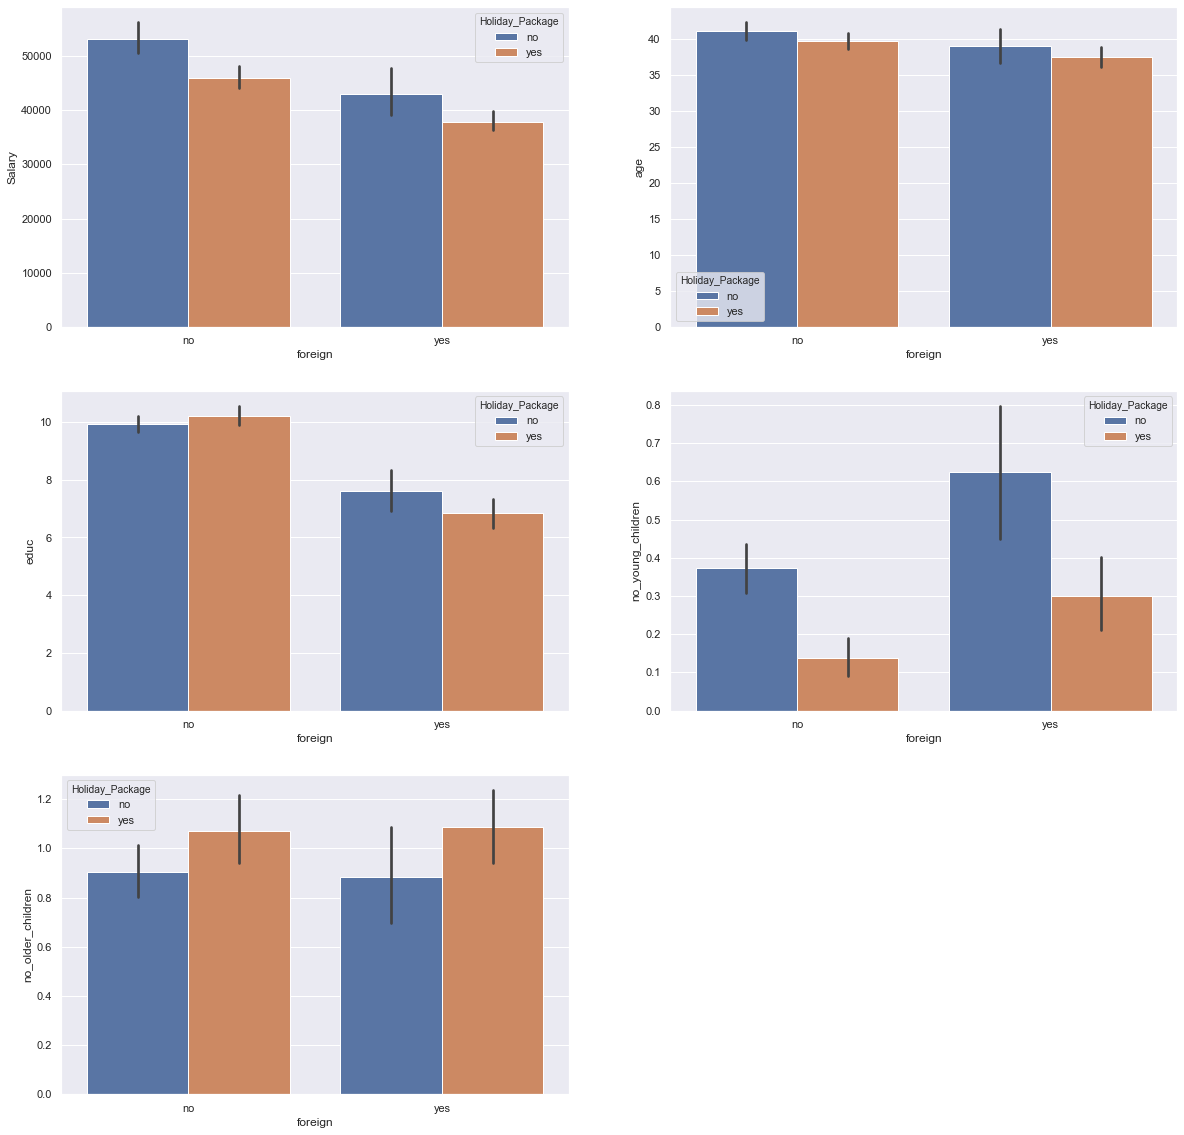

In [122]:
count = 1
plt.figure(figsize = (20,20))
for i in cont_vars:
    plt.subplot(3,2,count)
    sns.barplot(x = 'foreign', y = i, data = holiday, hue = 'Holiday_Package')
    count = count +1
printmd('**Average values among foreign and non foreign employees as per holiday package status:**')

## Inferences:
- Among both the non foreign and foreign employees the average salary for the people who didn't opt for the holiday package is higher.
- Among both the non foreign and foreign employees the average age for the people who didn't opt for the holiday package is a little higher.
- Among the non foreign employees the average number of years of education for the people who didn't opt for the holiday package is a little higher. Opposite trend is observed for foreign employees.
- Among non foreign employees who opted for holiday package have lesser number of children below 7 years on an average than the non foreign employees who didn't opt for holiday package. Similar trend could be observed for foreign employees.
- Among non foreign employees who opted for holiday package have more number of children above 7 years on an average than the non foreign employees who didn't opt for holiday package. Similar trend could be observed for foreign employees.

**Average values of Salary, age and number of years of education of employees with different number of children below 7 years as per holiday package status:**

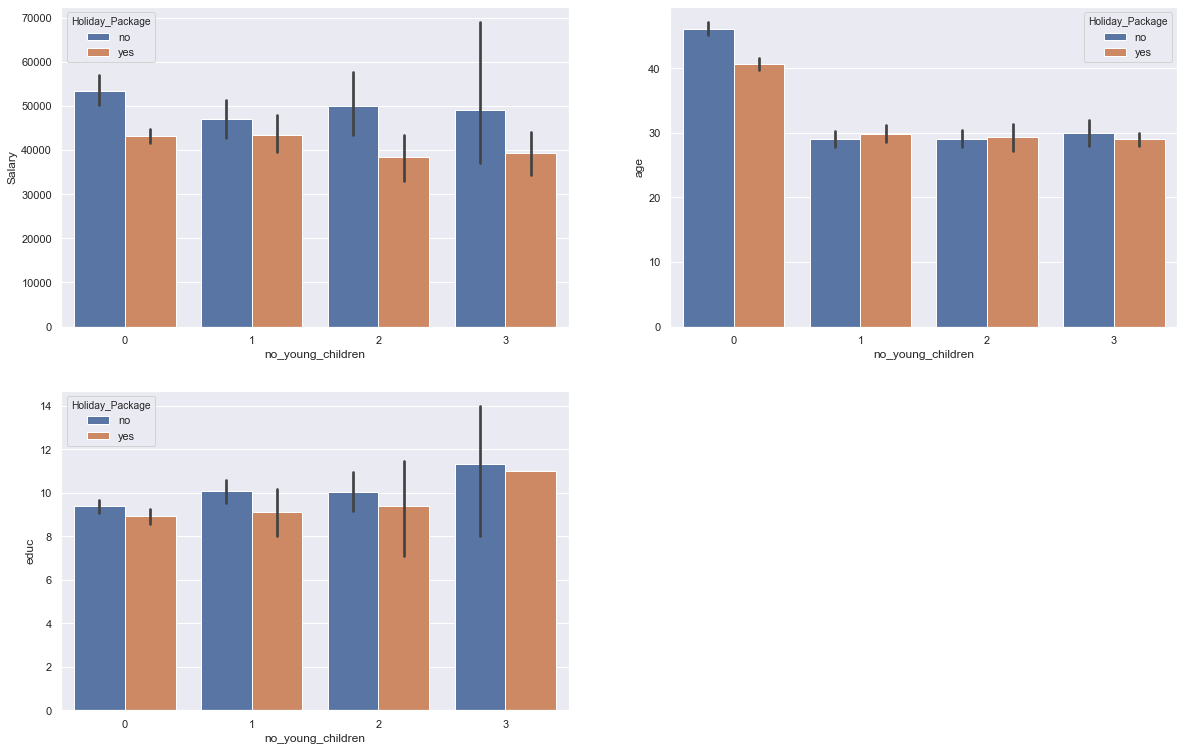

In [123]:
cont_vars_new = ['Salary', 'age', 'educ']
count = 1
plt.figure(figsize = (20,20))
for i in cont_vars_new:
    plt.subplot(3,2,count)
    sns.barplot(x = 'no_young_children', y = i, data = holiday, hue = 'Holiday_Package')
    count = count +1
printmd('**Average values of Salary, age and number of years of education of employees with different number of children below 7 years as per holiday package status:**')

In [124]:
printmd('**Average age of employees with children below 7 years as Holiday Package status:**')
holiday.groupby(['no_young_children', 'Holiday_Package'])['age'].mean()

**Average age of employees with children below 7 years as Holiday Package status:**

no_young_children  Holiday_Package
0                  no                 46.122699
                   yes                40.578171
1                  no                 28.980000
                   yes                29.872340
2                  no                 29.000000
                   yes                29.307692
3                  no                 30.000000
                   yes                29.000000
Name: age, dtype: float64

## Inferences:
- Similar trend for average salary and holiday package status is observed even when categorised by number of children below 7 years of age for the employees.
- **The average age of employees with no children below 7 years who have opted for the holiday package is around 5 years younger than employees who have not opted.**
- The average number of years of eduaction is nearly same.

**Average values of Salary, age and number of years of education of employees with different number of children above 7 years as per holiday package status:**

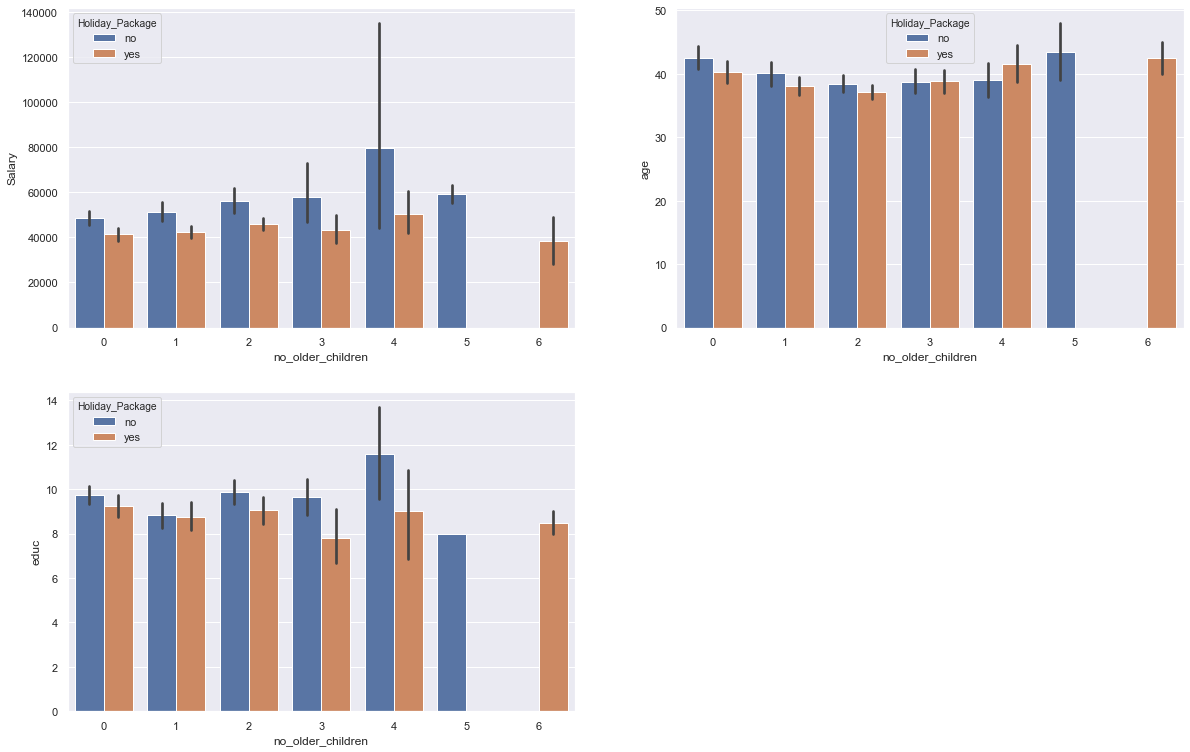

In [125]:
count = 1
plt.figure(figsize = (20,20))
for i in cont_vars_new:
    plt.subplot(3,2,count)
    sns.barplot(x = 'no_older_children', y = i, data = holiday, hue = 'Holiday_Package')
    count = count +1
printmd('**Average values of Salary, age and number of years of education of employees with different number of children above 7 years as per holiday package status:**')

## Inferences:
- The average salary, age and number of years of eductaion for employees with no children or any number children nearly follows the same trend of higher mean value for employees who have not opted for holiday package. 

# Final Inferences from EDA:
- The dataset is read, and the dataset is observed to be loaded properly. 
    - **Although it is observed that the serial number column is also loaded with 'Unnamed: 0' as the variable name. It is dropped.**
    - The holiday package column name is 'Holliday_Package', it is changed to 'Holiday_Package'.
- The Dataset has 872 rows and 7 columns of data. 
- **There are no Null values present in the dataset.**
- Out of the 7 columns: 5 are 'int64' and 2 are 'object' data type.
- There are no duplicate instances in the dataset.
- From data description of the numerical variables the following observations are made:
    - No out of context values are observed in any of the variables. 
    - 'Salary' has mean greater than median and is expected to be right skewed.
    - 'age', 'educ'and 'no_older_children' have nearly equal mean and median values and are not expected to be skewed.
    - 'no_young_children' has at least 75% of the instances 0 value, i.e. at least 75% of the instances are people with no children below 7 years.
- Since 'no_young_children' and 'no_older_children' has only 4 and 7 unique values, hence they are also analysed along with the categorical variables 'Holiday_Pacakage' and 'foreign'. The following observations are made:
    - No out of context categories are observed in 'Holiday_Package' and 'foreign'.
    - The number of foreigner employees is much less than non foreign employees.
    - The number of employees with 4 or more number of children above 7 years is very less.
    - Most of the employees have no children below 7 years.
- **Univariate Analysis:** Some important insights are mentioned below:
    - **'Salary' :** It is right skewed with a thin long right tail, a skewness of 3.1 is observed. As observed using Boxplot which employs IQR method, many outliers on the upper side.
    - **'age' :** 'age' variable looks symmetrical with most of the people between 30 to 50 years. Skewness is near to 0 and there are no outliers present as measured by IQR method.
    - **'educ' :** It looks bi modal. Skewness is nearly 0. But there are a few outliers as measured by IQR method.
    - **'no_young_children' :** It is observed that most of the people (around 76%) have no children younger than 7 years old. Around 17% have one child below 7 years and around 7% people have more than 1 child less than 7 years age. Since most of the employees (around 76%) have no children below 7 years hence in Boxplot of 'no_young_children' except for 0 value all other values are shown as outliers.
    - **'no_older_children' :** It is observed that around 45% of the people don't have children older than 7 years old. Only around 8% of the people have more than two children of age older than 7 years.
    - **'foreign' :** It is observed that approximately 75.23% of the employees are not foreigners and 24.77% are foreigners.
    - **'Holiday_Package :** The dependent variable has approximately 54% as people who didn't opted for holiday package and 46% of the people opted for the holiday package. Thus the dataset is nearly balanced, imbalance effect in classification model is not expected.
- **Bivariate/Multivariate Analysis between the Independent Variables:** Some important insights are mentioned below:
    - From scatterplot and pearson correlation coefficient values it is observed that the maximum correlation is observed between 'age' and 'no_young_children'. It is a negative correlation of -0.52. It can also be observed that 'Salary' does not have high positive correlation with 'educ' or 'age'.
    - It is observed that the average age for employees who have no children below 7 years of age is considerably higher than employees who have children below 7 years.
    - It is observed that Average 'Salary' is much higher for employees who are not foreigners than employees who are foreigners. The salaries of certain non foreign employees are much higher than foreigner employees. This may be because the top posts in the company are held by non foreign employees.
    - The number of years of education of employees who are not foreigners are on an average 3 years more than employees who are foreigners. Also the median value of non foreign employees is observed to be higher than foreign employees.

- **The important insights from the Bivariate/Multivariate analysis with the Target variable 'Holiday_Package' are given in Answer 4.**

# Data Preprocessing:

In [126]:
# A copy is made before removing outliers or scaling.
holiday_copy = holiday.copy()

## Note:
- Scaling is not done as instructed in the project.

## Outliers:
- Outliers affect both Logistic Regression and LDA and hence they must be taken care before modelling.
- Here IQR method is used to detect the outliers in the indpendent variables and replaced them by the respective whiskers.
- **Since as observed before the number unique values in 'no__older_children' and 'no_young_children' is only 7 and 4 respectively hence they are not included in outlier analysis, although they may be separately grouped together on the basis of count of each values for better analysis.** 

## Outlier Check with IQR method:

In [127]:
Lower_outlier = []
Upper_outlier = []
for i in range(0,3):
    Q1 = holiday[cont_vars_new[i]].quantile(0.25)
    Q3 = holiday[cont_vars_new[i]].quantile(0.75)
    IQR = Q3 - Q1
    Lower_outlier.append(holiday[holiday[cont_vars_new[i]] < (Q1 - 1.5*IQR)].count()[0])
    Upper_outlier.append(holiday[holiday[cont_vars_new[i]] > (Q3 + 1.5*IQR)].count()[0])

outliers = pd.DataFrame(data = Lower_outlier, columns =['Lower Outliers Count'], index = cont_vars_new)
outliers['Lower Outliers Percentage'] =  round(outliers['Lower Outliers Count'].apply(lambda x: x*100/len(holiday)),2)
outliers['Upper Outliers Count'] = Upper_outlier
outliers['Upper outliers Percentage'] = round(outliers['Upper Outliers Count'].apply(lambda x: x*100/len(holiday)),2)
outliers['Total Outliers Count'] = outliers['Lower Outliers Count'] + outliers['Upper Outliers Count']
outliers['Total Outliers Percentage'] = round(outliers['Total Outliers Count'].apply(lambda x: x*100/len(holiday)),2)
printmd('**The outlier counts and percentage values in each variable :**')
outliers

**The outlier counts and percentage values in each variable :**

,Lower Outliers Count,Lower Outliers Percentage,Upper Outliers Count,Upper outliers Percentage,Total Outliers Count,Total Outliers Percentage
Salary,1,0.11,56,6.42,57,6.54
age,0,0.00,0,0.00,0,0.00
educ,1,0.11,3,0.34,4,0.46


## Inference:
- According to IQR method, there are outliers present in 'Salary' and a few in 'educ'.

## Oulier Correction:

In [128]:
holiday_no_outlier = holiday[cont_vars_new].copy()
# Setting the Quantiles
Q1 = holiday_no_outlier.quantile(0.25)
Q3 = holiday_no_outlier.quantile(0.75)
IQR = Q3 - Q1



# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(holiday_no_outlier[cont_vars_new] < Q1 - 1.5 * IQR)[0], 
                np.where(holiday_no_outlier[cont_vars_new] < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    holiday_no_outlier.iloc[i,j] = whisker[j]
    
    
# Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(holiday_no_outlier[cont_vars_new] > Q3 + 1.5 * IQR)[0], 
                np.where(holiday_no_outlier[cont_vars_new] > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    holiday_no_outlier.iloc[i,j] = whisker[j]

In [129]:
Lower_outlier = []
Upper_outlier = []
for i in cont_vars_new:
    Q1 = holiday_no_outlier[i].quantile(0.25)
    Q3 = holiday_no_outlier[i].quantile(0.75)
    IQR = Q3 - Q1
    Lower_outlier.append(holiday_no_outlier[holiday_no_outlier[i] < (Q1 - 1.5*IQR)].count()[0])
    Upper_outlier.append(holiday_no_outlier[holiday_no_outlier[i] > (Q3 + 1.5*IQR)].count()[0])

outliers = pd.DataFrame(data = Lower_outlier, columns =['Lower Outliers Count'], index = cont_vars_new)
outliers['Upper Outliers Count'] = Upper_outlier
outliers['Total Outliers Count'] = outliers['Lower Outliers Count'] + outliers['Upper Outliers Count']
printmd('**The outlier counts in each variable after removal of outliers :**')
outliers

**The outlier counts in each variable after removal of outliers :**

,Lower Outliers Count,Upper Outliers Count,Total Outliers Count
Salary,0,0,0
age,0,0,0
educ,0,0,0


In [130]:
for i in cont_vars_new:
    holiday[i] = holiday_no_outlier[i]

## Inference:
- **The outliers are capped by the appropriate whisker values of the corresponding variables. There are no more outliers as measured by IQR method.**

## Conversion of 'object' data type variables:
- It is a prerequisite for Modelling that the object data type variables are converted to numerical data type.
- We will do Label Encoding here. **Since the label encoding is done by default in alphabatical order, for both 'Holiday_Package' and  'foreign' variables: 'no' will be coded as 0 and 'yes' will be coded as 1.**

In [131]:
for i in holiday.columns:
    if holiday[i].dtype == 'O':
        holiday[i] = pd.Categorical(holiday[i]).codes
printmd('**The data types of the dataset after conversion of Object data types:**')
holiday.dtypes

**The data types of the dataset after conversion of Object data types:**

Holiday_Package         int8
Salary               float64
age                    int64
educ                 float64
no_young_children      int64
no_older_children      int64
foreign                 int8
dtype: object

In [132]:
printmd('**Information of the Dataset after datatype conversion:**')
holiday.info()

**Information of the Dataset after datatype conversion:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
Holiday_Package      872 non-null int8
Salary               872 non-null float64
age                  872 non-null int64
educ                 872 non-null float64
no_young_children    872 non-null int64
no_older_children    872 non-null int64
foreign              872 non-null int8
dtypes: float64(2), int64(3), int8(2)
memory usage: 35.9 KB


## Inferences:
- The object data types are converted to numerical. Now the data types of all the variables are in acceptable format for Modeling.

## Train and Test Split:

In [133]:
y = holiday['Holiday_Package']
X = holiday.drop('Holiday_Package', axis=1)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1) 

In [135]:
print('Number of instances in Training set :', len(X_train))
print('Percentage of instances that didn\'t opt for Holiday Package in training set', round(y_train.value_counts('Normalize').iloc[0]*100,2))
print('Percentage of instances that opted for Holiday Package in training set', round(y_train.value_counts('Normalize').iloc[1]*100,2))

Number of instances in Training set : 610
Percentage of instances that didn't opt for Holiday Package in training set 53.44
Percentage of instances that opted for Holiday Package in training set 46.56


In [136]:
print('Number of instances in Testing set :', len(X_test))
print('Percentage of instances that didn\'t opt for Holiday Package in testg set', round(y_test.value_counts('Normalize').iloc[0]*100,2))
print('Percentage of instances that opted for Holiday Package in testing set', round(y_test.value_counts('Normalize').iloc[1]*100,2))

Number of instances in Testing set : 262
Percentage of instances that didn't opt for Holiday Package in testg set 55.34
Percentage of instances that opted for Holiday Package in testing set 44.66


## Inferences:
- The number of instances in Training set is 610 out of which 53.44% are instances who didn't opt for Holiday Package and 46.56% are instances that opted for Holiday Package.
- The number of instances in Testing set is 262 out of which 55.34% are instances who didn't opt for Holiday Package and 44.66% are instances that opted for Holiday Package.

## Grid Search used for hyperparameters Tuning:

## Note:
- **Certain parameters only work with a particular combination of hyperparameters. Hence if all combinations are used in a single Grid Search then it does not fit the grid search parameter. So separate Grid Search combinations are run. And finally based on evaluation parameters a particular combination is choosen.**
- **In the given case study we want to predict both the employees who will opt for the Holiday package and employees who won't accurately such that customized packages can be prepared for the employees. Thus type I error and type II error are both equally important for us. Hence 'f1 score' is maximized in Grid Search.**

## Logistic Regression:

In [137]:
Log_Reg = LogisticRegression(random_state = 1) 

## Logistic Regression Grid Search:
**The restrictions are mainly in 'solver' and 'penalty' used, hence for these different combinations are tried and for the other hyperparameters a particular set of values are used for grid search.**
- The 'newton-cg', 'sag', and 'lbfgs' solvers support only L2 regularization with primal formulation, or no regularization.
- The Elastic-Net regularization is only supported by the 'saga' solver.
- 'none', i.e. no regularization is applied is not supported by the liblinear solver.

## Hyperparameters Tuned:
- **'solver', 'penalty', 'max_iter', 'tol', 'C', 'class_weight'.**

## Combination 1:
- penalty: 'l2'
- solver: 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'

In [138]:
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l2'],
    'max_iter': [ 1000, 5000, 10000 ], 
    'tol': [0.00001, 0.0001, 0.001, 0.01, 0.1],
     'C': [0.001,.009,0.01,.09,1,5,10,25],
     'class_weight': [{1: 0.5, 0: 0.5},{1:0.55, 0:0.45}]
    }

In [139]:
grid_search_Log = GridSearchCV(estimator = Log_Reg, param_grid = param_grid, cv = 10, scoring = 'f1')

In [140]:
grid_search_Log.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=1, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.45, 1: 0.55}],
                         'max_iter': [1000, 5000, 10000], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    '

## Note on LineSearchWarning (Convergence):
- Although 'max_iter' has been tried out upto 100000, still LineSearchWarning is shown.
- It may be because the features are not scaled and there are features like Salary which have very high magnitude compared to others.

In [141]:
printmd('**The best hyperparameters for Logistic Regression model among the provided input after tuning using Grid Search :**')
grid_search_Log.best_params_

**The best hyperparameters for Logistic Regression model among the provided input after tuning using Grid Search :**

{'C': 25,
 'class_weight': {1: 0.55, 0: 0.45},
 'max_iter': 1000,
 'penalty': 'l2',
 'solver': 'liblinear',
 'tol': 0.0001}

In [142]:
model_Log_Reg_1 = grid_search_Log.best_estimator_

## Evaluation Parameters:

In [143]:
ytrain_predict_Log = model_Log_Reg_1.predict(X_train)
ytest_predict_Log = model_Log_Reg_1.predict(X_test)

# TRAIN
printmd('**Evaluation Parameters for Logistic Regression Combination 1:**')
                                            
print('''
---------------------------------------------------TRAIN-------------------------------------------------------
''')
printmd('**Classification Report Training Data:**')
print(classification_report(y_train, ytrain_predict_Log))
# Train AUC Score
probs = model_Log_Reg_1.predict_proba(X_train)
ytrain_predict_prob_Log = probs[:, 1]
auc = roc_auc_score(y_train, ytrain_predict_prob_Log)
print('AUC Score Training Data: %.3f' % auc)


# TEST

print('''
---------------------------------------------------TEST-------------------------------------------------------
''')
printmd('**Classification Report Testing Data:**')
print(classification_report(y_test, ytest_predict_Log))
# AUC Score
probs = model_Log_Reg_1.predict_proba(X_test)
ytest_predict_prob_Log = probs[:, 1]
auc = roc_auc_score(y_test, ytest_predict_prob_Log)
print('AUC Score Testing Data: %.3f' % auc)

**Evaluation Parameters for Logistic Regression Combination 1:**


---------------------------------------------------TRAIN-------------------------------------------------------



**Classification Report Training Data:**

              precision    recall  f1-score   support

           0       0.70      0.72      0.71       326
           1       0.67      0.64      0.65       284

    accuracy                           0.69       610
   macro avg       0.68      0.68      0.68       610
weighted avg       0.68      0.69      0.68       610

AUC Score Training Data: 0.742

---------------------------------------------------TEST-------------------------------------------------------



**Classification Report Testing Data:**

              precision    recall  f1-score   support

           0       0.69      0.67      0.68       145
           1       0.60      0.62      0.61       117

    accuracy                           0.65       262
   macro avg       0.65      0.65      0.65       262
weighted avg       0.65      0.65      0.65       262

AUC Score Testing Data: 0.698


## Combination 2:
- penalty: 'l1'
- solver: 'liblinear', 'saga'

In [144]:
param_grid = {
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1'],
    'max_iter': [ 1000, 5000, 10000 ], 
    'tol': [0.00001, 0.0001, 0.001, 0.01, 0.1],
    'C': [0.001,.009,0.01,.09,1,5,10,25],
    'class_weight': [{1: 0.5, 0: 0.5},{1:0.55, 0:0.45}]
    }

In [145]:
grid_search_Log = GridSearchCV(estimator = Log_Reg, param_grid = param_grid, cv = 10, scoring = 'f1')

In [146]:
grid_search_Log.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=1, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.45, 1: 0.55}],
                         'max_iter': [1000, 5000, 10000], 'penalty': ['l1'],
                         'solver': ['liblinear', 'saga'],
                         'tol': [1e-05, 0.0001, 0.001, 0.

## Note on UndefinedMetricWarning:
- This is because the F score value comes to be undefined when both Recall and Precision are 0 for a particular class.

In [147]:
printmd('**The best hyperparameters for Logistic Regression model among the provided input after tuning using Grid Search :**')
grid_search_Log.best_params_

**The best hyperparameters for Logistic Regression model among the provided input after tuning using Grid Search :**

{'C': 5,
 'class_weight': {1: 0.55, 0: 0.45},
 'max_iter': 1000,
 'penalty': 'l1',
 'solver': 'liblinear',
 'tol': 0.0001}

In [148]:
model_Log_Reg_2 = grid_search_Log.best_estimator_

## Evaluation Parameters:

In [149]:
ytrain_predict_Log = model_Log_Reg_2.predict(X_train)
ytest_predict_Log = model_Log_Reg_2.predict(X_test)

# TRAIN
printmd('**Evaluation Parameters for Logistic Regression Combination 2:**')
                                            
print('''
---------------------------------------------------TRAIN-------------------------------------------------------
''')
printmd('**Classification Report Training Data:**')
print(classification_report(y_train, ytrain_predict_Log))
# Train AUC Score
probs = model_Log_Reg_2.predict_proba(X_train)
ytrain_predict_prob_Log = probs[:, 1]
auc = roc_auc_score(y_train, ytrain_predict_prob_Log)
print('AUC Score Training Data: %.3f' % auc)


# TEST

print('''
---------------------------------------------------TEST-------------------------------------------------------
''')
printmd('**Classification Report Testing Data:**')
print(classification_report(y_test, ytest_predict_Log))
# AUC Score
probs = model_Log_Reg_2.predict_proba(X_test)
ytest_predict_prob_Log = probs[:, 1]
auc = roc_auc_score(y_test, ytest_predict_prob_Log)
print('AUC Score Testing Data: %.3f' % auc)

**Evaluation Parameters for Logistic Regression Combination 2:**


---------------------------------------------------TRAIN-------------------------------------------------------



**Classification Report Training Data:**

              precision    recall  f1-score   support

           0       0.70      0.72      0.71       326
           1       0.67      0.64      0.65       284

    accuracy                           0.68       610
   macro avg       0.68      0.68      0.68       610
weighted avg       0.68      0.68      0.68       610

AUC Score Training Data: 0.742

---------------------------------------------------TEST-------------------------------------------------------



**Classification Report Testing Data:**

              precision    recall  f1-score   support

           0       0.72      0.67      0.69       145
           1       0.62      0.68      0.65       117

    accuracy                           0.67       262
   macro avg       0.67      0.67      0.67       262
weighted avg       0.68      0.67      0.67       262

AUC Score Testing Data: 0.703


## Combination 3:
- penalty: 'elasticnet'
- solver: 'saga'

In [150]:
param_grid = {
    'solver': ['saga'],
    'penalty': ['elasticnet'],
    'max_iter': [ 1000, 5000, 10000 ], 
    'tol': [0.00001, 0.0001, 0.001, 0.01, 0.1],
    'C':[0.001,.009,0.01,.09,1,5,10,25],
    'l1_ratio': [0.1, 0.3, 0.5, 0.9],
    'class_weight': [{1: 0.5, 0: 0.5},{1:0.55, 0:0.45}]
    }

In [151]:
grid_search_Log = GridSearchCV(estimator = Log_Reg, param_grid = param_grid, cv = 10, scoring = 'f1')

In [152]:
grid_search_Log.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=1, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.45, 1: 0.55}],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.9],
                         'max_iter': [1000, 5000, 10000],
                         'penalty': ['elasticnet'], 'solver': ['saga'],
   

In [153]:
printmd('**The best hyperparameters for Logistic Regression model among the provided input after tuning using Grid Search :**')
grid_search_Log.best_params_

**The best hyperparameters for Logistic Regression model among the provided input after tuning using Grid Search :**

{'C': 1,
 'class_weight': {1: 0.55, 0: 0.45},
 'l1_ratio': 0.1,
 'max_iter': 10000,
 'penalty': 'elasticnet',
 'solver': 'saga',
 'tol': 0.0001}

In [154]:
model_Log_Reg_3 = grid_search_Log.best_estimator_

## Evaluation Parameters:

In [155]:
ytrain_predict_Log = model_Log_Reg_3.predict(X_train)
ytest_predict_Log = model_Log_Reg_3.predict(X_test)

# TRAIN
printmd('**Evaluation Parameters for Logistic Regression Combination 3:**')
                                            
print('''
---------------------------------------------------TRAIN-------------------------------------------------------
''')
printmd('**Classification Report Training Data:**')
print(classification_report(y_train, ytrain_predict_Log))
# Train AUC Score
probs = model_Log_Reg_3.predict_proba(X_train)
ytrain_predict_prob_Log = probs[:, 1]
auc = roc_auc_score(y_train, ytrain_predict_prob_Log)
print('AUC Score Training Data: %.3f' % auc)


# TEST

print('''
---------------------------------------------------TEST-------------------------------------------------------
''')
printmd('**Classification Report Testing Data:**')
print(classification_report(y_test, ytest_predict_Log))
# AUC Score
probs = model_Log_Reg_3.predict_proba(X_test)
ytest_predict_prob_Log = probs[:, 1]
auc = roc_auc_score(y_test, ytest_predict_prob_Log)
print('AUC Score Testing Data: %.3f' % auc)

**Evaluation Parameters for Logistic Regression Combination 3:**


---------------------------------------------------TRAIN-------------------------------------------------------



**Classification Report Training Data:**

              precision    recall  f1-score   support

           0       0.53      0.97      0.69       326
           1       0.44      0.02      0.05       284

    accuracy                           0.53       610
   macro avg       0.49      0.50      0.37       610
weighted avg       0.49      0.53      0.39       610

AUC Score Training Data: 0.575

---------------------------------------------------TEST-------------------------------------------------------



**Classification Report Testing Data:**

              precision    recall  f1-score   support

           0       0.55      0.99      0.71       145
           1       0.00      0.00      0.00       117

    accuracy                           0.55       262
   macro avg       0.28      0.49      0.35       262
weighted avg       0.30      0.55      0.39       262

AUC Score Testing Data: 0.628


## Combination 4:
- penalty: 'none'
- solver: 'newton-cg', 'lbfgs', 'sag', 'saga'

In [156]:
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'penalty': ['none'],
    'max_iter': [ 1000, 5000, 10000 ], 
    'tol': [0.00001, 0.0001, 0.001, 0.01, 0.1],
    'class_weight': [{1: 0.5, 0: 0.5},{1:0.55, 0:0.45}]
    }

In [157]:
grid_search_Log = GridSearchCV(estimator = Log_Reg, param_grid = param_grid, cv = 10, scoring = 'f1')

In [158]:
grid_search_Log.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=1, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.45, 1: 0.55}],
                         'max_iter': [1000, 5000, 10000], 'penalty': ['none'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
                         'tol': [1e-05, 0.0001, 0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit

In [159]:
printmd('**The best hyperparameters for Logistic Regression model among the provided input after tuning using Grid Search :**')
grid_search_Log.best_params_

**The best hyperparameters for Logistic Regression model among the provided input after tuning using Grid Search :**

{'class_weight': {1: 0.55, 0: 0.45},
 'max_iter': 1000,
 'penalty': 'none',
 'solver': 'newton-cg',
 'tol': 0.1}

In [160]:
model_Log_Reg_4 = grid_search_Log.best_estimator_

## Evaluation Parameters:

In [161]:
ytrain_predict_Log = model_Log_Reg_4.predict(X_train)
ytest_predict_Log = model_Log_Reg_4.predict(X_test)

# TRAIN
printmd('**Evaluation Parameters for Logistic Regression Combination 4:**')
                                            
print('''
---------------------------------------------------TRAIN-------------------------------------------------------
''')
printmd('**Classification Report Training Data:**')
print(classification_report(y_train, ytrain_predict_Log))
# Train AUC Score
probs = model_Log_Reg_4.predict_proba(X_train)
ytrain_predict_prob_Log = probs[:, 1]
auc = roc_auc_score(y_train, ytrain_predict_prob_Log)
print('AUC Score Training Data: %.3f' % auc)


# TEST

print('''
---------------------------------------------------TEST-------------------------------------------------------
''')
printmd('**Classification Report Testing Data:**')
print(classification_report(y_test, ytest_predict_Log))
# AUC Score
probs = model_Log_Reg_4.predict_proba(X_test)
ytest_predict_prob_Log = probs[:, 1]
auc = roc_auc_score(y_test, ytest_predict_prob_Log)
print('AUC Score Testing Data: %.3f' % auc)

**Evaluation Parameters for Logistic Regression Combination 4:**


---------------------------------------------------TRAIN-------------------------------------------------------



**Classification Report Training Data:**

              precision    recall  f1-score   support

           0       0.70      0.71      0.71       326
           1       0.66      0.65      0.66       284

    accuracy                           0.68       610
   macro avg       0.68      0.68      0.68       610
weighted avg       0.68      0.68      0.68       610

AUC Score Training Data: 0.742

---------------------------------------------------TEST-------------------------------------------------------



**Classification Report Testing Data:**

              precision    recall  f1-score   support

           0       0.72      0.66      0.69       145
           1       0.62      0.68      0.64       117

    accuracy                           0.67       262
   macro avg       0.67      0.67      0.67       262
weighted avg       0.67      0.67      0.67       262

AUC Score Testing Data: 0.704


## Evaluation Parameter comparison for different combinations:

## Logistic Regression:

**The results for different combinations are as follows (note that Holiday Package as 'yes' or coded as 1 is treated as the positive class here):**
1. Combination 1: Best parameters are: **'C': 25, 'class_weight': {1: 0.55, 0: 0.45},  'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001**. The Evaluation Parameters are as follows :
    - For Training Set:
        - 'Precision': 0.67
        - 'Recall': 0.64
        - 'f1': 0.65
        - 'Accuracy': 0.69
        - 'AUC' Score : 0.742
    - For Testing Set: 
        - 'Precision': 0.60
        - 'Recall': 0.62
        - 'f1': 0.61
        - 'Accuracy': 0.65
        - 'AUC' Score : 0.698
2. Combination 2: Best parameters are: **'C': 5, 'class_weight': {1: 0.55, 0: 0.45}, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001**. The Evaluation Parameters are as follows: 
    - For Training Set:
        - 'Precision': 0.67
        - 'Recall': 0.64
        - 'f1': 0.65
        - 'Accuracy': 0.68
        - 'AUC' Score : 0.742
    - For Testing Set: 
        - 'Precision': 0.62
        - 'Recall': 0.68
        - 'f1': 0.65
        - 'Accuracy': 0.67
        - 'AUC' Score : 0.703

3. Combination 3: Best parameters are: **'C': 1, 'class_weight': {1: 0.55, 0: 0.45}, 'l1_ratio': 0.1, 'max_iter': 10000, 'penalty': 'elasticnet', 'solver': 'saga', 'tol': 0.0001**. The Evaluation Parameters are as follows: 
    - For Training Set:
        - 'Precision': 0.44
        - 'Recall': 0.02
        - 'f1': 0.05
        - 'Accuracy': 0.53
        - 'AUC' Score : 0.575
    - For Testing Set: 
        - 'Precision': 0
        - 'Recall': 0
        - 'f1': 0
        - 'Accuracy': 0.55
        - 'AUC' Score : 0.628
        
4. Combination 4: Best parameters are: **'class_weight': {1: 0.55, 0: 0.45}, 'max_iter': 1000, 'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.1**. The Evaluation Parameters are as follows: 
    - For Training Set:
        - 'Precision': 0.66
        - 'Recall': 0.65
        - 'f1': 0.66
        - 'Accuracy': 0.68
        - 'AUC' Score : 0.742
    - For Testing Set: 
        - 'Precision': 0.62
        - 'Recall': 0.68
        - 'f1': 0.64
        - 'Accuracy': 0.67
        - 'AUC' Score : 0.704

## Inferences and Final Model:
- Combination 2 and 4 are giving better results on Training and testing set than Combination 1 and 3.
- Both combination 2 and 4 are giving nearly same results, any one can be selected as final model. **Combination 4 best parameters model is chosen as the Final Logistic Regression Model.**

In [162]:
model_Log_Reg = model_Log_Reg_4

## LDA:

In [163]:
LDA = LinearDiscriminantAnalysis()

## LDA Grid Search:
- 'shrinkage' is applied only for solver: 'lsqr' and 'eigen'.

## Hyperparameters Tuned:
- 'solver', 'shrinkage' and 'tol'

## Combination 1:

In [164]:
param_grid = {'solver': ['svd', 'lsqr', 'eigen'], 'tol': [0.1, 0.001, 0.0001, 0.00001]}

In [165]:
grid_search_LDA = GridSearchCV(estimator = LDA, param_grid = param_grid, cv = 10, scoring = 'f1')

In [166]:
grid_search_LDA.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LinearDiscriminantAnalysis(n_components=None,
                                                  priors=None, shrinkage=None,
                                                  solver='svd',
                                                  store_covariance=False,
                                                  tol=0.0001),
             iid='warn', n_jobs=None,
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.1, 0.001, 0.0001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [167]:
printmd('**The best hyperparameters for LDA  model among the provided input after tuning using Grid Search :**')
grid_search_LDA.best_params_

**The best hyperparameters for LDA  model among the provided input after tuning using Grid Search :**

{'solver': 'svd', 'tol': 0.1}

In [168]:
model_LDA_1 = grid_search_LDA.best_estimator_

## Evaluation Parameters:

In [169]:
ytrain_predict_LDA = model_LDA_1.predict(X_train)
ytest_predict_LDA = model_LDA_1.predict(X_test)

# TRAIN
printmd('**Evaluation Parameters for LDA Combination 1:**')
                                            
print('''
---------------------------------------------------TRAIN-------------------------------------------------------
''')
printmd('**Classification Report Training Data:**')
print(classification_report(y_train, ytrain_predict_LDA))
# Train AUC Score
probs = model_LDA_1.predict_proba(X_train)
ytrain_predict_prob_LDA = probs[:, 1]
auc = roc_auc_score(y_train, ytrain_predict_prob_LDA)
print('AUC Score Training Data: %.3f' % auc)


# TEST

print('''
---------------------------------------------------TEST-------------------------------------------------------
''')
printmd('**Classification Report Testing Data:**')
print(classification_report(y_test, ytest_predict_LDA))
# AUC Score
probs = model_LDA_1.predict_proba(X_test)
ytest_predict_prob_LDA = probs[:, 1]
auc = roc_auc_score(y_test, ytest_predict_prob_LDA)
print('AUC Score Testing Data: %.3f' % auc)

**Evaluation Parameters for LDA Combination 1:**


---------------------------------------------------TRAIN-------------------------------------------------------



**Classification Report Training Data:**

              precision    recall  f1-score   support

           0       0.67      0.78      0.72       326
           1       0.69      0.56      0.61       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610

AUC Score Training Data: 0.739

---------------------------------------------------TEST-------------------------------------------------------



**Classification Report Testing Data:**

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       145
           1       0.60      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.63      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262

AUC Score Testing Data: 0.703


## Combination 2:

In [170]:
param_grid = {'solver': ['lsqr', 'eigen'], 'shrinkage' : ['auto'], 'tol': [0.1, 0.001, 0.0001, 0.00001]}

In [171]:
grid_search_LDA = GridSearchCV(estimator = LDA, param_grid = param_grid, cv = 10, scoring = 'f1')

In [172]:
grid_search_LDA.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LinearDiscriminantAnalysis(n_components=None,
                                                  priors=None, shrinkage=None,
                                                  solver='svd',
                                                  store_covariance=False,
                                                  tol=0.0001),
             iid='warn', n_jobs=None,
             param_grid={'shrinkage': ['auto'], 'solver': ['lsqr', 'eigen'],
                         'tol': [0.1, 0.001, 0.0001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [173]:
printmd('**The best hyperparameters for LDA model among the provided input after tuning using Grid Search :**')
grid_search_LDA.best_params_

**The best hyperparameters for LDA model among the provided input after tuning using Grid Search :**

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.1}

In [174]:
model_LDA_2 = grid_search_LDA.best_estimator_

## Evaluation Parameters:

In [175]:
ytrain_predict_LDA = model_LDA_2.predict(X_train)
ytest_predict_LDA = model_LDA_2.predict(X_test)

# TRAIN

printmd('**Evaluation Parameters for LDA Combination 2:**')                                            

print('''
---------------------------------------------------TRAIN-------------------------------------------------------
''')
printmd('**Classification Report Training Data:**')
print(classification_report(y_train, ytrain_predict_LDA))
# Train AUC Score
probs = model_LDA_2.predict_proba(X_train)
ytrain_predict_prob_LDA = probs[:, 1]
auc = roc_auc_score(y_train, ytrain_predict_prob_LDA)
print('AUC Score Training Data: %.3f' % auc)


# TEST

print('''
---------------------------------------------------TEST-------------------------------------------------------
''')
printmd('**Classification Report Testing Data:**')
print(classification_report(y_test, ytest_predict_LDA))
# AUC Score
probs = model_LDA_2.predict_proba(X_test)
ytest_predict_prob_LDA = probs[:, 1]
auc = roc_auc_score(y_test, ytest_predict_prob_LDA)
print('AUC Score Testing Data: %.3f' % auc)

**Evaluation Parameters for LDA Combination 2:**


---------------------------------------------------TRAIN-------------------------------------------------------



**Classification Report Training Data:**

              precision    recall  f1-score   support

           0       0.66      0.78      0.72       326
           1       0.68      0.55      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610

AUC Score Training Data: 0.738

---------------------------------------------------TEST-------------------------------------------------------



**Classification Report Testing Data:**

              precision    recall  f1-score   support

           0       0.68      0.72      0.70       145
           1       0.62      0.58      0.60       117

    accuracy                           0.66       262
   macro avg       0.65      0.65      0.65       262
weighted avg       0.65      0.66      0.66       262

AUC Score Testing Data: 0.704


## Evaluation Parameter comparison for different combinations:

## LDA:

**The results for different combinations are as follows (note that Holiday Package as 'yes' or coded as 1 is treated as the positive class here):**
1. Combination 1: Best parameters are: **'solver': 'svd', 'tol': 0.1**. The Evaluation Parameters are as follows :
    - For Training Set:
        - 'Precision': 0.69
        - 'Recall': 0.56
        - 'f1': 0.61
        - 'Accuracy': 0.68
        - 'AUC' Score : 0.739
    - For Testing Set: 
        - 'Precision': 0.60
        - 'Recall': 0.56
        - 'f1': 0.58
        - 'Accuracy': 0.64
        - 'AUC' Score : 0.703
2. Combination 2: Best parameters are: **'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.1**. The Evaluation Parameters are as follows: 
    - For Training Set:
        - 'Precision': 0.68
        - 'Recall': 0.55
        - 'f1': 0.61
        - 'Accuracy': 0.67
        - 'AUC' Score : 0.738
    - For Testing Set: 
        - 'Precision': 0.62
        - 'Recall': 0.58
        - 'f1': 0.60
        - 'Accuracy': 0.66
        - 'AUC' Score : 0.704

## Inference & Final Model:
- Although performance metrics on Training data is nearly same for both combinations. **Combination 2 Testing results are better and so combination 2 is chosen.**

In [176]:
model_LDA = model_LDA_2

## Final Model Hyperparameteres: 
1. **Logistic Regression :**  Based on the evaluation metrics above, the following is selected as best hyperparameters:
    - **'class_weight': {1: 0.55, 0: 0.45}, 'max_iter': 1000, 'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.1**
2. **LDA :** Based on the evaluation metrics above, the following is selected as best hyperparameters:
    - **'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.1**

## Performance Metrics on Train and Test sets using Accuracy, Confusion Matrix,   ROC_AUC score and ROC curve for each model Final Model

## Logistic Regression Model Evaluation:

### Getting the Predicted Classes and Probs

In [177]:
ytrain_predict_Log = model_Log_Reg.predict(X_train)
ytest_predict_Log = model_Log_Reg.predict(X_test)

In [178]:
ytrain_predict_prob_Log = model_Log_Reg.predict_proba(X_train)[:,1]
ytest_predict_prob_Log = model_Log_Reg.predict_proba(X_test)[:,1]

## Performance Metrics:

**ROC Curve of Logistic Regression Model of Train and Test dataset :**

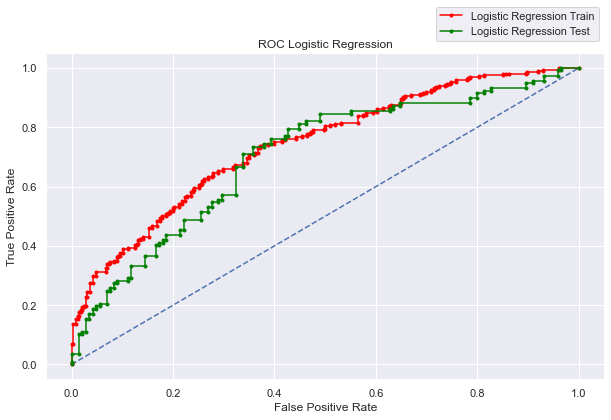

In [179]:
# ROC curve  

fpr_train_Log, tpr_train_Log, thresholds_train_Log = roc_curve(y_train, ytrain_predict_prob_Log)
fpr_test_Log, tpr_test_Log, thresholds_test_Log = roc_curve(y_test, ytest_predict_prob_Log)


plt.figure(figsize = (10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train_Log, tpr_train_Log, marker='.',color='red',label="Logistic Regression Train")
plt.plot(fpr_test_Log, tpr_test_Log, marker='.',color='green',label="Logistic Regression Test")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Logistic Regression')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
printmd('**ROC Curve of Logistic Regression Model of Train and Test dataset :**')

In [180]:
# calculate AUC

Log_train_auc = roc_auc_score(y_train, ytrain_predict_prob_Log)
print('AUC Score Training Data of Logistic Regression model: %.3f' % Log_train_auc)

Log_test_auc = roc_auc_score(y_test, ytest_predict_prob_Log)
print('AUC Score Testing Data of Logistic Regression model: %.3f' % Log_test_auc)

AUC Score Training Data of Logistic Regression model: 0.742
AUC Score Testing Data of Logistic Regression model: 0.704


In [181]:
# Confusuion Matrix

printmd('**Train Confusision Matrix for Logistic Regression model :**')
print(confusion_matrix(y_train, ytrain_predict_Log))

printmd('**Test Confusision Matrix for Logistic Regression model :**')
print(confusion_matrix(y_test, ytest_predict_Log))

**Train Confusision Matrix for Logistic Regression model :**

[[232  94]
 [ 99 185]]


**Test Confusision Matrix for Logistic Regression model :**

[[96 49]
 [38 79]]


In [182]:
# Classification Report

printmd('**Train Classification Report for Logistic Regression model :**')
print(classification_report(y_train, ytrain_predict_Log))

printmd('**Test Classification Report for Logistic Regression model :**')
print(classification_report(y_test, ytest_predict_Log))

**Train Classification Report for Logistic Regression model :**

              precision    recall  f1-score   support

           0       0.70      0.71      0.71       326
           1       0.66      0.65      0.66       284

    accuracy                           0.68       610
   macro avg       0.68      0.68      0.68       610
weighted avg       0.68      0.68      0.68       610



**Test Classification Report for Logistic Regression model :**

              precision    recall  f1-score   support

           0       0.72      0.66      0.69       145
           1       0.62      0.68      0.64       117

    accuracy                           0.67       262
   macro avg       0.67      0.67      0.67       262
weighted avg       0.67      0.67      0.67       262



## Inferences:
- **The performance metrics of Train and Test data are within +/- 10% of each other, which is positive sign.**
- **The majority and minority class performance metrics for both training and testing set do not have a high difference which is a positive sign.**
- The Accuracy for training and testing is approximately 68% and 67% respectively and the AUC for training and testing is approximately 74.2% and 70.4%. The accuracy is nearly same for training and testing data.
- The positive class ('yes' coded as 1) 'Precision', 'Recall' and 'F1-score' for training set is approximately 66%,  65% and 66% respectively.
- The positive class ('yes' coded as 1) 'Precision', 'Recall' and 'F1-score' for testing set is approximately 62%,  68% and 64% respectively.
- **No overfit performance metrics are obtained.**

## LDA Model Evaluation:

In [183]:
ytrain_predict_LDA = model_LDA.predict(X_train)
ytest_predict_LDA = model_LDA.predict(X_test)

In [184]:
ytrain_predict_prob_LDA = model_LDA.predict_proba(X_train)[:,1]
ytest_predict_prob_LDA = model_LDA.predict_proba(X_test)[:,1]

## Performance Metrics:

**ROC Curve of LDA Model of Train and Test dataset :**

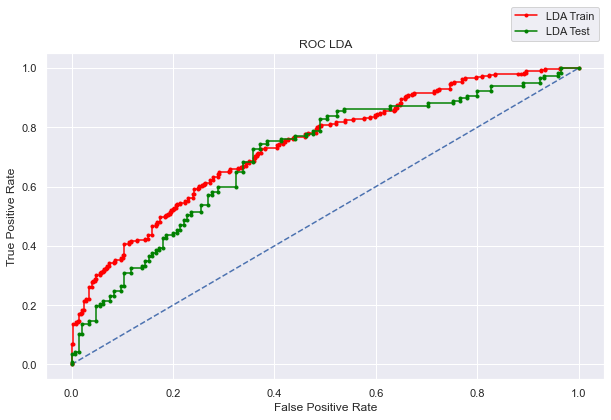

In [185]:
# ROC curve LDA

fpr_train_LDA, tpr_train_LDA, thresholds_train_LDA = roc_curve(y_train, ytrain_predict_prob_LDA)
fpr_test_LDA, tpr_test_LDA, thresholds_test_LDA = roc_curve(y_test, ytest_predict_prob_LDA)


plt.figure(figsize = (10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train_LDA, tpr_train_LDA, marker='.',color='red',label="LDA Train")
plt.plot(fpr_test_LDA, tpr_test_LDA, marker='.',color='green',label="LDA Test")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC LDA')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
printmd('**ROC Curve of LDA Model of Train and Test dataset :**')

In [186]:
# calculate AUC LDA

LDA_train_auc = roc_auc_score(y_train, ytrain_predict_prob_LDA)
print('AUC Score Training Data of LDA model: %.3f' % LDA_train_auc)

LDA_test_auc = roc_auc_score(y_test, ytest_predict_prob_LDA)
print('AUC Score Testing Data of LDA model: %.3f' % LDA_test_auc)

AUC Score Training Data of LDA model: 0.738
AUC Score Testing Data of LDA model: 0.704


In [187]:
# Confusuion Matrix LDA

printmd('**Train Confusision Matrix for LDA model :**')
print(confusion_matrix(y_train, ytrain_predict_LDA))

printmd('**Test Confusision Matrix for LDA model :**')
print(confusion_matrix(y_test, ytest_predict_LDA))

**Train Confusision Matrix for LDA model :**

[[254  72]
 [129 155]]


**Test Confusision Matrix for LDA model :**

[[104  41]
 [ 49  68]]


In [188]:
# Classification Report LDA

printmd('**Train Classification Report for LDA model :**')
print(classification_report(y_train, ytrain_predict_LDA))

printmd('**Test Classification Report for LDA model :**')
print(classification_report(y_test, ytest_predict_LDA))

**Train Classification Report for LDA model :**

              precision    recall  f1-score   support

           0       0.66      0.78      0.72       326
           1       0.68      0.55      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610



**Test Classification Report for LDA model :**

              precision    recall  f1-score   support

           0       0.68      0.72      0.70       145
           1       0.62      0.58      0.60       117

    accuracy                           0.66       262
   macro avg       0.65      0.65      0.65       262
weighted avg       0.65      0.66      0.66       262



## Inferences:
- **The performance metrics of Train and Test data are within +/- 10% of each other, which is positive sign.**
- **The majority and minority class performance metrics have a high difference for 'Recall' in both training and testing data, aproximately 23% on Train data and 14% on Test data. This a negative sign.**
- The Accuracy for training and testing is approximately 67% and 66% respectively and the AUC for training and testing is approximately 73.8% and 70.4%. The accuracy is nearly same for training and testing data.
- The positive class ('yes' coded as 1) 'Precision', 'Recall' and 'F1-score' for training set is approximately 68%,  55% and 61% respectively.
- The positive class ('yes' coded as 1) 'Precision', 'Recall' and 'F1-score' for testing set is approximately 62%,  58% and 60% respectively.
- **No overfit performance metrics are obtained.**

# Comparision between Logistic Regression Model and LDA:

In [189]:
# Logistic Regression Performance

# Train
df_Log_train = pd.DataFrame(classification_report(y_train, ytrain_predict_Log, output_dict = True))
Log_train_acc = df_Log_train.iloc[0,2]
Log_train_recall = df_Log_train.iloc[1,1]
Log_train_precision = df_Log_train.iloc[0,1]
Log_train_f1 = df_Log_train.iloc[2,1]

# Test
df_Log_test = pd.DataFrame(classification_report(y_test, ytest_predict_Log, output_dict = True))
Log_test_acc = df_Log_test.iloc[0,2]
Log_test_recall = df_Log_test.iloc[1,1]
Log_test_precision = df_Log_test.iloc[0,1]
Log_test_f1 = df_Log_test.iloc[2,1]

# Logistic Regression Confusion Matrix
confusion_matrix_train_Log = confusion_matrix(y_train, ytrain_predict_Log)
confusion_matrix_test_Log = confusion_matrix(y_test, ytest_predict_Log)

# Train
Log_train_TP = confusion_matrix_train_Log[1,1]
Log_train_FP = confusion_matrix_train_Log[0,1]
Log_train_TN = confusion_matrix_train_Log[0,0]
Log_train_FN = confusion_matrix_train_Log[1,0]

# Test
Log_test_TP = confusion_matrix_test_Log[1,1]
Log_test_FP = confusion_matrix_test_Log[0,1]
Log_test_TN = confusion_matrix_test_Log[0,0]
Log_test_FN = confusion_matrix_test_Log[1,0]

In [190]:
# LDA Performance

# Train
df_LDA_train = pd.DataFrame(classification_report(y_train, ytrain_predict_LDA, output_dict = True))
LDA_train_acc = df_LDA_train.iloc[0,2]
LDA_train_recall = df_LDA_train.iloc[1,1]
LDA_train_precision = df_LDA_train.iloc[0,1]
LDA_train_f1 = df_LDA_train.iloc[2,1]

# Test
df_LDA_test = pd.DataFrame(classification_report(y_test, ytest_predict_LDA, output_dict = True))
LDA_test_acc = df_LDA_test.iloc[0,2]
LDA_test_recall = df_LDA_test.iloc[1,1]
LDA_test_precision = df_LDA_test.iloc[0,1]
LDA_test_f1 = df_LDA_test.iloc[2,1]

# Logistic Regression Confusion Matrix
confusion_matrix_train_LDA = confusion_matrix(y_train, ytrain_predict_LDA)
confusion_matrix_test_LDA = confusion_matrix(y_test, ytest_predict_LDA)

# Train
LDA_train_TP = confusion_matrix_train_LDA[1,1]
LDA_train_FP = confusion_matrix_train_LDA[0,1]
LDA_train_TN = confusion_matrix_train_LDA[0,0]
LDA_train_FN = confusion_matrix_train_LDA[1,0]

# Test
LDA_test_TP = confusion_matrix_test_LDA[1,1]
LDA_test_FP = confusion_matrix_test_LDA[0,1]
LDA_test_TN = confusion_matrix_test_LDA[0,0]
LDA_test_FN = confusion_matrix_test_LDA[1,0]

**ROC Curve of Logistic Regression and LDA for Training set :**

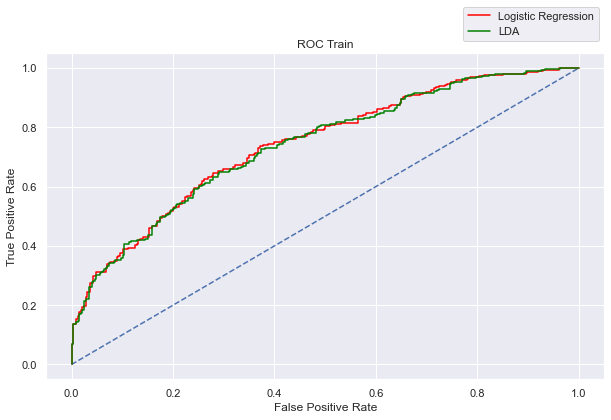

In [191]:
plt.figure(figsize = (10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train_Log, tpr_train_Log, color='red',label="Logistic Regression")
plt.plot(fpr_train_LDA,tpr_train_LDA, color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Train')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
printmd('**ROC Curve of Logistic Regression and LDA for Training set :**')

**ROC Curve of Logistic Regression and LDA for Testing set :**

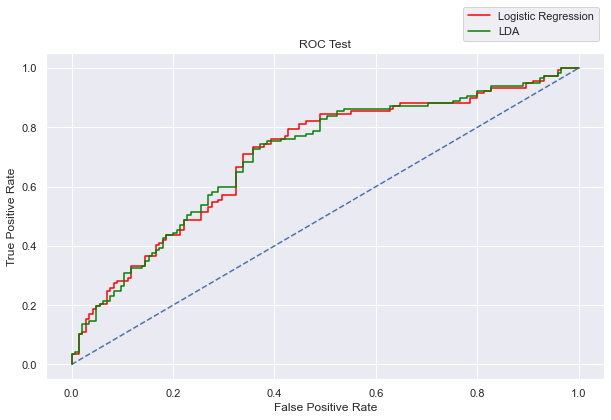

In [192]:
plt.figure(figsize = (10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_test_Log, tpr_test_Log, color='red',label="Logistic Regression")
plt.plot(fpr_test_LDA,tpr_test_LDA,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Test')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
printmd('**ROC Curve of Logistic Regression and LDA for Testing set :**')

In [193]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
comparision = pd.DataFrame({'Log Reg Train':[Log_train_acc,Log_train_auc,Log_train_recall,Log_train_precision,Log_train_f1],
        'Log Reg Test':[Log_test_acc,Log_test_auc,Log_test_recall,Log_test_precision,Log_test_f1],
       'LDA Train':[LDA_train_acc,LDA_train_auc,LDA_train_recall,LDA_train_precision,LDA_train_f1],
        'LDA Test':[LDA_test_acc,LDA_test_auc,LDA_test_recall,LDA_test_precision,LDA_test_f1]}, index=index)
printmd('**Comparision Table of Performane Metrics in Percentage:**')
round(comparision*100,2).T

**Comparision Table of Performane Metrics in Percentage:**

,Accuracy,AUC,Recall,Precision,F1 Score
Log Reg Train,68.36,74.16,65.14,66.31,65.72
Log Reg Test,66.79,70.37,67.52,61.72,64.49
LDA Train,67.05,73.82,54.58,68.28,60.67
LDA Test,65.65,70.36,58.12,62.39,60.18


## Inferences:
- The Accuracy and AUC score is nearly same for both the models. Also the 'Precision for class 'yes' (coded as 1) is nearly same for the models. **But the Recall and F1 Score is higher for Logistic Regression model on both Train and Test data.** 

**Comparision of Performance Metrics of Logistic Regression and LDA for Training set**

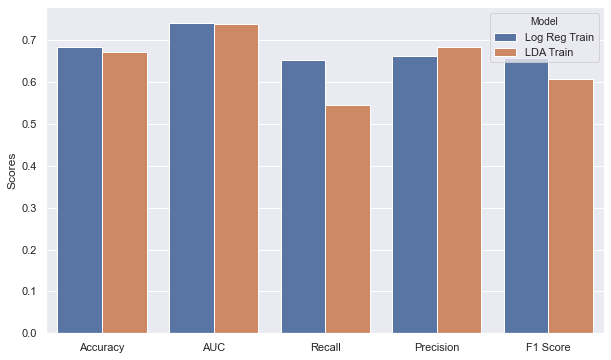

In [194]:
# Train

train_metrics = [Log_train_acc,Log_train_auc,Log_train_recall,Log_train_precision,Log_train_f1,
           LDA_train_acc,LDA_train_auc,LDA_train_recall,LDA_train_precision,LDA_train_f1]
           
train_metrics_name =index*2
train_scores = pd.DataFrame(train_metrics, columns = ['Scores'], index = train_metrics_name)
train_models = ['Log Reg Train']*5 + ['LDA Train']*5
train_scores['Model'] = train_models


plt.figure(figsize = (10,6))
sns.barplot( y = train_scores['Scores'], x = train_scores.index, hue = train_scores['Model'])
printmd('**Comparision of Performance Metrics of Logistic Regression and LDA for Training set**')

**Comparision of Performance Metrics of Logistic Regression and LDA for Testing set**

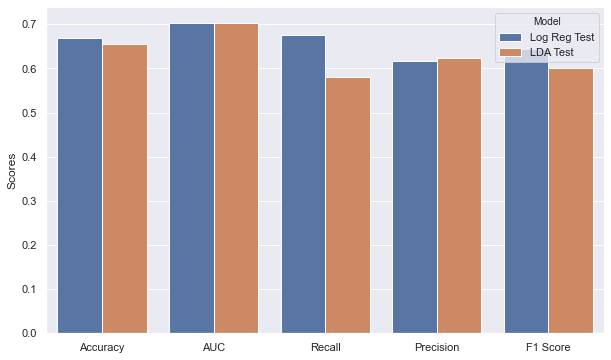

In [195]:
# Test

test_metrics = [Log_test_acc,Log_test_auc,Log_test_recall,Log_test_precision,Log_test_f1,
           LDA_test_acc,LDA_test_auc,LDA_test_recall,LDA_test_precision,LDA_test_f1]
           
test_metrics_name =index*2
test_scores = pd.DataFrame(test_metrics, columns = ['Scores'], index = test_metrics_name)
test_models = ['Log Reg Test']*5 + ['LDA Test']*5
test_scores['Model'] = test_models


plt.figure(figsize = (10,6))
sns.barplot( y = test_scores['Scores'], x = test_scores.index, hue = test_scores['Model'])
printmd('**Comparision of Performance Metrics of Logistic Regression and LDA for Testing set**')

**Comparision of Prediction counts of Logistic Regression and LDA for Training set :**

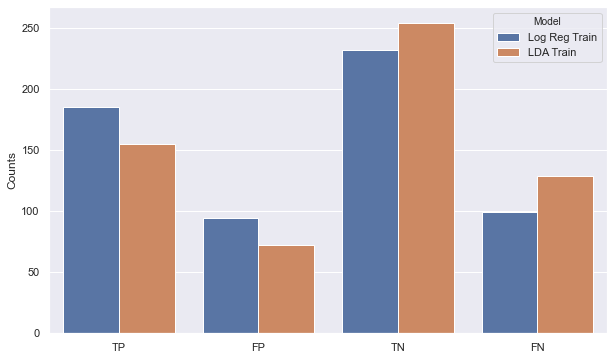

In [196]:
# Train

index = ['TP', 'FP', 'TN', 'FN']
train_predictions = [Log_train_TP, Log_train_FP, Log_train_TN, Log_train_FN,
                     LDA_train_TP, LDA_train_FP, LDA_train_TN, LDA_train_FN]
                     
train_predictions_name =index*2
train_predictions_df = pd.DataFrame(train_predictions, columns = ['Counts'], index = train_predictions_name)
train_models_predictions = ['Log Reg Train']*4 + ['LDA Train']*4 
train_predictions_df['Model'] = train_models_predictions


plt.figure(figsize = (10,6))
sns.barplot( y = train_predictions_df['Counts'], x = train_predictions_df.index, hue = train_predictions_df['Model'])
printmd('**Comparision of Prediction counts of Logistic Regression and LDA for Training set :**')

**Comparision of Prediction counts of Logistic Regression and LDA for Testing set :**

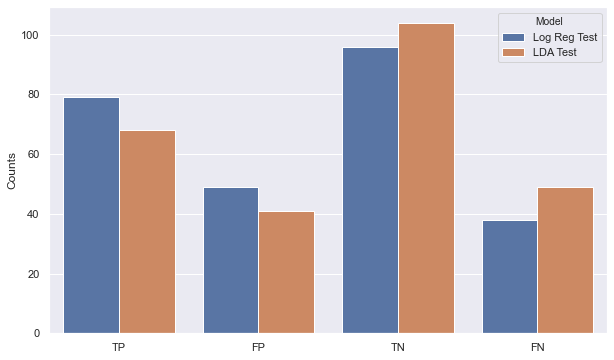

In [197]:
# Test
index = ['TP', 'FP', 'TN', 'FN']
test_predictions = [Log_test_TP, Log_test_FP, Log_test_TN, Log_test_FN,
                    LDA_test_TP, LDA_test_FP, LDA_test_TN, LDA_test_FN]
test_predictions_name =index*2
test_predictions_df = pd.DataFrame(test_predictions, columns = ['Counts'], index = test_predictions_name)
test_models_predictions = ['Log Reg Test']*4 + ['LDA Test']*4 
test_predictions_df['Model'] = test_models_predictions


plt.figure(figsize = (10,6))
sns.barplot( y = test_predictions_df['Counts'], x = test_predictions_df.index, hue = test_predictions_df['Model'])
printmd('**Comparision of Prediction counts of Logistic Regression and LDA for Testing set :**')

# Conclusion and Selection of Optimized Model:
    
1. **Difference in performance between Train and Test Data:** We have already observed that all the model performance metrics are well within the general norm of +/- 10% of each other. 
    
2. **Difference between minority and majority class:** It is observed that for Logistic Regression model the majority and minority class performance metrics for both training and testing set do not have a high difference. But for LDA model 'Recall' parameter has high difference between majority and minority class performance metrics for both training and testing set. **Hence according to this logic we can consider the Logistic Regression model as better compared to LDA.**
    
3. **Overfitting:** Since all the metrics are below 90%, there is no case of overfitting in both models.
    
4. **Overall Performance Metrics:** The Accuracy and AUC score is nearly same for both the models. Also the 'Precision for class 'yes' (coded as 1) is nearly same for the models. **But the Recall and F1 Score is higher for Logistic Regression model on both Train and Test data.** 
     - Also for the given case study we want to correctly predict both the employees who will opt for the Holiday package and employees who won't, such that customized packages can be prepared for the employees. **Thus type I error and type II error are both equally important for us. Hence 'F1 score' is the most important performance metric here. And since as observed F1 Score for Logistic Regression Model is higher than LDA model. Thus according the performance metrics, Logistic Regression Model is better than LDA.**

**Thus it is observed that Linear Regression Model is better optimized than LDA Model.**
    

## Some Important Plots as observed in EDA from Bivariate Analysis with Holiday Package:

**Mean of Salary variable according to Holiday Package status :**

Holiday_Package
no     51739.44
yes    43018.85
Name: Salary, dtype: float64


**Barplot of Salary variable according to Holiday Package status :**

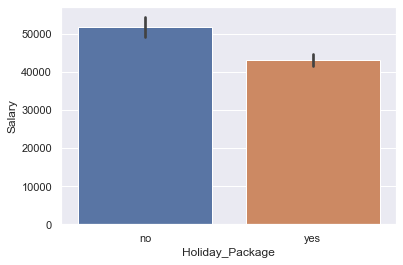

In [198]:
sns.barplot(y = holiday_copy['Salary'], x = holiday_copy['Holiday_Package'] )
printmd('**Mean of Salary variable according to Holiday Package status :**')
print(round(holiday_copy.groupby('Holiday_Package').mean().Salary,2))
printmd('**Barplot of Salary variable according to Holiday Package status :**')

## Inferences:
- The average salary of employees who opted for holiday package is less.

**Percentage wise tabulation of foreign employees as per status of holiday package :**

foreign             no    yes
Holiday_Package              
no               61.28  31.94
yes              38.72  68.06


**Countplot of foreign Variable according to Holiday Package status :**

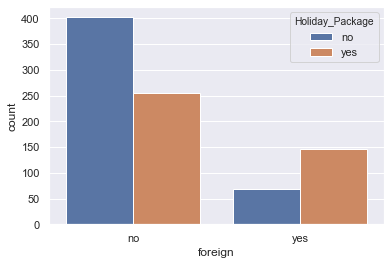

In [199]:
sns.countplot(holiday_copy['foreign'], hue  = holiday_copy['Holiday_Package'])
printmd('**Percentage wise tabulation of foreign employees as per status of holiday package :**')
print(round(pd.crosstab(index = holiday_copy['Holiday_Package'], columns = holiday_copy['foreign']).apply(lambda x: x*100/x.sum()),2))
printmd('**Countplot of foreign Variable according to Holiday Package status :**')

## Inferences:
- Among the employees who are not foreigners approximately only 38.7% opted for Holiday package whereas among the employees who are foreigners approximately 68.06% of the employees opted for Holiday package.

**Percentage wise tabulation of employees with number of children below 7 years as per status of holiday package :**

no_young_children      0      1      2     3
Holiday_Package                             
no                 49.02  68.03  76.36  60.0
yes                50.98  31.97  23.64  40.0


**Countplot of no_young_children Variable according to Holiday Package status :**

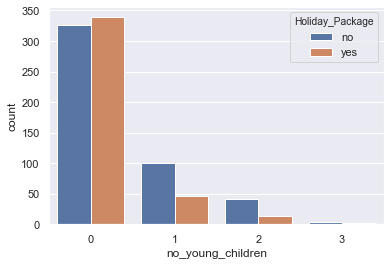

In [200]:
sns.countplot(holiday_copy['no_young_children'], hue  = holiday_copy['Holiday_Package'])
printmd('**Percentage wise tabulation of employees with number of children below 7 years as per status of holiday package :**')
print(round(pd.crosstab(index = holiday_copy['Holiday_Package'], columns = holiday_copy['no_young_children']).apply(lambda x: x*100/x.sum()),2))
printmd('**Countplot of no_young_children Variable according to Holiday Package status :**')

## Inferences:
- Employees who have no young children below 7 years have nearly equal percentage of employees opting or not opting for the Holiday package. But employees who have 1 or 2 children below 7 years of age have much lesser percentage opting for holiday package.

**Percentage wise tabulation of employees with number of children above 7 years as per status of holiday package :**

no_older_children      0      1      2      3     4      5      6
Holiday_Package                                                  
no                 58.78  51.52  49.04  49.09  50.0  100.0    0.0
yes                41.22  48.48  50.96  50.91  50.0    0.0  100.0


**Countplot of no_older_children Variable according to Holiday Package status :**

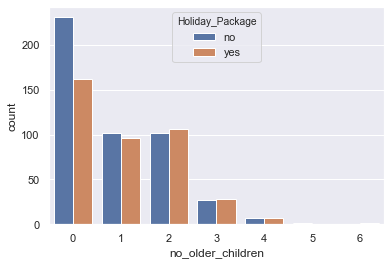

In [201]:
sns.countplot(holiday_copy['no_older_children'], hue  = holiday_copy['Holiday_Package'])
printmd('**Percentage wise tabulation of employees with number of children above 7 years as per status of holiday package :**')
print(round(pd.crosstab(index = holiday_copy['Holiday_Package'], columns = holiday_copy['no_older_children']).apply(lambda x: x*100/x.sum()),2))
printmd('**Countplot of no_older_children Variable according to Holiday Package status :**')

## Inferences:
- Employees who have no children above 7 years of age have lesser percentage opting for holiday package.

**Average age of employees with different number of children below 7 years as per Holiday Package status:**

no_young_children  Holiday_Package
0                  no                 46.12
                   yes                40.58
1                  no                 28.98
                   yes                29.87
2                  no                 29.00
                   yes                29.31
3                  no                 30.00
                   yes                29.00
Name: age, dtype: float64


**Countplot of age of employees with different number of children below 7 years as per holiday package status:**

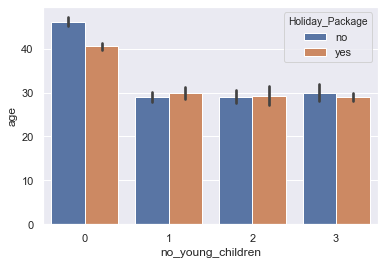

In [202]:
printmd('**Average age of employees with different number of children below 7 years as per Holiday Package status:**')
print(round(holiday_copy.groupby(['no_young_children', 'Holiday_Package'])['age'].mean(),2))
sns.barplot(x = 'no_young_children', y = 'age', data = holiday_copy, hue = 'Holiday_Package')
printmd('**Countplot of age of employees with different number of children below 7 years as per holiday package status:**')

## Inferences:
- The average age of employees with no children below 7 years who have opted for the holiday package is more than 5 years younger than employees who have not opted.

## Combining the 'no_young_children' and 'no_older_children':

- These two independent variables are combined such that **the effect of number of children irrespective of age can be performed on Holiday package status.**

In [203]:
holiday_copy['no_of_children'] = holiday_copy['no_young_children'] + holiday_copy['no_older_children']

In [204]:
printmd('**Viewing the Top 5 rows to observe the new variable no_of_children :**')
holiday_copy.head()

**Viewing the Top 5 rows to observe the new variable no_of_children :**

,Holiday_Package,Salary,age,educ,no_young_children,no_older_children,foreign,no_of_children
0,no,48412,30,8,1,1,no,2
1,yes,37207,45,8,0,1,no,1
2,no,58022,46,9,0,0,no,0
3,no,66503,31,11,2,0,no,2
4,no,66734,44,12,0,2,no,2


In [205]:
printmd('**Count of employees with total number of children:**')
holiday_copy['no_of_children'].value_counts()

**Count of employees with total number of children:**

2    284
0    271
1    211
3     80
4     22
6      2
5      2
Name: no_of_children, dtype: int64

In [206]:
printmd('**Percentage of employees with total number of children:**')
round(holiday_copy['no_of_children'].value_counts('Normalize')*100,2)

**Percentage of employees with total number of children:**

2    32.57
0    31.08
1    24.20
3     9.17
4     2.52
6     0.23
5     0.23
Name: no_of_children, dtype: float64

**Percentage wise tabulation of employees with total number of children as per status of holiday package :**

no_of_children       0      1      2      3      4      5      6
Holiday_Package                                                 
no               50.92  58.29  53.87  51.25  63.64  100.0    0.0
yes              49.08  41.71  46.13  48.75  36.36    0.0  100.0


**Countplot of no_young_children Variable according to Holiday Package status :**

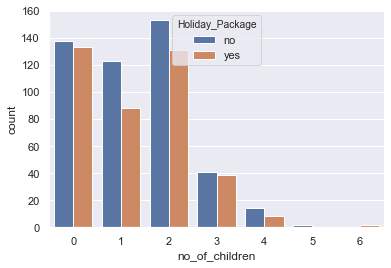

In [207]:
sns.countplot(holiday_copy['no_of_children'], hue  = holiday_copy['Holiday_Package'])
printmd('**Percentage wise tabulation of employees with total number of children as per status of holiday package :**')
print(round(pd.crosstab(index = holiday_copy['Holiday_Package'], columns = holiday_copy['no_of_children']).apply(lambda x: x*100/x.sum()),2))
printmd('**Countplot of no_young_children Variable according to Holiday Package status :**')

## Inferences:
- Among employees who have no children or 3 children have nearly equal number of people opting for the Holiday package as the people who didn't opt for the Holiday package.
- Employees with 3 children have little lesser percentage of people opting for Holiday package.
- **Employees with 1 child have much lesser percentage of people opting for Holiday package.**
- The number of employees with more than or equal to 4 children is quite less and hence no analysis is done based on them.

**Average values of Salary, age and number of years of education of employees with different number of children of employees as per holiday package status:**

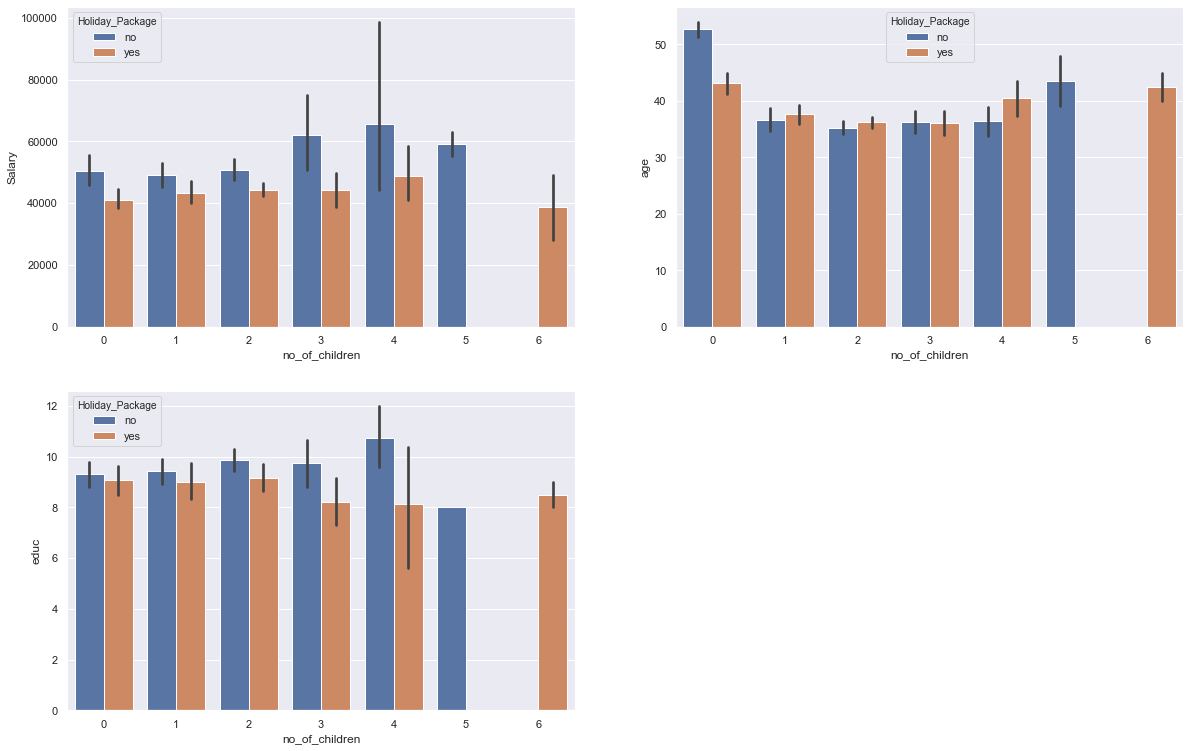

In [208]:
count = 1
plt.figure(figsize = (20,20))
for i in cont_vars_new:
    plt.subplot(3,2,count)
    sns.barplot(x = 'no_of_children', y = i, data = holiday_copy, hue = 'Holiday_Package')
    count = count +1
printmd('**Average values of Salary, age and number of years of education of employees with different number of children of employees as per holiday package status:**')

**Average age of employees with different number of children as per Holiday Package status:**

no_of_children  Holiday_Package
0               no                 52.67
                yes                43.09
1               no                 36.64
                yes                37.64
2               no                 35.20
                yes                36.18
3               no                 36.24
                yes                36.08
4               no                 36.36
                yes                40.50
5               no                 43.50
6               yes                42.50
Name: age, dtype: float64


**Countplot of age of employees with different number of children as per holiday package status:**

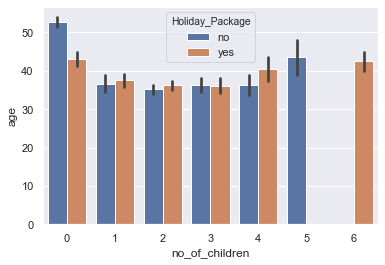

In [209]:
printmd('**Average age of employees with different number of children as per Holiday Package status:**')
print(round(holiday_copy.groupby(['no_of_children', 'Holiday_Package'])['age'].mean(),2))
sns.barplot(x = 'no_of_children', y = 'age', data = holiday_copy, hue = 'Holiday_Package')
printmd('**Countplot of age of employees with different number of children as per holiday package status:**')

**Swarmplot of age of employees with different number of children as per holiday package status:**

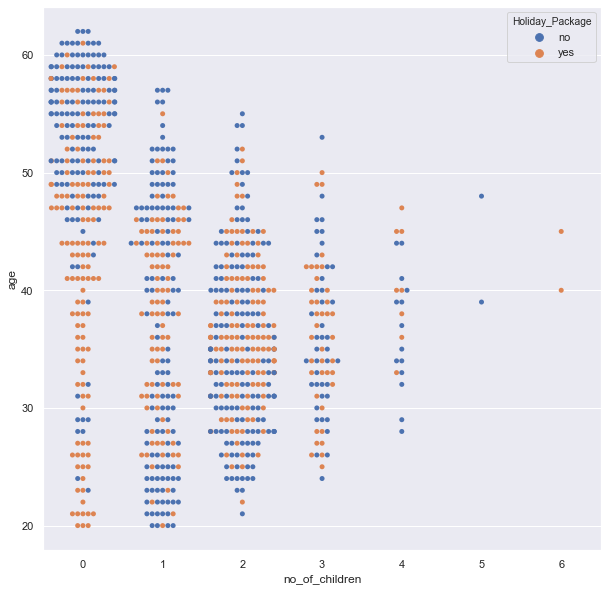

In [210]:
plt.figure(figsize = (10,10))
sns.swarmplot(x = 'no_of_children', y = 'age', data = holiday_copy, hue = 'Holiday_Package')
printmd('**Swarmplot of age of employees with different number of children as per holiday package status:**')

## Inferences:
- Similar trend for average salary and holiday package status is observed even when categorised by number of children of the employees.
- **The average age of employees with no children who have opted for the holiday package is around 10 years younger than employees who have not opted. It could be observed from swarm plot that the employees above 50 have higher number of people not opting for the package.**
- The average number of years of education is nearly same.

## Importance of Variables from Logistic Regression Model:
- Two Important factors that are required to be covered before interpretation of the coefficients of the Logistic Regression model such that the relative importance of variables can be observed are:
    1. **Multicollinearity:** We have observed that correlation values are high and hence multicollinearity is less.
    2. **Scaling:** Since the 'Salary' variable is comparitively much high and hence scaling is necessary for proper interpretation of coefficients.

## Scaling:

In [211]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)

## Logistic Regression Coefficients:

In [212]:
model_Log_Reg.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight={0: 0.45, 1: 0.55}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='warn', n_jobs=None,
                   penalty='none', random_state=1, solver='newton-cg', tol=0.1,
                   verbose=0, warm_start=False)

In [213]:
coeffs_df = pd.DataFrame(model_Log_Reg.coef_.reshape(X_train.shape[1]), columns = ['Coefficients'], index = X_train.columns)
printmd('**Logistic Regression coefficients :**')
coeffs_df

**Logistic Regression coefficients :**

,Coefficients
Salary,-0.298944
age,-0.587560
educ,0.238291
no_young_children,-0.933975
no_older_children,-0.056280
foreign,0.681370


In [214]:
coeffs_df = pd.DataFrame(model_Log_Reg.coef_.reshape(X_train.shape[1]), columns = ['Coefficients'], index = X_train.columns)
printmd('**Logistic Regression coefficients absolute values to observe the coefficients with highest magnitude:**')
abs(coeffs_df).sort_values('Coefficients', ascending = False)

**Logistic Regression coefficients absolute values to observe the coefficients with highest magnitude:**

,Coefficients
no_young_children,0.933975
foreign,0.681370
age,0.587560
Salary,0.298944
educ,0.238291
no_older_children,0.056280


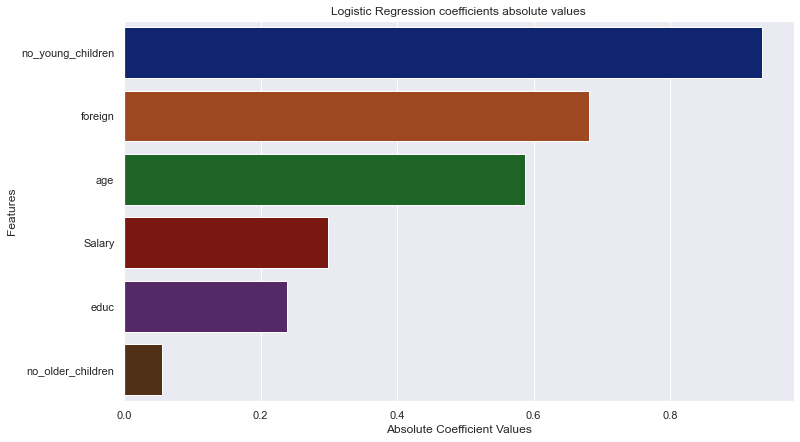

In [215]:
coeffs_abs = abs(coeffs_df['Coefficients']).sort_values(ascending = False)
plt.figure(figsize=(12,7))
sns.barplot( abs(coeffs_df['Coefficients']).sort_values(ascending = False), coeffs_abs.index, palette='dark')
plt.xlabel('Absolute Coefficient Values')
plt.ylabel('Features')
plt.title('Logistic Regression coefficients absolute values')
plt.show()

## Inferences:
- The magnitude of coefficients is in the order:
    1. no_young_children	
    2. foreign	
    3. age	
    4. Salary	
    5. educ	
    6. no_older_children	

## LDA Coefficients:

In [216]:
model_LDA.fit(X_train_scaled, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage='auto',
                           solver='lsqr', store_covariance=False, tol=0.1)

In [217]:
coeffs_df = pd.DataFrame(model_LDA.coef_.reshape(X_train.shape[1]), columns = ['Coefficients'], index = X_train.columns)
printmd('**LDA coefficients :**')
coeffs_df

**LDA coefficients :**

,Coefficients
Salary,-0.293360
age,-0.512998
educ,0.187558
no_young_children,-0.778600
no_older_children,-0.004826
foreign,0.655945


In [218]:
coeffs_df = pd.DataFrame(model_LDA.coef_.reshape(X_train.shape[1]), columns = ['Coefficients'], index = X_train.columns)
printmd('**LDA coefficients absolute values to observe the coefficients with highest magnitude:**')
abs(coeffs_df).sort_values('Coefficients', ascending = False)

**LDA coefficients absolute values to observe the coefficients with highest magnitude:**

,Coefficients
no_young_children,0.778600
foreign,0.655945
age,0.512998
Salary,0.293360
educ,0.187558
no_older_children,0.004826


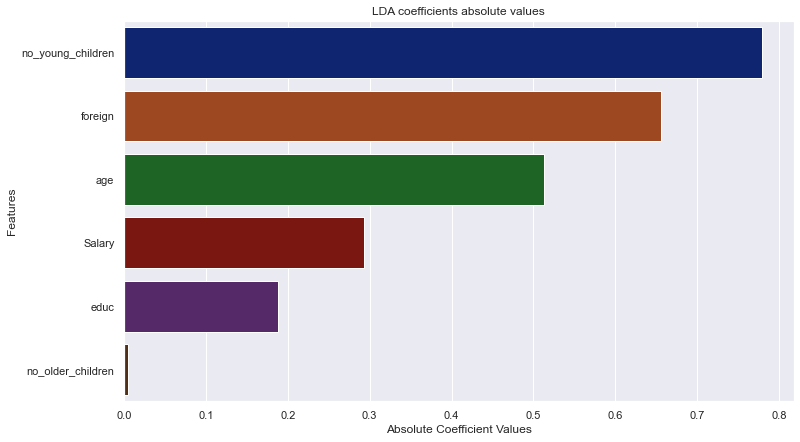

In [219]:
coeffs_abs = abs(coeffs_df['Coefficients']).sort_values(ascending = False)
plt.figure(figsize=(12,7))
sns.barplot( abs(coeffs_df['Coefficients']).sort_values(ascending = False), coeffs_abs.index, palette='dark')
plt.xlabel('Absolute Coefficient Values')
plt.ylabel('Features')
plt.title('LDA coefficients absolute values')
plt.show()

## Inferences:
- The magnitude of coefficients is in the order:
    1. no_young_children	
    2. foreign	
    3. age	
    4. Salary	
    5. educ	
    6. no_older_children	

## Important Insights from above:
1. The average salary of employees who opted for holiday package is less.
2. Among the employees who are not foreigners approximately only 38.7% opted for Holiday package whereas among the employees who are foreigners approximately 68.06% of the employees opted for Holiday package. 
3. Employees who have no young children below 7 years have nearly equal percentage of employees opting or not opting for the Holiday package. But employees who have 1 or 2 children below 7 years of age have much lesser percentage opting for holiday package.
4. Employees who have no children above 7 years of age have lesser percentage opting for holiday package.
5. The average age of employees with no children below 7 years who have opted for the holiday package is more than 5 years younger than employees who have not opted.
6. Employees with 1 child have much lesser percentage of people opting for Holiday package.
7. The average age of employees with no children who have opted for the holiday package is around 10 years younger than employees who have not opted. It could be observed from swarm plot that the employees above 50 have higher number of people not opting for the package.
8. It is observed that according to both Logistic Regression and LDA model the magnitude of coefficients is in the order of decreasing magnitude is: 'no_young_children', 'foreign', 'age', 'Salary', 'educ', 'no_older_children'. 

## Recommendations:
1.	Since percentage of employees who are not foreigners opting for Holiday packages is less, this means the Tour agency needs to make packages that attract the local employees. May be the packages at present are focused more in within the country tours and hence the local employees are less interested in these packages. So international holiday packages could be more attractive to the local employees.
2.	Since the percentage of foreign employees have higher percentage opting for the packages. It may be because this section of employees are interested in seeing and knowing the foreign country. Hence packages designed at more culturally satisfying experiences could further bolster the package selection rate among the foreign employees.
3.	Since the average salary of the employees not opting for the holiday package is high, it may suggest that the packages are not luxurious enough for the high earners. So more luxury oriented packages with a higher price cap could be designed for this section of employees.
4.	Since percentage of employees with 1 or 2 children below 7 years of age opting for holiday package is less. The Tour agency needs to understand the reason behind this situation and see if the packages designed are comfortable enough for employees with children of this age like baby care facilities. Including features specific to children of this age group like amusement park tours could further make the packages attractive for the parents.
5.	Employees with no children who are aged above 50 have higher count of employees not opting for holiday packages. So packages aiming at more comfort and relaxation oriented features could be designed for this section.